# Summarize recorded interactions

In [1]:
# Import some useful modules
import json
import sys
import networkx
import pandas
import numpy

import matplotlib.pyplot as plotter
from pathlib import Path
from IPython.display import display, HTML

Specify the RESULTS_DIR used for recording interactions

In [2]:
# USE ABSOLUTE PATHS HERE!!!
DATA_DIR = Path("/home/ashinde/PhD/CaffineBravery/results/results_l2_active_control/")
DATA_FILES = list(DATA_DIR.iterdir())

for _file in DATA_FILES:
    print(f"Using {_file}")

Using /home/ashinde/PhD/CaffineBravery/results/results_l2_active_control/973843173_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l2_active_control/769132147_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l2_active_control/1795225096_defl1_active_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l2_active_control/790094605_defl1_passive_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l2_active_control/1252540239_attl2_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l2_active_control/trace.0.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l2_active_control/trace.1.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l2_active_control/trace.2.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l2_active_control/trace.3.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l2_active_control/trace.4.json
Using /home/ashinde/PhD/CaffineBr

In [3]:
# Common utility function for reading JSON from a file
def load_json(fname):

    data = None

    with open(fname) as f:
        data = json.load(f)

    return data

---
Take a look at the policy graphs of the agents

In [4]:
# Draw policy graphs
import graphviz


def get_edge_map(edges):
    start = 0
    edge_map = {}
    multi_edge_map = {}
    
    for src, children in edges.items():
        for obs, child in children.items():
            
            # index this observation if not already done
            if obs not in edge_map.keys():
                edge_map[obs] = start
                start += 1
                
            # Add obs to (src, dst) key
            if (src, child) not in multi_edge_map.keys():
                multi_edge_map[(src, child)] = [edge_map[obs]]
            
            else:
                _l = multi_edge_map[(src, child)]
                _l.append(edge_map[obs])
                multi_edge_map[(src, child)] = _l
                
    return edge_map, multi_edge_map


def get_graphviz_graph(json_data):
    
    # initialize empty graph
    G = graphviz.Digraph()
    
    nodes = json_data["nodes"]
    edges = json_data["edges"]
    
    edge_map, multi_edge_map = get_edge_map(edges)
    print(f"Edge map is:")
    for e, i in edge_map.items():
        print(f"{i}:{e}")

    for k, v in nodes.items():
        l = v["act"] + "_start" if "start" in v.keys() else v["act"]
        G.node(k, label=l, fontsize="12")
        
    for s, t in multi_edge_map.keys():
        G.edge(s, t, label=str(multi_edge_map[(s, t)]))
        
    return G

---
## Plot policy graphs

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l2_active_control/973843173_attl0_pol_graph.json
Edge map is:
0:[(HostObs, none), (ActionResult, failure)]
1:[(HostObs, none), (ActionResult, success)]
2:[(HostObs, user_files), (ActionResult, failure)]
3:[(HostObs, user_files), (ActionResult, success)]


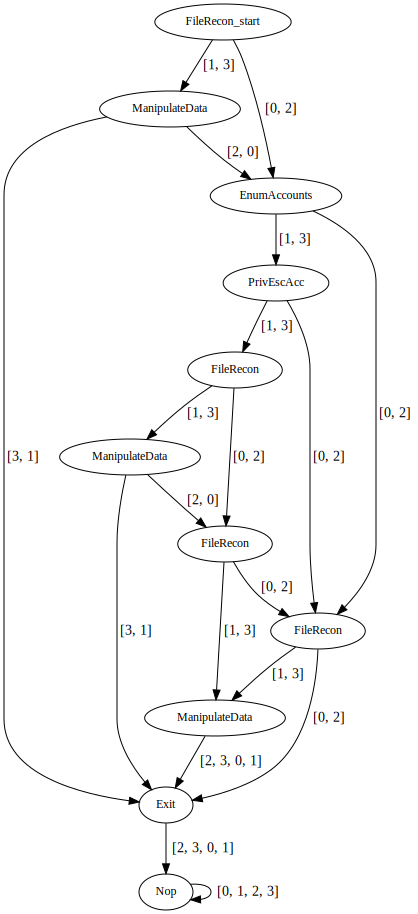

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l2_active_control/769132147_attl0_pol_graph.json
Edge map is:
0:[(HostObs, none), (ActionResult, failure)]
1:[(HostObs, none), (ActionResult, success)]
2:[(HostObs, user_files), (ActionResult, failure)]
3:[(HostObs, user_files), (ActionResult, success)]


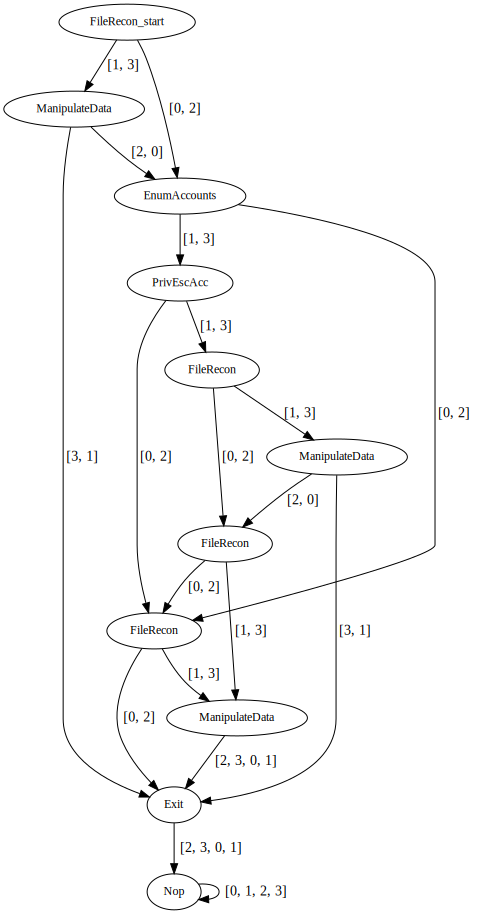

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l2_active_control/1795225096_defl1_active_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


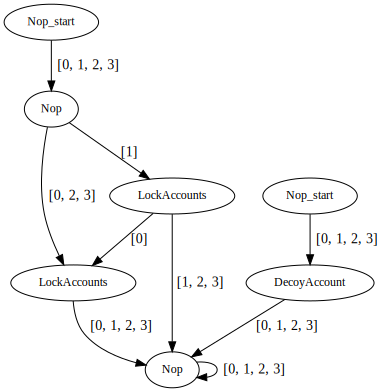

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l2_active_control/790094605_defl1_passive_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


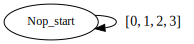

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l2_active_control/1252540239_attl2_pol_graph.json
Edge map is:
0:[(HostObs, user_files), (ActionResult, failure)]
1:[(HostObs, user_files), (ActionResult, success)]
2:[(HostObs, none), (ActionResult, failure)]
3:[(HostObs, none), (ActionResult, success)]


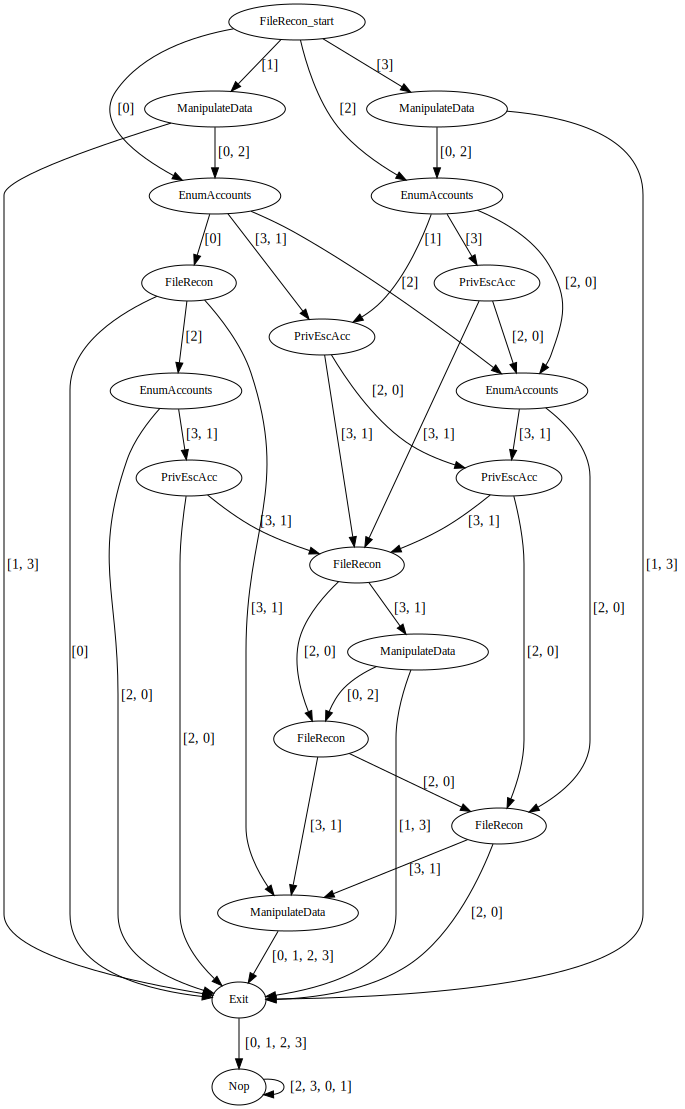

In [5]:
GRAPH_FILES = list(filter(lambda x: "pol_graph" in x.parts[-1], DATA_FILES))

for g in GRAPH_FILES:
    print(f"Displaying {g}")
    data = load_json(g)
    G = get_graphviz_graph(data)
    display(G)

---
Summarize the actual interactions

In [6]:
# Get the trace files
TRACE_FILES = list(filter(lambda x: "trace" in x.parts[-1], DATA_FILES))

for _file in TRACE_FILES:
    print(f"Using trace from {_file}")


Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l2_active_control/trace.0.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l2_active_control/trace.1.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l2_active_control/trace.2.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l2_active_control/trace.3.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l2_active_control/trace.4.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l2_active_control/trace.5.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l2_active_control/trace.6.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l2_active_control/trace.7.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l2_active_control/trace.8.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l2_active_control/trace.9.json


+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.382131                        0.617869   
3                         0.587324                        0.412676   
4                         0.657676                        0.342324   
5                         0.647038                        0.352962   
6                         0.657701                        0.342299   
7                         0.657739                        0.342262   
8                         0.657739                        0.342262   
9                         0.657739                        0.342262   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                         none                           failure  
1                         none                           failure  
2                         none                           success  
3                         none                           success  
4                   user_files                           failure  
5                         none                           success  
6                   user_files                           success  
7                   user_files                           success  
8                         none                           failure  
9                   user_files                           success

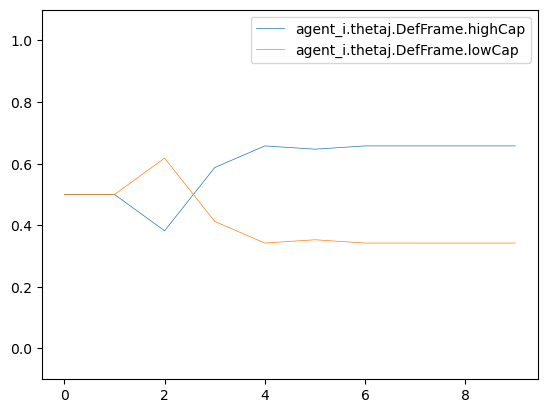

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                        file_enum
3                               1.0                   login_activity
4                               1.0                        file_enum
5                               1.0                       file_write
6                               1.0                   login_activity
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

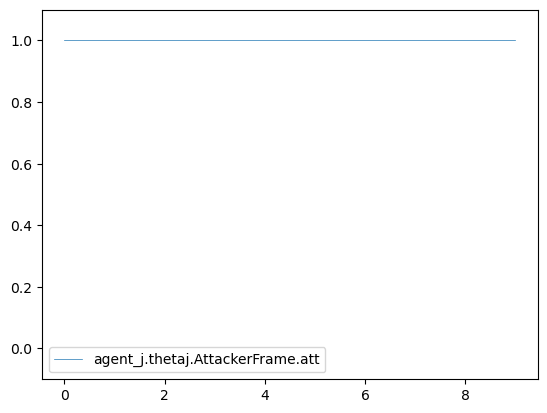

=============DataFound============


state.DataFound.no  state.DataFound.yes  agent_i.action agent_j.action
0                 1.0                  0.0       FileRecon            Nop
1                 1.0                  0.0    EnumAccounts   DecoyAccount
2                 1.0                  0.0    EnumAccounts            Nop
3                 1.0                  0.0      PrivEscAcc            Nop
4                 1.0                  0.0       FileRecon            Nop
5                 1.0                  0.0       FileRecon            Nop
6                 0.0                  1.0  ManipulateData            Nop
7                 0.0                  1.0            Exit            Nop
8                 0.0                  1.0             Nop            Nop
9                 0.0                  1.0             Nop            Nop

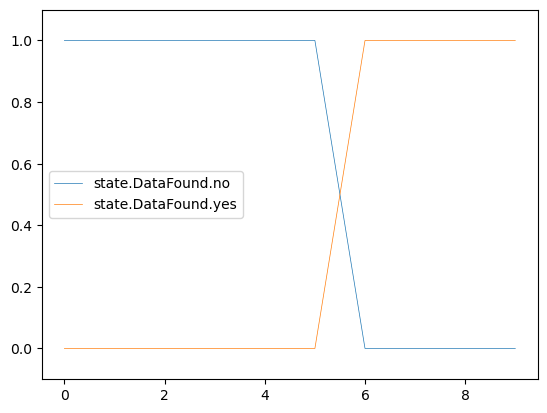

agent_i.DataFound.no  agent_i.DataFound.yes  agent_i.action agent_j.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.976974               0.023026    EnumAccounts   DecoyAccount   
2              0.976974               0.023026    EnumAccounts            Nop   
3              0.976974               0.023026      PrivEscAcc            Nop   
4              0.976974               0.023026       FileRecon            Nop   
5              0.956103               0.043897       FileRecon            Nop   
6              0.380683               0.619317  ManipulateData            Nop   
7              0.000615               0.999385            Exit            Nop   
8              0.000615               0.999385             Nop            Nop   
9              0.000615               0.999385             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                         none                           failure  
1                         none                           failure  
2                         none                           success  
3                         none                           success  
4                   user_files                           failure  
5                         none                           success  
6                   user_files                           success  
7                   user_files                           success  
8                         none                           failure  
9                   user_files                           success

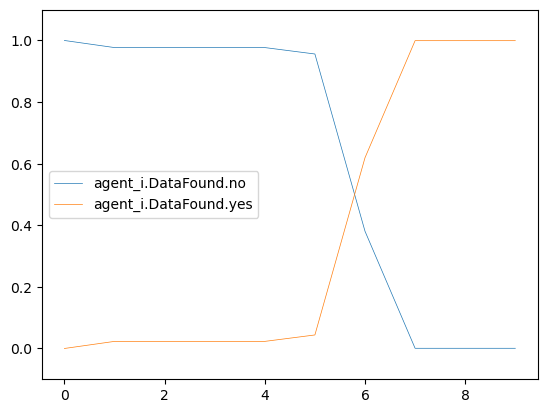

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action  agent_i.action  \
0              1.000000               0.000000            Nop       FileRecon   
1              1.000000               0.000000   DecoyAccount    EnumAccounts   
2              1.000000               0.000000            Nop    EnumAccounts   
3              1.000000               0.000000            Nop      PrivEscAcc   
4              0.877178               0.122822            Nop       FileRecon   
5              0.504929               0.495071            Nop       FileRecon   
6              0.144989               0.855011            Nop  ManipulateData   
7              0.120664               0.879336            Nop            Exit   
8              0.116646               0.883354            Nop             Nop   
9              0.116712               0.883288            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                   login_activity  
4                        file_enum  
5                       file_write  
6                   login_activity  
7                             none  
8                             none  
9                             none

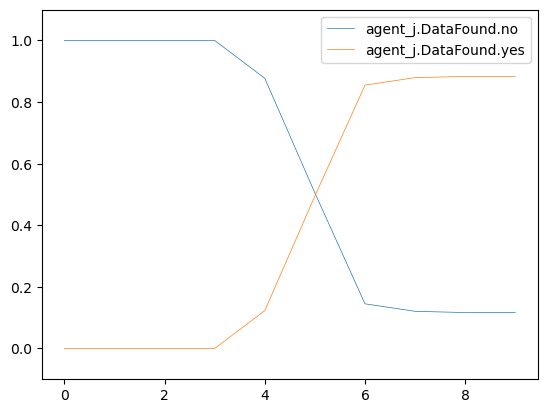

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes  agent_i.action agent_j.action
0                   1.0                    0.0       FileRecon            Nop
1                   1.0                    0.0    EnumAccounts   DecoyAccount
2                   0.0                    1.0    EnumAccounts            Nop
3                   0.0                    1.0      PrivEscAcc            Nop
4                   0.0                    1.0       FileRecon            Nop
5                   0.0                    1.0       FileRecon            Nop
6                   0.0                    1.0  ManipulateData            Nop
7                   0.0                    1.0            Exit            Nop
8                   0.0                    1.0             Nop            Nop
9                   0.0                    1.0             Nop            Nop

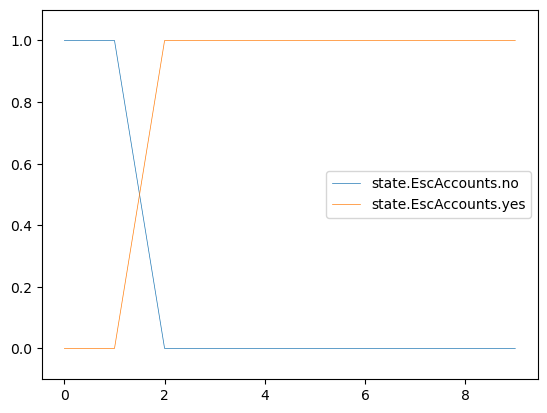

agent_i.EscAccounts.no  agent_i.EscAccounts.yes  agent_i.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.518041                 0.481959    EnumAccounts   
3                0.120323                 0.879677      PrivEscAcc   
4                0.000142                 0.999858       FileRecon   
5                0.000197                 0.999803       FileRecon   
6                0.000099                 0.999901  ManipulateData   
7                0.000035                 0.999965            Exit   
8                0.000035                 0.999965             Nop   
9                0.000035                 0.999965             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           success  
4                           failure  
5                           success  
6                           success  
7                           success  
8                           failure  
9                           success

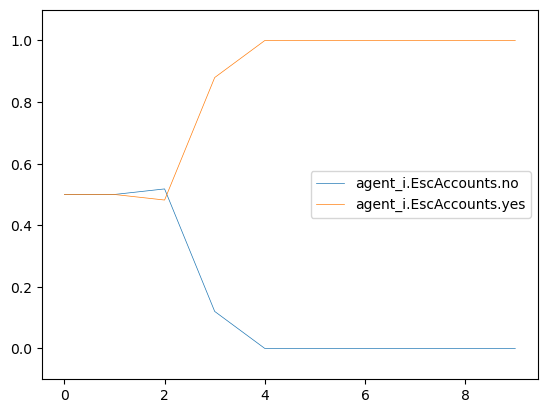

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                        file_enum  
5       FileRecon                       file_write  
6  ManipulateData                   login_activity  
7            Exit                             none  
8             Nop                             none  
9             Nop                             none

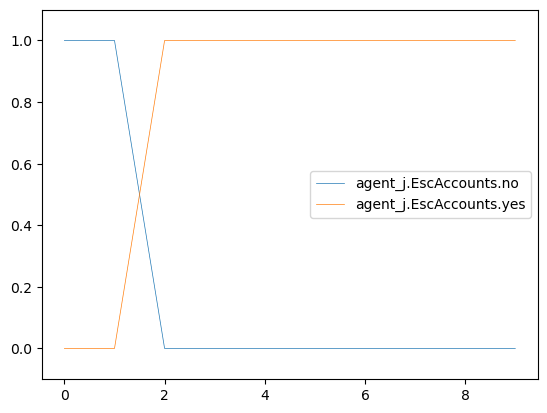

=============AccFound============


state.AccFound.no  state.AccFound.yes  agent_i.action agent_j.action
0                1.0                 0.0       FileRecon            Nop
1                1.0                 0.0    EnumAccounts   DecoyAccount
2                0.0                 1.0    EnumAccounts            Nop
3                0.0                 1.0      PrivEscAcc            Nop
4                0.0                 1.0       FileRecon            Nop
5                0.0                 1.0       FileRecon            Nop
6                0.0                 1.0  ManipulateData            Nop
7                0.0                 1.0            Exit            Nop
8                0.0                 1.0             Nop            Nop
9                0.0                 1.0             Nop            Nop

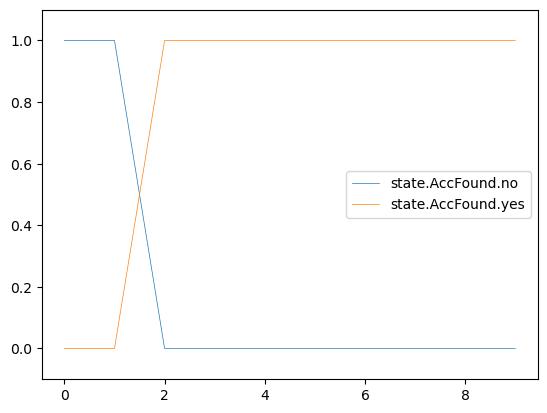

agent_i.AccFound.no  agent_i.AccFound.yes  agent_i.action agent_j.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000    EnumAccounts   DecoyAccount   
2             0.900773              0.099227    EnumAccounts            Nop   
3             0.149865              0.850135      PrivEscAcc            Nop   
4             0.000177              0.999823       FileRecon            Nop   
5             0.000240              0.999760       FileRecon            Nop   
6             0.000123              0.999877  ManipulateData            Nop   
7             0.000044              0.999956            Exit            Nop   
8             0.000044              0.999956             Nop            Nop   
9             0.000044              0.999956             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                         none                           failure  
1                         none                           failure  
2                         none                           success  
3                         none                           success  
4                   user_files                           failure  
5                         none                           success  
6                   user_files                           success  
7                   user_files                           success  
8                         none                           failure  
9                   user_files                           success

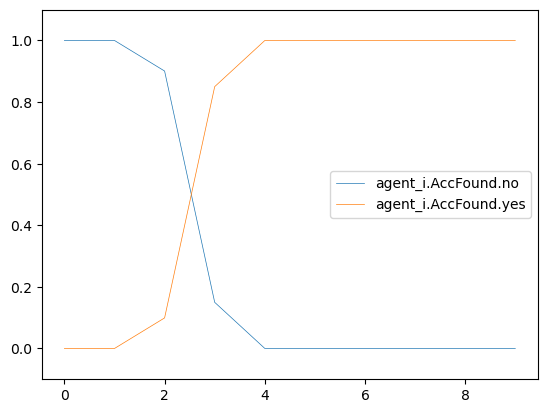

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action  agent_i.action  \
0             1.000000              0.000000            Nop       FileRecon   
1             1.000000              0.000000   DecoyAccount    EnumAccounts   
2             0.310937              0.689063            Nop    EnumAccounts   
3             0.619900              0.380100            Nop      PrivEscAcc   
4             0.549576              0.450424            Nop       FileRecon   
5             0.265774              0.734226            Nop       FileRecon   
6             0.078991              0.921009            Nop  ManipulateData   
7             0.078991              0.921008            Nop            Exit   
8             0.081437              0.918563            Nop             Nop   
9             0.081501              0.918499            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                   login_activity  
4                        file_enum  
5                       file_write  
6                   login_activity  
7                             none  
8                             none  
9                             none

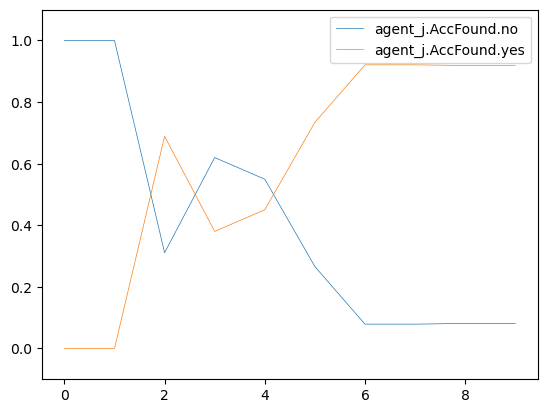

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes  agent_i.action agent_j.action
0                   0.0                    1.0       FileRecon            Nop
1                   0.0                    1.0    EnumAccounts   DecoyAccount
2                   0.0                    1.0    EnumAccounts            Nop
3                   0.0                    1.0      PrivEscAcc            Nop
4                   0.0                    1.0       FileRecon            Nop
5                   0.0                    1.0       FileRecon            Nop
6                   0.0                    1.0  ManipulateData            Nop
7                   0.0                    1.0            Exit            Nop
8                   0.0                    1.0             Nop            Nop
9                   0.0                    1.0             Nop            Nop

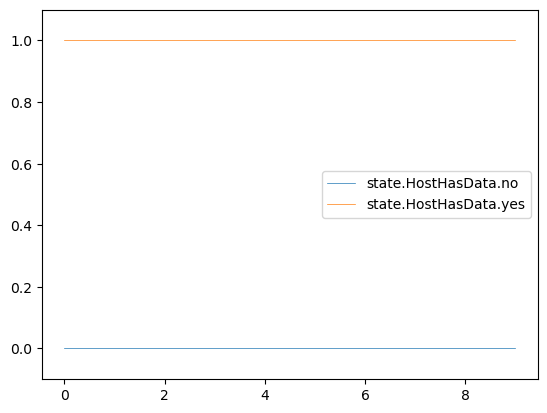

agent_i.HostHasData.no  agent_i.HostHasData.yes  agent_i.action  \
0                0.500000                 0.500000       FileRecon   
1                0.592105                 0.407895    EnumAccounts   
2                0.592105                 0.407895    EnumAccounts   
3                0.592105                 0.407895      PrivEscAcc   
4                0.592105                 0.407895       FileRecon   
5                0.800040                 0.199960       FileRecon   
6                0.359617                 0.640383  ManipulateData   
7                0.000581                 0.999419            Exit   
8                0.000581                 0.999419             Nop   
9                0.000581                 0.999419             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           success  
4                           failure  
5                           success  
6                           success  
7                           success  
8                           failure  
9                           success

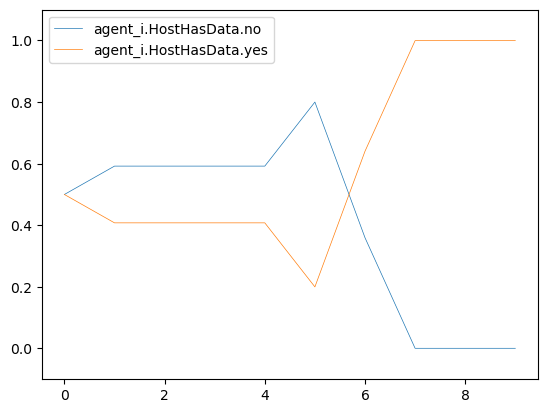

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                        file_enum  
5       FileRecon                       file_write  
6  ManipulateData                   login_activity  
7            Exit                             none  
8             Nop                             none  
9             Nop                             none

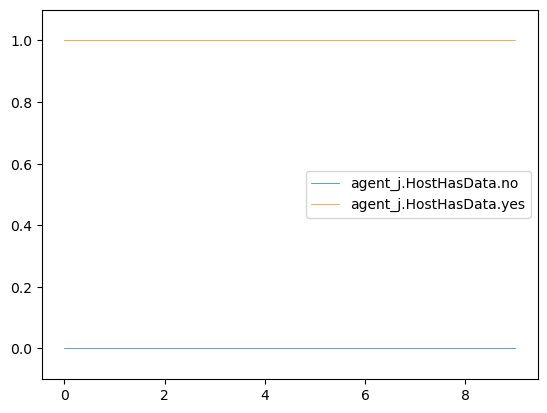

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes  agent_i.action  \
0                    1.0                     0.0       FileRecon   
1                    1.0                     0.0    EnumAccounts   
2                    1.0                     0.0    EnumAccounts   
3                    1.0                     0.0      PrivEscAcc   
4                    1.0                     0.0       FileRecon   
5                    1.0                     0.0       FileRecon   
6                    1.0                     0.0  ManipulateData   
7                    0.0                     1.0            Exit   
8                    0.0                     1.0             Nop   
9                    0.0                     1.0             Nop   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

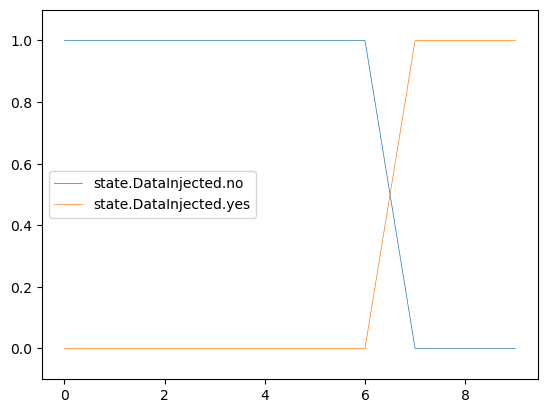

agent_i.DataInjected.no  agent_i.DataInjected.yes  agent_i.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000    EnumAccounts   
3                 1.000000                  0.000000      PrivEscAcc   
4                 1.000000                  0.000000       FileRecon   
5                 1.000000                  0.000000       FileRecon   
6                 1.000000                  0.000000  ManipulateData   
7                 0.000615                  0.999385            Exit   
8                 0.000615                  0.999385             Nop   
9                 0.000615                  0.999385             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           success  
4                           failure  
5                           success  
6                           success  
7                           success  
8                           failure  
9                           success

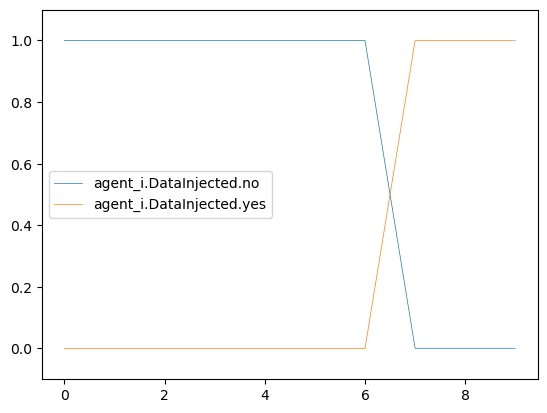

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000   DecoyAccount   
2                 1.000000                  0.000000            Nop   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 0.950085                  0.049915            Nop   
6                 0.189247                  0.810753            Nop   
7                 0.149424                  0.850576            Nop   
8                 0.119871                  0.880128            Nop   
9                 0.119058                  0.880942            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                        file_enum  
5       FileRecon                       file_write  
6  ManipulateData                   login_activity  
7            Exit                             none  
8             Nop                             none  
9             Nop                             none

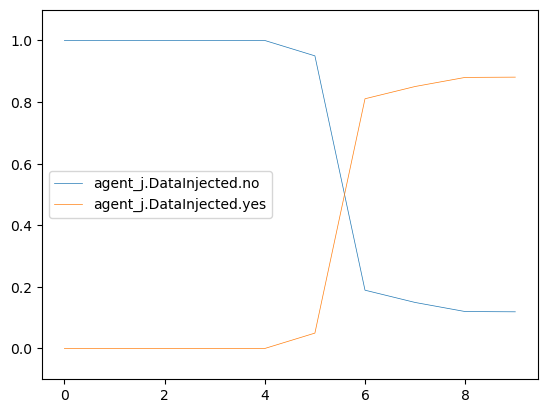

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user  agent_i.action  \
0                     0.0                     1.0       FileRecon   
1                     0.0                     1.0    EnumAccounts   
2                     0.0                     1.0    EnumAccounts   
3                     0.0                     1.0      PrivEscAcc   
4                     1.0                     0.0       FileRecon   
5                     1.0                     0.0       FileRecon   
6                     1.0                     0.0  ManipulateData   
7                     1.0                     0.0            Exit   
8                     1.0                     0.0             Nop   
9                     1.0                     0.0             Nop   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

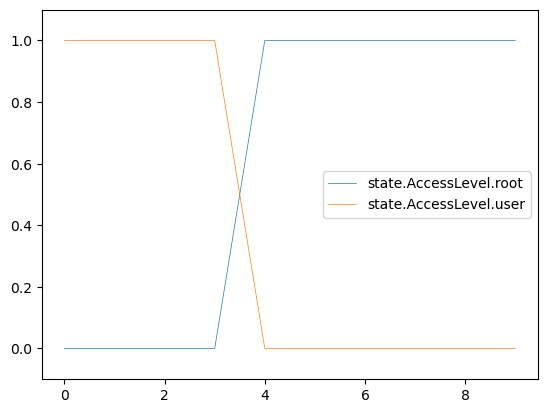

agent_i.AccessLevel.root  agent_i.AccessLevel.user  agent_i.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000    EnumAccounts   
3                  0.000000                  1.000000      PrivEscAcc   
4                  0.999822                  0.000178       FileRecon   
5                  0.999755                  0.000245       FileRecon   
6                  0.999875                  0.000125  ManipulateData   
7                  0.999956                  0.000044            Exit   
8                  0.999956                  0.000044             Nop   
9                  0.999956                  0.000044             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           success  
4                           failure  
5                           success  
6                           success  
7                           success  
8                           failure  
9                           success

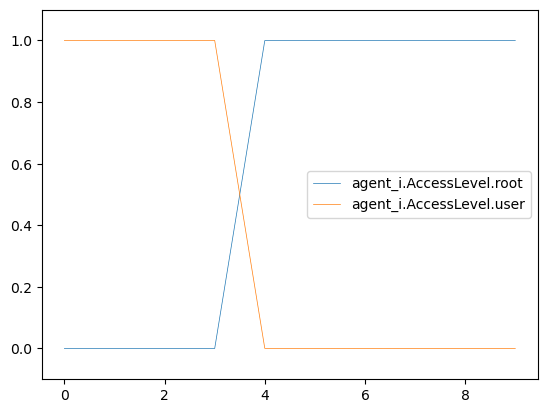

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000   DecoyAccount   
2                  0.000000                  1.000000            Nop   
3                  0.199936                  0.800064            Nop   
4                  0.311791                  0.688209            Nop   
5                  0.671626                  0.328374            Nop   
6                  0.903228                  0.096772            Nop   
7                  0.903227                  0.096772            Nop   
8                  0.900230                  0.099770            Nop   
9                  0.900152                  0.099848            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                        file_enum  
5       FileRecon                       file_write  
6  ManipulateData                   login_activity  
7            Exit                             none  
8             Nop                             none  
9             Nop                             none

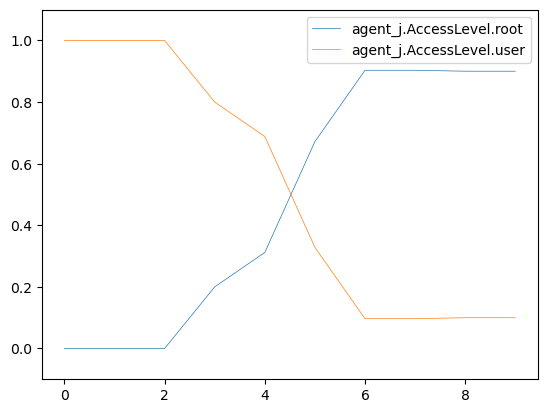

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot  agent_i.action agent_j.action  
0                      1.0       FileRecon            Nop  
1                      1.0    EnumAccounts   DecoyAccount  
2                      1.0    EnumAccounts            Nop  
3                      1.0      PrivEscAcc            Nop  
4                      1.0       FileRecon            Nop  
5                      1.0       FileRecon            Nop  
6                      1.0  ManipulateData            Nop  
7                      1.0            Exit            Nop  
8                      1.0             Nop            Nop  
9                      1.0             Nop            Nop

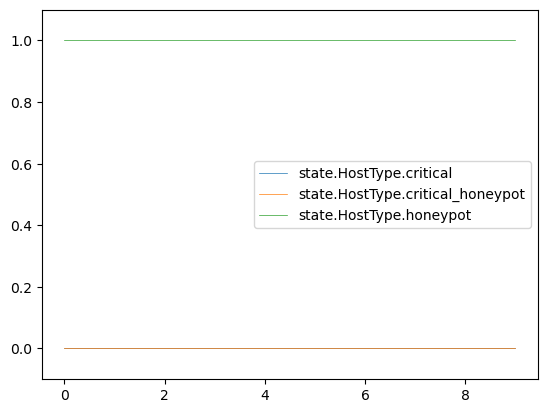

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.300000                                 0.0   
2                   0.191753                                 0.0   
3                   0.060228                                 0.0   
4                   0.048215                                 0.0   
5                   0.105713                                 0.0   
6                   0.048210                                 0.0   
7                   0.048204                                 0.0   
8                   0.048204                                 0.0   
9                   0.048204                                 0.0   

   agent_i.HostType.honeypot  agent_i.action agent_j.action  \
0                   0.500000       FileRecon            Nop   
1                   0.700000    EnumAccounts   DecoyAccount   
2                   0.808247    EnumAccounts            Nop   
3                   0.939772      PrivEscAcc            Nop   
4                   0.951785       FileRecon            Nop   
5                   0.894287       FileRecon            Nop   
6                   0.951790  ManipulateData            Nop   
7                   0.951796            Exit            Nop   
8                   0.951796             Nop            Nop   
9                   0.951796             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                         none                           failure  
1                         none                           failure  
2                         none                           success  
3                         none                           success  
4                   user_files                           failure  
5                         none                           success  
6                   user_files                           success  
7                   user_files                           success  
8                         none                           failure  
9                   user_files                           success

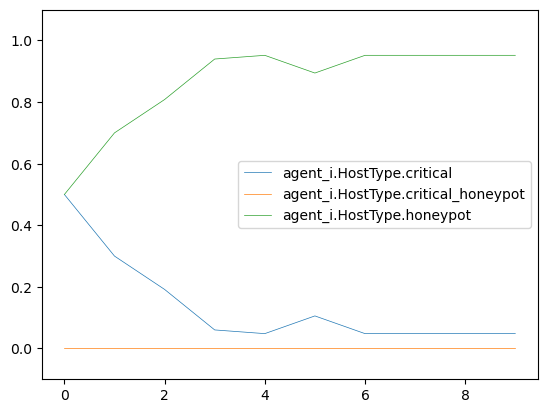

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot agent_j.action  agent_i.action  \
0                        1.0            Nop       FileRecon   
1                        1.0   DecoyAccount    EnumAccounts   
2                        1.0            Nop    EnumAccounts   
3                        1.0            Nop      PrivEscAcc   
4                        1.0            Nop       FileRecon   
5                        1.0            Nop       FileRecon   
6                        1.0            Nop  ManipulateData   
7                        1.0            Nop            Exit   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                   login_activity  
4                        file_enum  
5                       file_write  
6                   login_activity  
7                             none  
8                             none  
9                             none

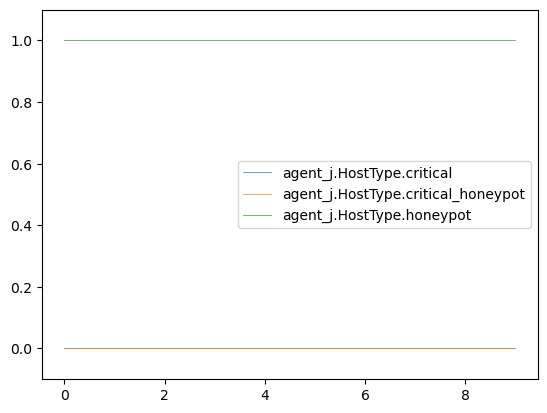

=============AttActive============


state.AttActive.no  state.AttActive.yes  agent_i.action agent_j.action
0                 0.0                  1.0       FileRecon            Nop
1                 0.0                  1.0    EnumAccounts   DecoyAccount
2                 0.0                  1.0    EnumAccounts            Nop
3                 0.0                  1.0      PrivEscAcc            Nop
4                 0.0                  1.0       FileRecon            Nop
5                 0.0                  1.0       FileRecon            Nop
6                 0.0                  1.0  ManipulateData            Nop
7                 0.0                  1.0            Exit            Nop
8                 1.0                  0.0             Nop            Nop
9                 1.0                  0.0             Nop            Nop

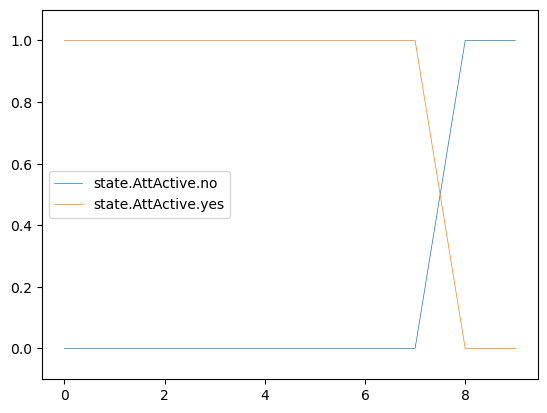

agent_i.AttActive.no  agent_i.AttActive.yes  agent_i.action agent_j.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0    EnumAccounts   DecoyAccount   
2                   0.0                    1.0    EnumAccounts            Nop   
3                   0.0                    1.0      PrivEscAcc            Nop   
4                   0.0                    1.0       FileRecon            Nop   
5                   0.0                    1.0       FileRecon            Nop   
6                   0.0                    1.0  ManipulateData            Nop   
7                   0.0                    1.0            Exit            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                         none                           failure  
1                         none                           failure  
2                         none                           success  
3                         none                           success  
4                   user_files                           failure  
5                         none                           success  
6                   user_files                           success  
7                   user_files                           success  
8                         none                           failure  
9                   user_files                           success

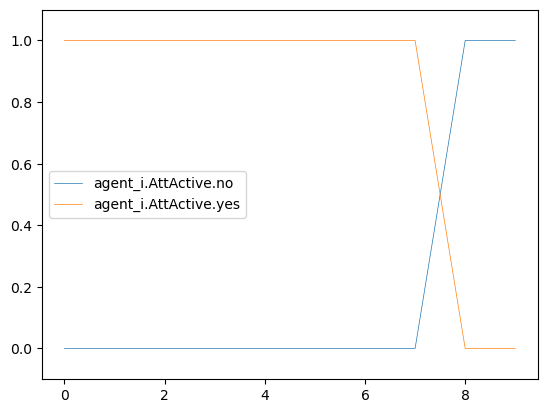

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action  agent_i.action  \
0              0.000000               1.000000            Nop       FileRecon   
1              0.000000               1.000000   DecoyAccount    EnumAccounts   
2              0.000000               1.000000            Nop    EnumAccounts   
3              0.000005               0.999995            Nop      PrivEscAcc   
4              0.596566               0.403434            Nop       FileRecon   
5              0.307005               0.692995            Nop       FileRecon   
6              0.106890               0.893110            Nop  ManipulateData   
7              0.920295               0.079705            Nop            Exit   
8              0.994831               0.005169            Nop             Nop   
9              0.999869               0.000131            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                   login_activity  
4                        file_enum  
5                       file_write  
6                   login_activity  
7                             none  
8                             none  
9                             none

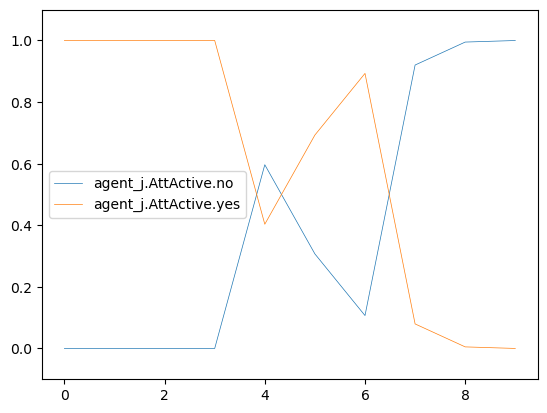

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user  agent_i.action agent_j.action
0                   1.0                   0.0       FileRecon            Nop
1                   1.0                   0.0    EnumAccounts   DecoyAccount
2                   1.0                   0.0    EnumAccounts            Nop
3                   1.0                   0.0      PrivEscAcc            Nop
4                   1.0                   0.0       FileRecon            Nop
5                   1.0                   0.0       FileRecon            Nop
6                   1.0                   0.0  ManipulateData            Nop
7                   1.0                   0.0            Exit            Nop
8                   1.0                   0.0             Nop            Nop
9                   1.0                   0.0             Nop            Nop

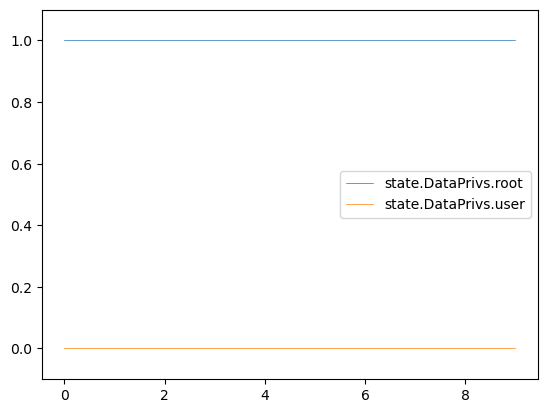

agent_i.DataPrivs.root  agent_i.DataPrivs.user  agent_i.action  \
0                0.500000                0.500000       FileRecon   
1                0.592105                0.407895    EnumAccounts   
2                0.592105                0.407895    EnumAccounts   
3                0.592105                0.407895      PrivEscAcc   
4                0.592105                0.407895       FileRecon   
5                0.551188                0.448813       FileRecon   
6                0.661641                0.338359  ManipulateData   
7                0.751684                0.248316            Exit   
8                0.751684                0.248316             Nop   
9                0.751684                0.248316             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           success  
4                           failure  
5                           success  
6                           success  
7                           success  
8                           failure  
9                           success

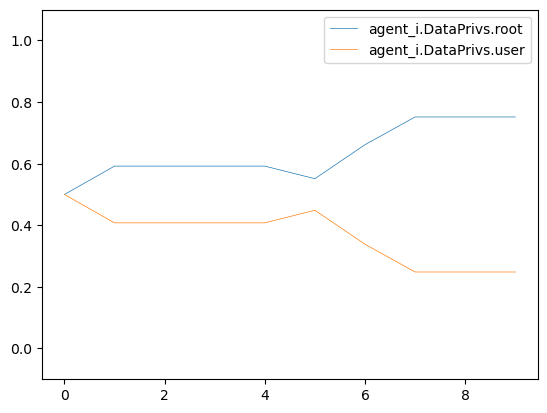

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                        file_enum  
5       FileRecon                       file_write  
6  ManipulateData                   login_activity  
7            Exit                             none  
8             Nop                             none  
9             Nop                             none

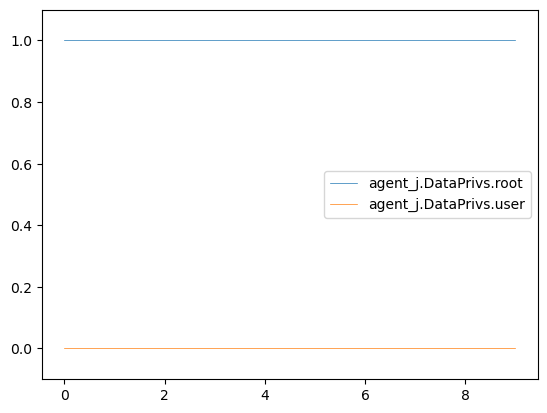

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.527039                        0.472961   
3                         0.237407                        0.762593   
4                         0.375147                        0.624853   
5                         0.375085                        0.624915   
6                         0.375085                        0.624915   
7                         0.375085                        0.624915   
8                         0.375085                        0.624915   
9                         0.375085                        0.624915   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                   user_files                           failure  
1                   user_files                           success  
2                         none                           success  
3                         none                           success  
4                   user_files                           success  
5                         none                           failure  
6                         none                           success  
7                         none                           success  
8                         none                           failure  
9                   user_files                           failure

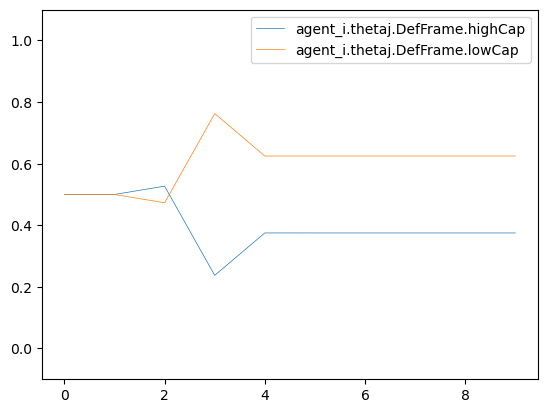

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                             none
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                       file_write
6                               1.0                   login_activity
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

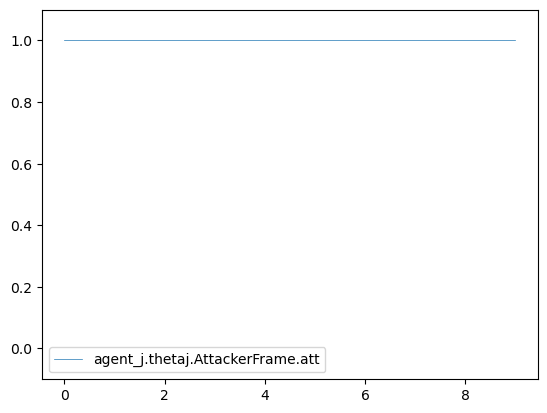

=============DataFound============


state.DataFound.no  state.DataFound.yes  agent_i.action agent_j.action
0                 1.0                  0.0       FileRecon            Nop
1                 1.0                  0.0    EnumAccounts   DecoyAccount
2                 1.0                  0.0      PrivEscAcc            Nop
3                 1.0                  0.0       FileRecon            Nop
4                 0.0                  1.0  ManipulateData            Nop
5                 0.0                  1.0            Exit            Nop
6                 0.0                  1.0             Nop            Nop
7                 0.0                  1.0             Nop            Nop
8                 0.0                  1.0             Nop            Nop
9                 0.0                  1.0             Nop            Nop

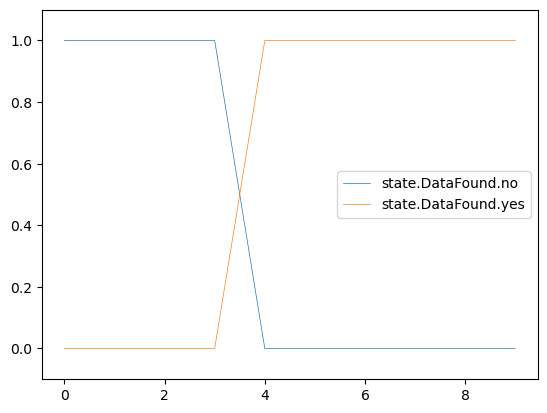

agent_i.DataFound.no  agent_i.DataFound.yes  agent_i.action agent_j.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.976974               0.023026    EnumAccounts   DecoyAccount   
2              0.976974               0.023026      PrivEscAcc            Nop   
3              0.976974               0.023026       FileRecon            Nop   
4              0.211992               0.788008  ManipulateData            Nop   
5              0.000269               0.999731            Exit            Nop   
6              0.000269               0.999731             Nop            Nop   
7              0.000269               0.999731             Nop            Nop   
8              0.000269               0.999731             Nop            Nop   
9              0.000269               0.999731             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                   user_files                           failure  
1                   user_files                           success  
2                         none                           success  
3                         none                           success  
4                   user_files                           success  
5                         none                           failure  
6                         none                           success  
7                         none                           success  
8                         none                           failure  
9                   user_files                           failure

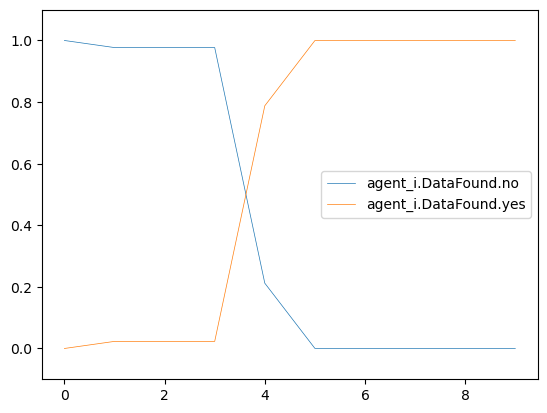

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action  agent_i.action  \
0              1.000000               0.000000            Nop       FileRecon   
1              1.000000               0.000000   DecoyAccount    EnumAccounts   
2              1.000000               0.000000            Nop      PrivEscAcc   
3              1.000000               0.000000            Nop       FileRecon   
4              0.383625               0.616375            Nop  ManipulateData   
5              0.089481               0.910519            Nop            Exit   
6              0.047070               0.952930            Nop             Nop   
7              0.040986               0.959014            Nop             Nop   
8              0.041019               0.958981            Nop             Nop   
9              0.041019               0.958981            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                             none  
3                        file_enum  
4                       file_write  
5                       file_write  
6                   login_activity  
7                             none  
8                             none  
9                             none

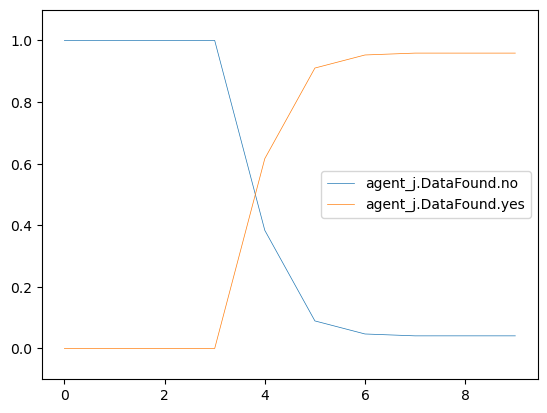

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes  agent_i.action agent_j.action
0                   1.0                    0.0       FileRecon            Nop
1                   1.0                    0.0    EnumAccounts   DecoyAccount
2                   0.0                    1.0      PrivEscAcc            Nop
3                   0.0                    1.0       FileRecon            Nop
4                   0.0                    1.0  ManipulateData            Nop
5                   0.0                    1.0            Exit            Nop
6                   0.0                    1.0             Nop            Nop
7                   0.0                    1.0             Nop            Nop
8                   0.0                    1.0             Nop            Nop
9                   0.0                    1.0             Nop            Nop

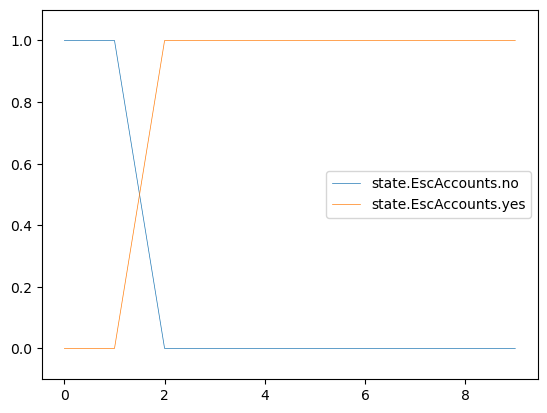

agent_i.EscAccounts.no  agent_i.EscAccounts.yes  agent_i.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.114807                 0.885193      PrivEscAcc   
3                0.000223                 0.999777       FileRecon   
4                0.000085                 0.999915  ManipulateData   
5                0.000049                 0.999951            Exit   
6                0.000049                 0.999951             Nop   
7                0.000049                 0.999951             Nop   
8                0.000049                 0.999951             Nop   
9                0.000049                 0.999951             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                   user_files   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           success  
7                           success  
8                           failure  
9                           failure

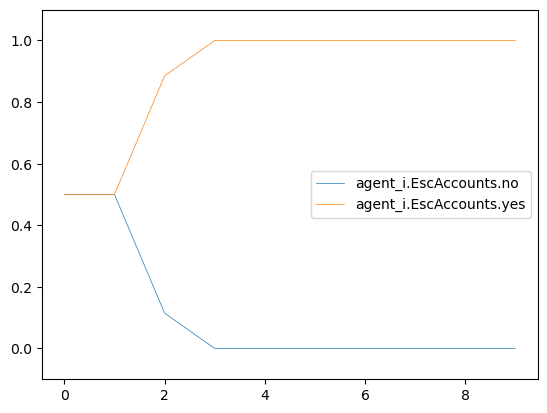

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                             none  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                       file_write  
6             Nop                   login_activity  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

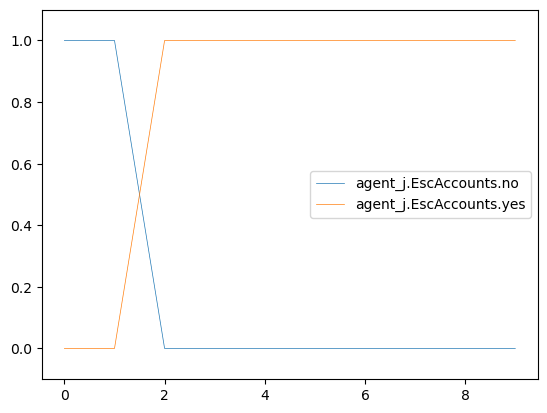

=============AccFound============


state.AccFound.no  state.AccFound.yes  agent_i.action agent_j.action
0                1.0                 0.0       FileRecon            Nop
1                1.0                 0.0    EnumAccounts   DecoyAccount
2                0.0                 1.0      PrivEscAcc            Nop
3                0.0                 1.0       FileRecon            Nop
4                0.0                 1.0  ManipulateData            Nop
5                0.0                 1.0            Exit            Nop
6                0.0                 1.0             Nop            Nop
7                0.0                 1.0             Nop            Nop
8                0.0                 1.0             Nop            Nop
9                0.0                 1.0             Nop            Nop

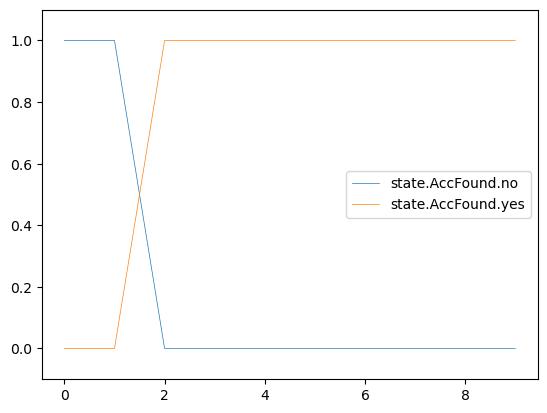

agent_i.AccFound.no  agent_i.AccFound.yes  agent_i.action agent_j.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000    EnumAccounts   DecoyAccount   
2             0.155043              0.844957      PrivEscAcc            Nop   
3             0.000302              0.999698       FileRecon            Nop   
4             0.000119              0.999881  ManipulateData            Nop   
5             0.000069              0.999931            Exit            Nop   
6             0.000069              0.999931             Nop            Nop   
7             0.000069              0.999931             Nop            Nop   
8             0.000069              0.999931             Nop            Nop   
9             0.000069              0.999931             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                   user_files                           failure  
1                   user_files                           success  
2                         none                           success  
3                         none                           success  
4                   user_files                           success  
5                         none                           failure  
6                         none                           success  
7                         none                           success  
8                         none                           failure  
9                   user_files                           failure

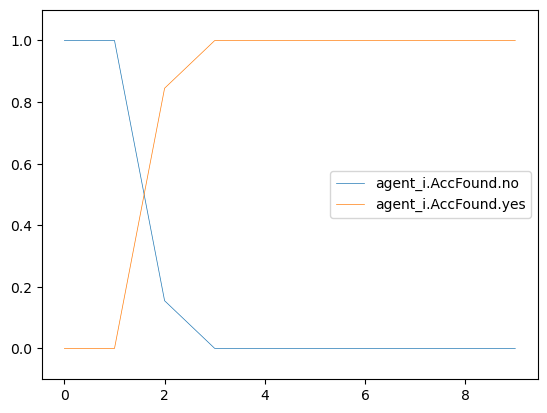

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action  agent_i.action  \
0             1.000000              0.000000            Nop       FileRecon   
1             1.000000              0.000000   DecoyAccount    EnumAccounts   
2             0.310937              0.689063            Nop      PrivEscAcc   
3             0.300077              0.699923            Nop       FileRecon   
4             0.101942              0.898058            Nop  ManipulateData   
5             0.028936              0.971064            Nop            Exit   
6             0.022556              0.977444            Nop             Nop   
7             0.022556              0.977444            Nop             Nop   
8             0.022708              0.977292            Nop             Nop   
9             0.022708              0.977292            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                             none  
3                        file_enum  
4                       file_write  
5                       file_write  
6                   login_activity  
7                             none  
8                             none  
9                             none

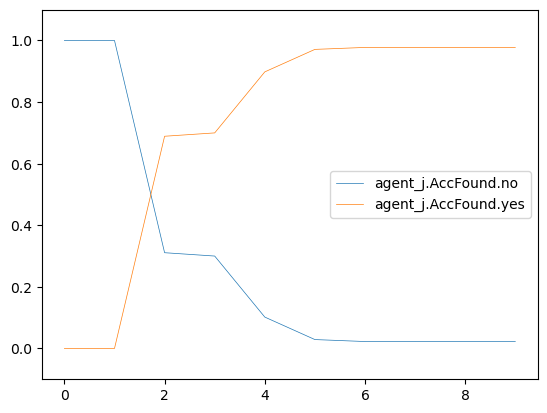

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes  agent_i.action agent_j.action
0                   0.0                    1.0       FileRecon            Nop
1                   0.0                    1.0    EnumAccounts   DecoyAccount
2                   0.0                    1.0      PrivEscAcc            Nop
3                   0.0                    1.0       FileRecon            Nop
4                   0.0                    1.0  ManipulateData            Nop
5                   0.0                    1.0            Exit            Nop
6                   0.0                    1.0             Nop            Nop
7                   0.0                    1.0             Nop            Nop
8                   0.0                    1.0             Nop            Nop
9                   0.0                    1.0             Nop            Nop

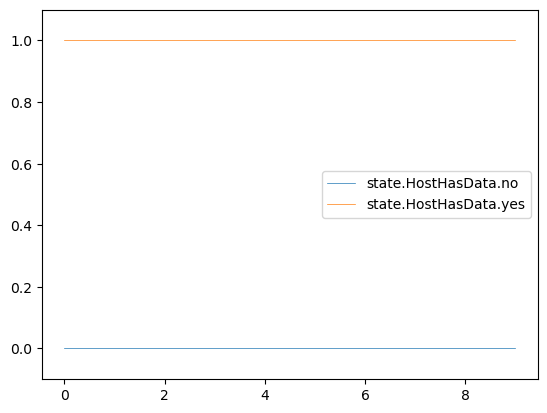

agent_i.HostHasData.no  agent_i.HostHasData.yes  agent_i.action  \
0                0.500000                 0.500000       FileRecon   
1                0.592105                 0.407895    EnumAccounts   
2                0.592105                 0.407895      PrivEscAcc   
3                0.592105                 0.407895       FileRecon   
4                0.177364                 0.822636  ManipulateData   
5                0.000225                 0.999775            Exit   
6                0.000225                 0.999775             Nop   
7                0.000225                 0.999775             Nop   
8                0.000225                 0.999775             Nop   
9                0.000225                 0.999775             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                   user_files   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           success  
7                           success  
8                           failure  
9                           failure

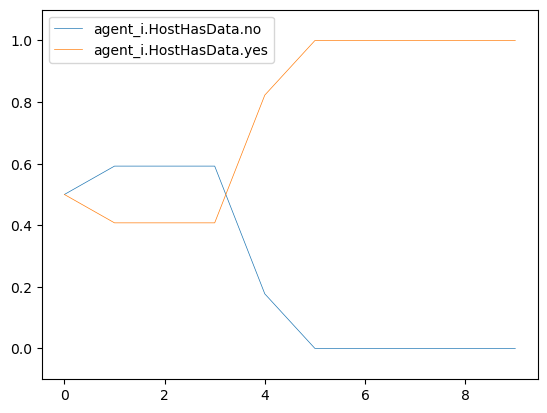

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                             none  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                       file_write  
6             Nop                   login_activity  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

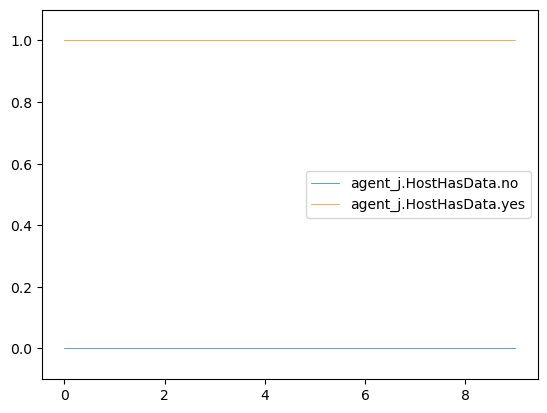

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes  agent_i.action  \
0                    1.0                     0.0       FileRecon   
1                    1.0                     0.0    EnumAccounts   
2                    1.0                     0.0      PrivEscAcc   
3                    1.0                     0.0       FileRecon   
4                    1.0                     0.0  ManipulateData   
5                    0.0                     1.0            Exit   
6                    0.0                     1.0             Nop   
7                    0.0                     1.0             Nop   
8                    0.0                     1.0             Nop   
9                    0.0                     1.0             Nop   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

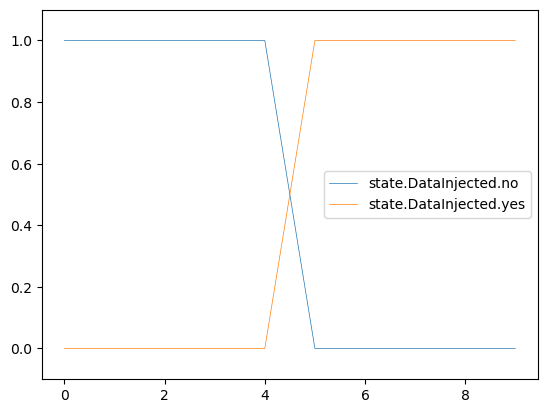

agent_i.DataInjected.no  agent_i.DataInjected.yes  agent_i.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.000269                  0.999731            Exit   
6                 0.000269                  0.999731             Nop   
7                 0.000269                  0.999731             Nop   
8                 0.000269                  0.999731             Nop   
9                 0.000269                  0.999731             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                   user_files   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           success  
7                           success  
8                           failure  
9                           failure

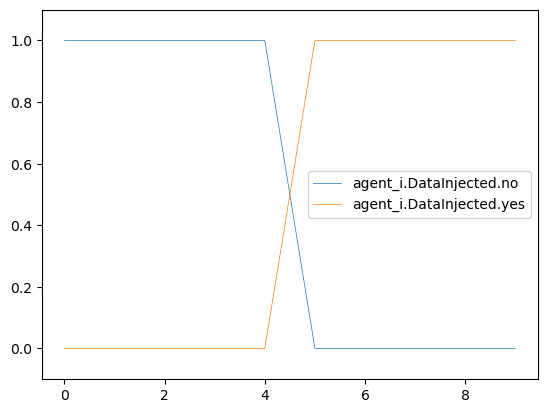

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000   DecoyAccount   
2                 1.000000                  0.000000            Nop   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 0.140247                  0.859753            Nop   
6                 0.081124                  0.918876            Nop   
7                 0.050485                  0.949515            Nop   
8                 0.043040                  0.956960            Nop   
9                 0.043038                  0.956962            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                             none  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                       file_write  
6             Nop                   login_activity  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

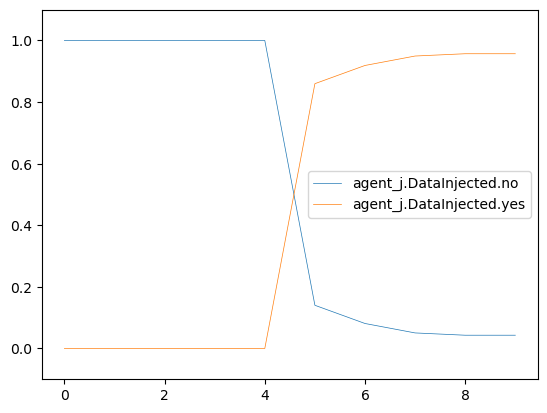

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user  agent_i.action  \
0                     0.0                     1.0       FileRecon   
1                     0.0                     1.0    EnumAccounts   
2                     0.0                     1.0      PrivEscAcc   
3                     1.0                     0.0       FileRecon   
4                     1.0                     0.0  ManipulateData   
5                     1.0                     0.0            Exit   
6                     1.0                     0.0             Nop   
7                     1.0                     0.0             Nop   
8                     1.0                     0.0             Nop   
9                     1.0                     0.0             Nop   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

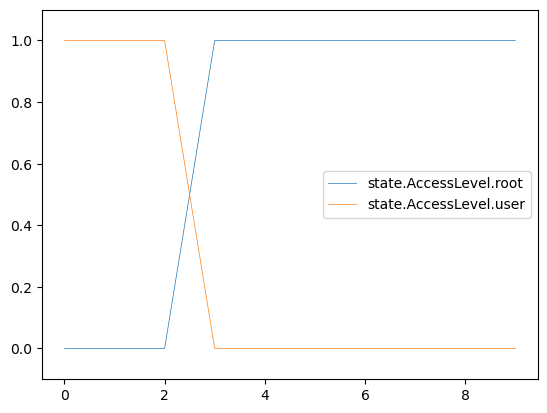

agent_i.AccessLevel.root  agent_i.AccessLevel.user  agent_i.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.999053                  0.000947       FileRecon   
4                  0.999660                  0.000340  ManipulateData   
5                  0.999803                  0.000197            Exit   
6                  0.999803                  0.000197             Nop   
7                  0.999803                  0.000197             Nop   
8                  0.999803                  0.000197             Nop   
9                  0.999803                  0.000197             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                   user_files   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           success  
7                           success  
8                           failure  
9                           failure

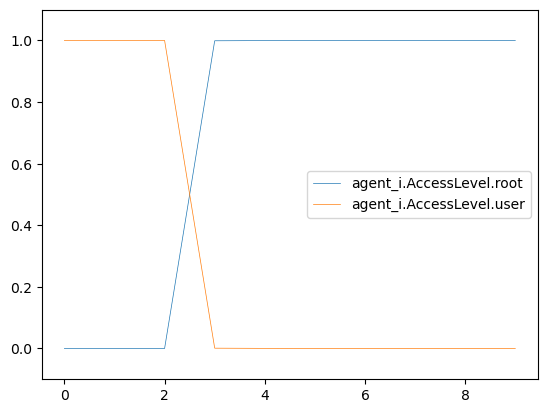

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000   DecoyAccount   
2                  0.000000                  1.000000            Nop   
3                  0.620098                  0.379902            Nop   
4                  0.882530                  0.117470            Nop   
5                  0.967420                  0.032580            Nop   
6                  0.974605                  0.025395            Nop   
7                  0.974605                  0.025395            Nop   
8                  0.974434                  0.025566            Nop   
9                  0.974434                  0.025566            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                             none  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                       file_write  
6             Nop                   login_activity  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

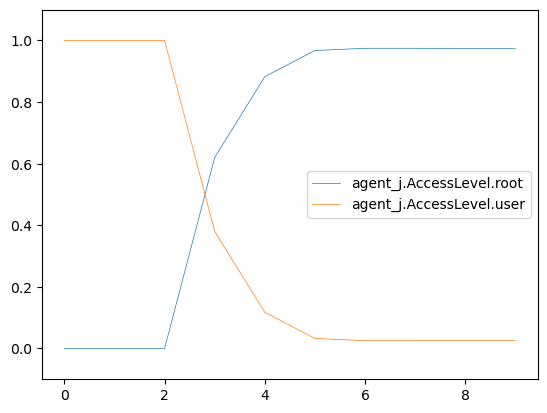

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot  agent_i.action agent_j.action  
0                      1.0       FileRecon            Nop  
1                      1.0    EnumAccounts   DecoyAccount  
2                      1.0      PrivEscAcc            Nop  
3                      1.0       FileRecon            Nop  
4                      1.0  ManipulateData            Nop  
5                      1.0            Exit            Nop  
6                      1.0             Nop            Nop  
7                      1.0             Nop            Nop  
8                      1.0             Nop            Nop  
9                      1.0             Nop            Nop

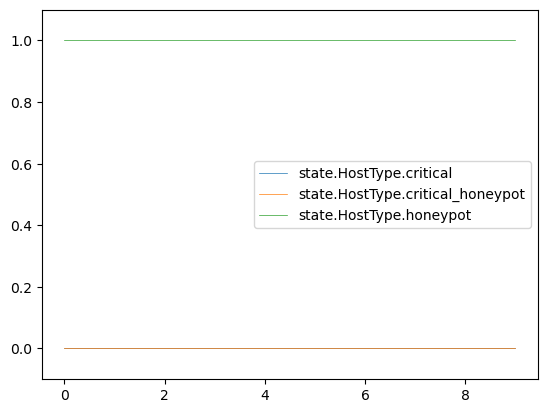

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.700000                                 0.0   
2                   0.799142                                 0.0   
3                   0.645037                                 0.0   
4                   0.437663                                 0.0   
5                   0.437594                                 0.0   
6                   0.437594                                 0.0   
7                   0.437594                                 0.0   
8                   0.437594                                 0.0   
9                   0.437594                                 0.0   

   agent_i.HostType.honeypot  agent_i.action agent_j.action  \
0                   0.500000       FileRecon            Nop   
1                   0.300000    EnumAccounts   DecoyAccount   
2                   0.200858      PrivEscAcc            Nop   
3                   0.354963       FileRecon            Nop   
4                   0.562337  ManipulateData            Nop   
5                   0.562406            Exit            Nop   
6                   0.562406             Nop            Nop   
7                   0.562406             Nop            Nop   
8                   0.562406             Nop            Nop   
9                   0.562406             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                   user_files                           failure  
1                   user_files                           success  
2                         none                           success  
3                         none                           success  
4                   user_files                           success  
5                         none                           failure  
6                         none                           success  
7                         none                           success  
8                         none                           failure  
9                   user_files                           failure

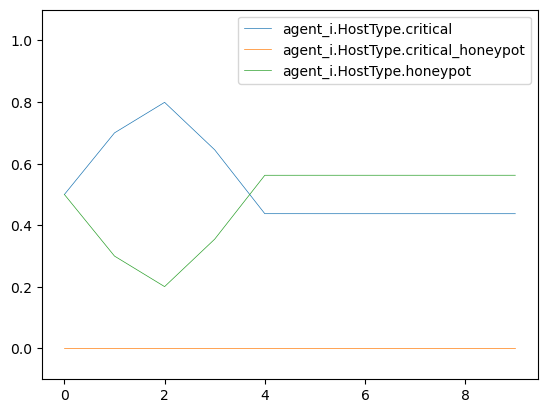

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot agent_j.action  agent_i.action  \
0                        1.0            Nop       FileRecon   
1                        1.0   DecoyAccount    EnumAccounts   
2                        1.0            Nop      PrivEscAcc   
3                        1.0            Nop       FileRecon   
4                        1.0            Nop  ManipulateData   
5                        1.0            Nop            Exit   
6                        1.0            Nop             Nop   
7                        1.0            Nop             Nop   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                             none  
3                        file_enum  
4                       file_write  
5                       file_write  
6                   login_activity  
7                             none  
8                             none  
9                             none

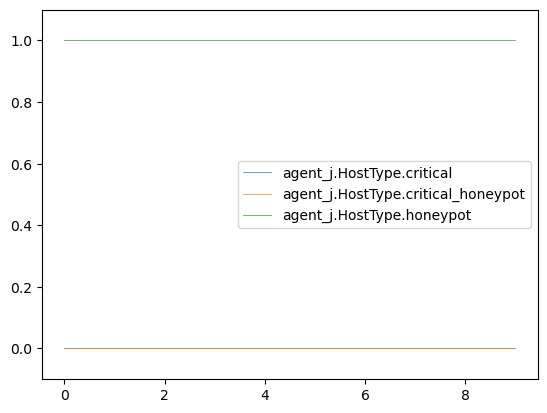

=============AttActive============


state.AttActive.no  state.AttActive.yes  agent_i.action agent_j.action
0                 0.0                  1.0       FileRecon            Nop
1                 0.0                  1.0    EnumAccounts   DecoyAccount
2                 0.0                  1.0      PrivEscAcc            Nop
3                 0.0                  1.0       FileRecon            Nop
4                 0.0                  1.0  ManipulateData            Nop
5                 0.0                  1.0            Exit            Nop
6                 1.0                  0.0             Nop            Nop
7                 1.0                  0.0             Nop            Nop
8                 1.0                  0.0             Nop            Nop
9                 1.0                  0.0             Nop            Nop

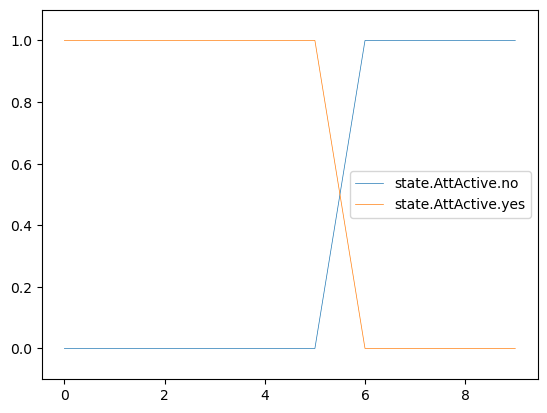

agent_i.AttActive.no  agent_i.AttActive.yes  agent_i.action agent_j.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0    EnumAccounts   DecoyAccount   
2                   0.0                    1.0      PrivEscAcc            Nop   
3                   0.0                    1.0       FileRecon            Nop   
4                   0.0                    1.0  ManipulateData            Nop   
5                   0.0                    1.0            Exit            Nop   
6                   1.0                    0.0             Nop            Nop   
7                   1.0                    0.0             Nop            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                   user_files                           failure  
1                   user_files                           success  
2                         none                           success  
3                         none                           success  
4                   user_files                           success  
5                         none                           failure  
6                         none                           success  
7                         none                           success  
8                         none                           failure  
9                   user_files                           failure

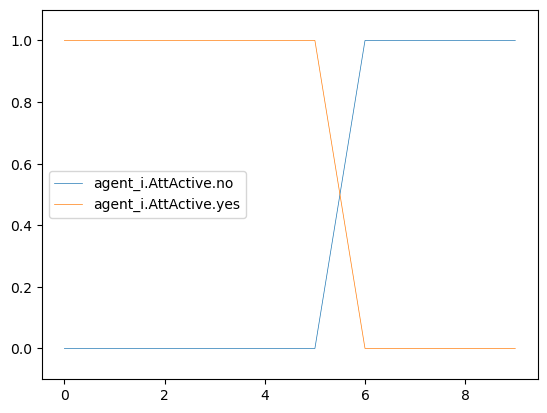

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action  agent_i.action  \
0              0.000000           1.000000e+00            Nop       FileRecon   
1              0.000000           1.000000e+00   DecoyAccount    EnumAccounts   
2              0.000000           1.000000e+00            Nop      PrivEscAcc   
3              0.000109           9.998906e-01            Nop       FileRecon   
4              0.061121           9.388795e-01            Nop  ManipulateData   
5              0.024950           9.750498e-01            Nop            Exit   
6              0.694600           3.053998e-01            Nop             Nop   
7              0.956467           4.353304e-02            Nop             Nop   
8              0.998873           1.127064e-03            Nop             Nop   
9              1.000000           3.601659e-07            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                             none  
3                        file_enum  
4                       file_write  
5                       file_write  
6                   login_activity  
7                             none  
8                             none  
9                             none

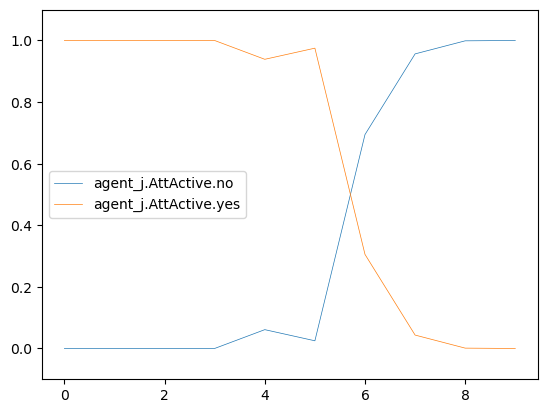

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user  agent_i.action agent_j.action
0                   1.0                   0.0       FileRecon            Nop
1                   1.0                   0.0    EnumAccounts   DecoyAccount
2                   1.0                   0.0      PrivEscAcc            Nop
3                   1.0                   0.0       FileRecon            Nop
4                   1.0                   0.0  ManipulateData            Nop
5                   1.0                   0.0            Exit            Nop
6                   1.0                   0.0             Nop            Nop
7                   1.0                   0.0             Nop            Nop
8                   1.0                   0.0             Nop            Nop
9                   1.0                   0.0             Nop            Nop

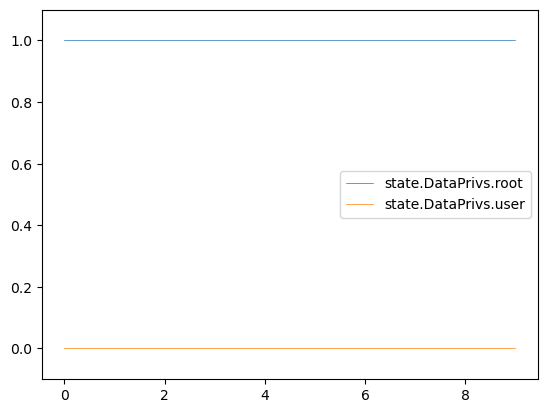

agent_i.DataPrivs.root  agent_i.DataPrivs.user  agent_i.action  \
0                0.500000                0.500000       FileRecon   
1                0.592105                0.407895    EnumAccounts   
2                0.592105                0.407895      PrivEscAcc   
3                0.592105                0.407895       FileRecon   
4                0.673650                0.326350  ManipulateData   
5                0.708478                0.291522            Exit   
6                0.708478                0.291522             Nop   
7                0.708478                0.291522             Nop   
8                0.708478                0.291522             Nop   
9                0.708478                0.291522             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                   user_files   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           success  
7                           success  
8                           failure  
9                           failure

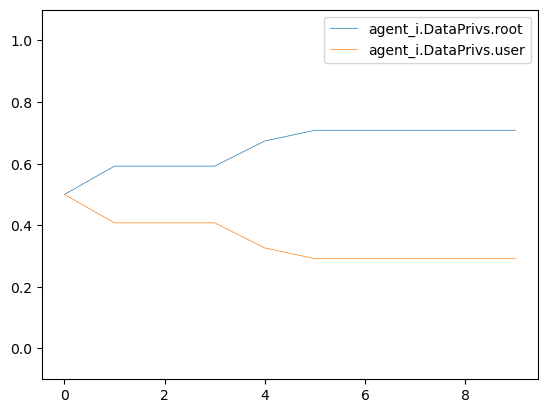

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                             none  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                       file_write  
6             Nop                   login_activity  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

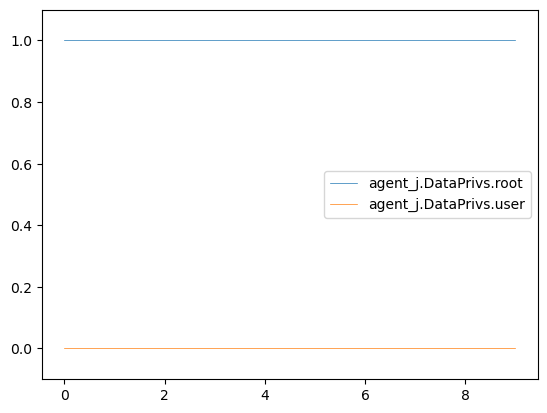

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.577778                        0.422222   
3                         0.500111                        0.499889   
4                         0.583346                        0.416654   
5                         0.583340                        0.416660   
6                         0.583340                        0.416660   
7                         0.583340                        0.416660   
8                         0.583340                        0.416660   
9                         0.583340                        0.416660   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                   user_files                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           success  
4                         none                           success  
5                         none                           success  
6                         none                           failure  
7                         none                           success  
8                   user_files                           failure  
9                         none                           failure

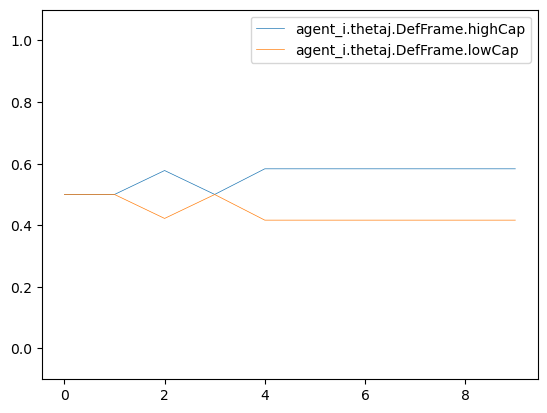

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'
0                               1.0                             none
1                               1.0                        file_enum
2                               1.0                   login_activity
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                   login_activity
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

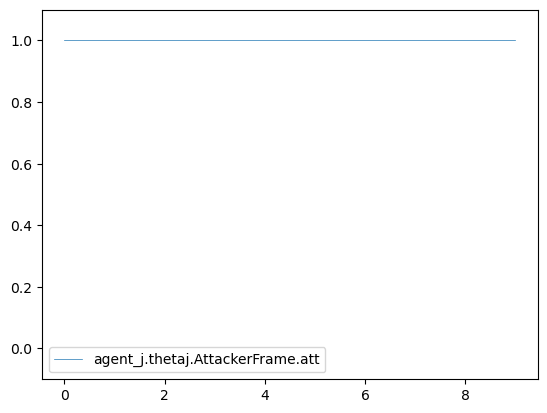

=============DataFound============


state.DataFound.no  state.DataFound.yes  agent_i.action agent_j.action
0                 1.0                  0.0       FileRecon            Nop
1                 1.0                  0.0    EnumAccounts   DecoyAccount
2                 1.0                  0.0      PrivEscAcc            Nop
3                 1.0                  0.0       FileRecon            Nop
4                 0.0                  1.0  ManipulateData            Nop
5                 0.0                  1.0            Exit            Nop
6                 0.0                  1.0             Nop            Nop
7                 0.0                  1.0             Nop            Nop
8                 0.0                  1.0             Nop            Nop
9                 0.0                  1.0             Nop            Nop

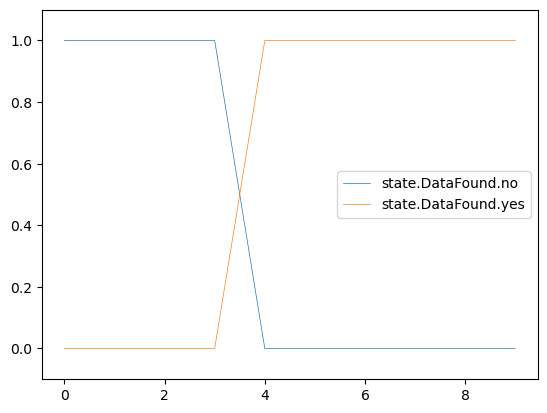

agent_i.DataFound.no  agent_i.DataFound.yes  agent_i.action agent_j.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.976974               0.023026    EnumAccounts   DecoyAccount   
2              0.976974               0.023026      PrivEscAcc            Nop   
3              0.976974               0.023026       FileRecon            Nop   
4              0.211924               0.788076  ManipulateData            Nop   
5              0.000269               0.999731            Exit            Nop   
6              0.000269               0.999731             Nop            Nop   
7              0.000269               0.999731             Nop            Nop   
8              0.000269               0.999731             Nop            Nop   
9              0.000269               0.999731             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                   user_files                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           success  
4                         none                           success  
5                         none                           success  
6                         none                           failure  
7                         none                           success  
8                   user_files                           failure  
9                         none                           failure

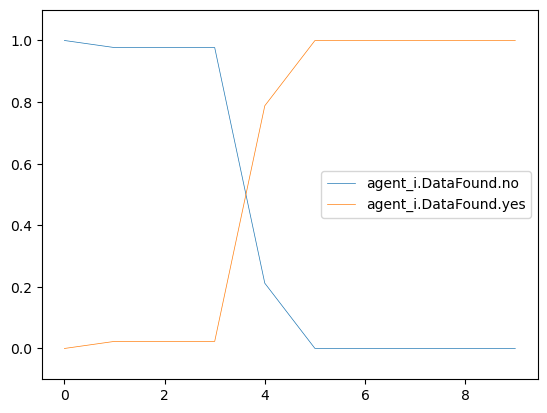

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action  agent_i.action  \
0              1.000000               0.000000            Nop       FileRecon   
1              1.000000               0.000000   DecoyAccount    EnumAccounts   
2              1.000000               0.000000            Nop      PrivEscAcc   
3              1.000000               0.000000            Nop       FileRecon   
4              0.339744               0.660256            Nop  ManipulateData   
5              0.075347               0.924654            Nop            Exit   
6              0.022530               0.977470            Nop             Nop   
7              0.021292               0.978708            Nop             Nop   
8              0.021275               0.978725            Nop             Nop   
9              0.021275               0.978725            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                             none  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                   login_activity  
7                             none  
8                             none  
9                             none

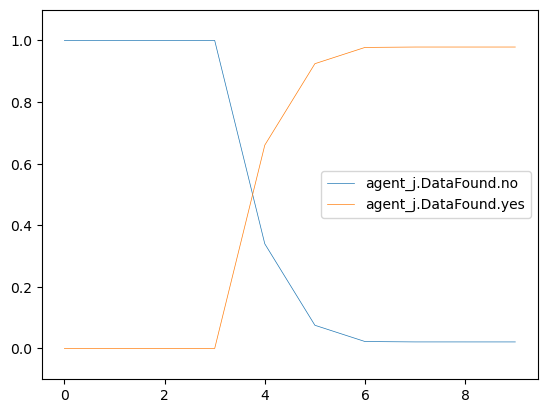

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes  agent_i.action agent_j.action
0                   1.0                    0.0       FileRecon            Nop
1                   1.0                    0.0    EnumAccounts   DecoyAccount
2                   0.0                    1.0      PrivEscAcc            Nop
3                   0.0                    1.0       FileRecon            Nop
4                   0.0                    1.0  ManipulateData            Nop
5                   0.0                    1.0            Exit            Nop
6                   0.0                    1.0             Nop            Nop
7                   0.0                    1.0             Nop            Nop
8                   0.0                    1.0             Nop            Nop
9                   0.0                    1.0             Nop            Nop

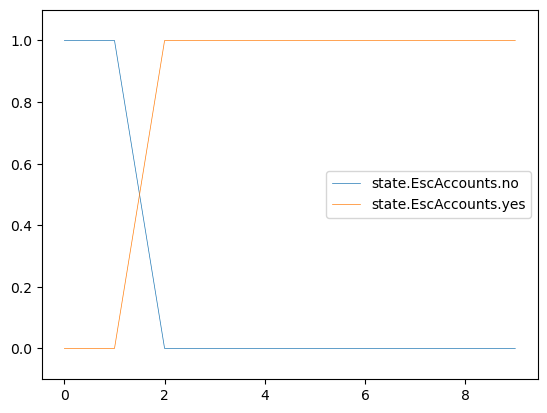

agent_i.EscAccounts.no  agent_i.EscAccounts.yes  agent_i.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.083333                 0.916667      PrivEscAcc   
3                0.000119                 0.999881       FileRecon   
4                0.000043                 0.999957  ManipulateData   
5                0.000025                 0.999975            Exit   
6                0.000025                 0.999975             Nop   
7                0.000025                 0.999975             Nop   
8                0.000025                 0.999975             Nop   
9                0.000025                 0.999975             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                         none   

  agent_i.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           success  
8                           failure  
9                           failure

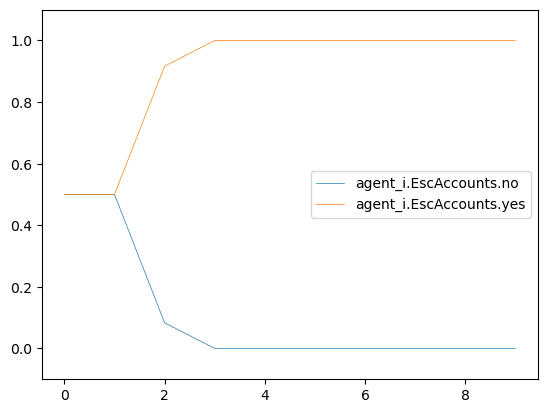

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                             none  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                   login_activity  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

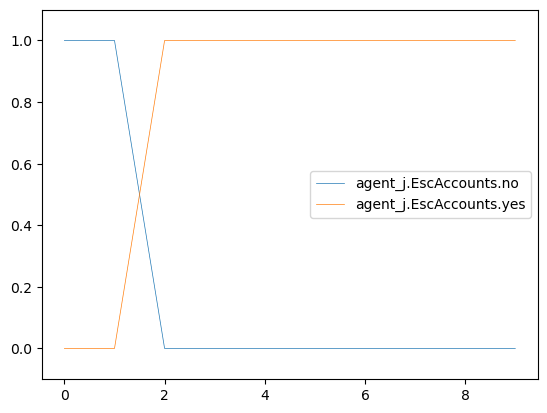

=============AccFound============


state.AccFound.no  state.AccFound.yes  agent_i.action agent_j.action
0                1.0                 0.0       FileRecon            Nop
1                1.0                 0.0    EnumAccounts   DecoyAccount
2                0.0                 1.0      PrivEscAcc            Nop
3                0.0                 1.0       FileRecon            Nop
4                0.0                 1.0  ManipulateData            Nop
5                0.0                 1.0            Exit            Nop
6                0.0                 1.0             Nop            Nop
7                0.0                 1.0             Nop            Nop
8                0.0                 1.0             Nop            Nop
9                0.0                 1.0             Nop            Nop

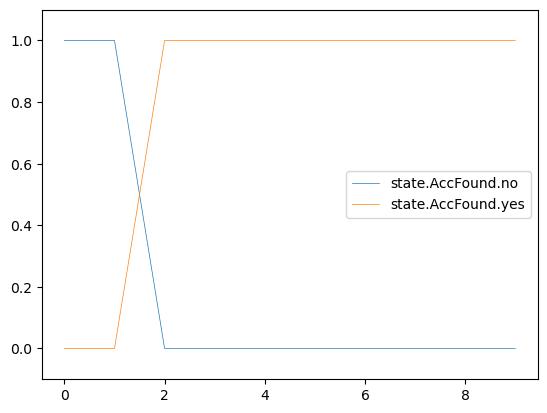

agent_i.AccFound.no  agent_i.AccFound.yes  agent_i.action agent_j.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000    EnumAccounts   DecoyAccount   
2             0.125000              0.875000      PrivEscAcc            Nop   
3             0.000179              0.999821       FileRecon            Nop   
4             0.000070              0.999930  ManipulateData            Nop   
5             0.000041              0.999959            Exit            Nop   
6             0.000041              0.999959             Nop            Nop   
7             0.000041              0.999959             Nop            Nop   
8             0.000041              0.999959             Nop            Nop   
9             0.000041              0.999959             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                   user_files                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           success  
4                         none                           success  
5                         none                           success  
6                         none                           failure  
7                         none                           success  
8                   user_files                           failure  
9                         none                           failure

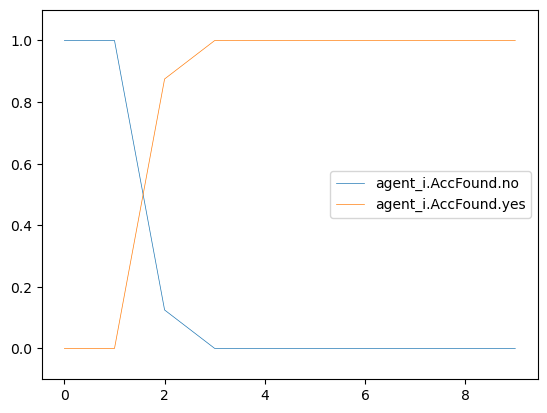

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action  agent_i.action  \
0             1.000000              0.000000            Nop       FileRecon   
1             1.000000              0.000000   DecoyAccount    EnumAccounts   
2             0.310937              0.689063            Nop      PrivEscAcc   
3             0.097425              0.902575            Nop       FileRecon   
4             0.054096              0.945904            Nop  ManipulateData   
5             0.017132              0.982868            Nop            Exit   
6             0.018896              0.981104            Nop             Nop   
7             0.018896              0.981105            Nop             Nop   
8             0.018921              0.981079            Nop             Nop   
9             0.018921              0.981079            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                             none  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                   login_activity  
7                             none  
8                             none  
9                             none

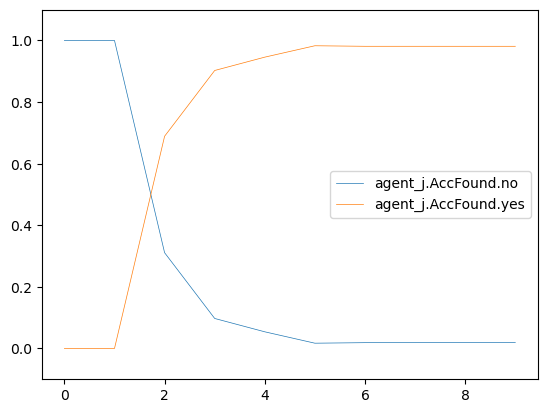

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes  agent_i.action agent_j.action
0                   0.0                    1.0       FileRecon            Nop
1                   0.0                    1.0    EnumAccounts   DecoyAccount
2                   0.0                    1.0      PrivEscAcc            Nop
3                   0.0                    1.0       FileRecon            Nop
4                   0.0                    1.0  ManipulateData            Nop
5                   0.0                    1.0            Exit            Nop
6                   0.0                    1.0             Nop            Nop
7                   0.0                    1.0             Nop            Nop
8                   0.0                    1.0             Nop            Nop
9                   0.0                    1.0             Nop            Nop

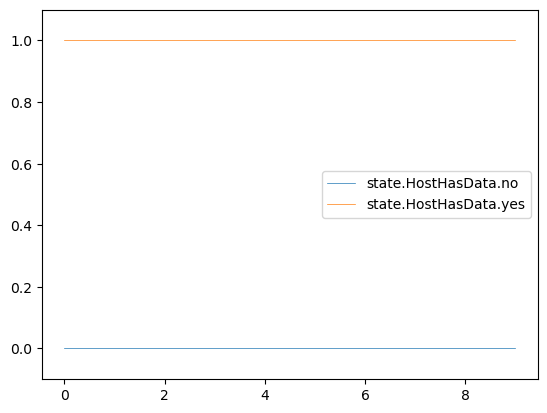

agent_i.HostHasData.no  agent_i.HostHasData.yes  agent_i.action  \
0                0.500000                 0.500000       FileRecon   
1                0.592105                 0.407895    EnumAccounts   
2                0.592105                 0.407895      PrivEscAcc   
3                0.592105                 0.407895       FileRecon   
4                0.177328                 0.822672  ManipulateData   
5                0.000225                 0.999775            Exit   
6                0.000225                 0.999775             Nop   
7                0.000225                 0.999775             Nop   
8                0.000225                 0.999775             Nop   
9                0.000225                 0.999775             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                         none   

  agent_i.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           success  
8                           failure  
9                           failure

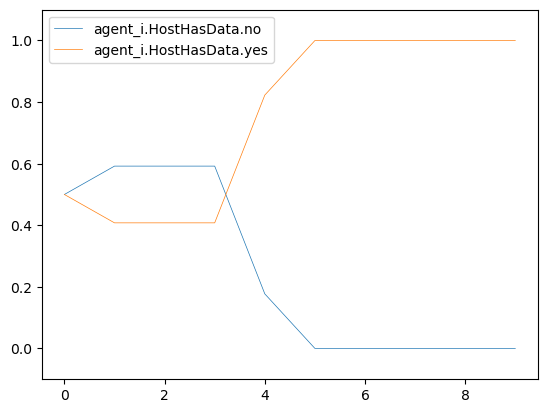

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                             none  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                   login_activity  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

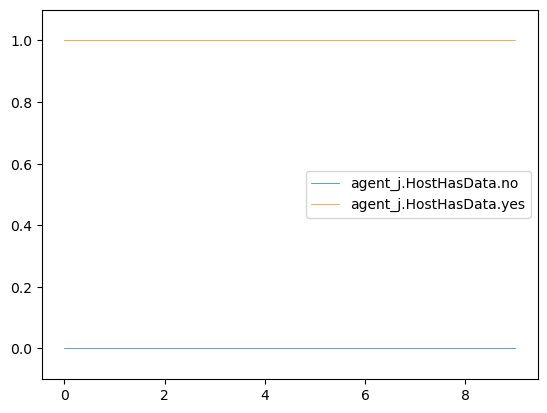

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes  agent_i.action  \
0                    1.0                     0.0       FileRecon   
1                    1.0                     0.0    EnumAccounts   
2                    1.0                     0.0      PrivEscAcc   
3                    1.0                     0.0       FileRecon   
4                    1.0                     0.0  ManipulateData   
5                    0.0                     1.0            Exit   
6                    0.0                     1.0             Nop   
7                    0.0                     1.0             Nop   
8                    0.0                     1.0             Nop   
9                    0.0                     1.0             Nop   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

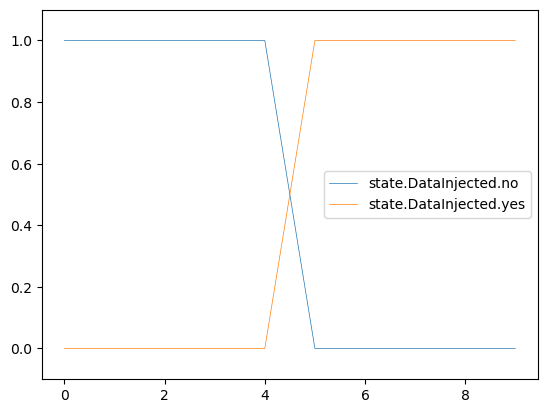

agent_i.DataInjected.no  agent_i.DataInjected.yes  agent_i.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.000269                  0.999731            Exit   
6                 0.000269                  0.999731             Nop   
7                 0.000269                  0.999731             Nop   
8                 0.000269                  0.999731             Nop   
9                 0.000269                  0.999731             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                         none   

  agent_i.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           success  
8                           failure  
9                           failure

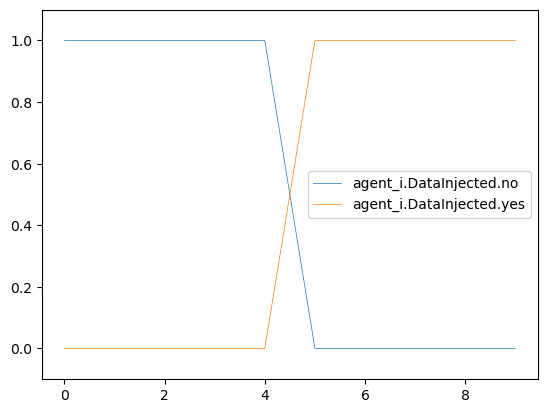

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000   DecoyAccount   
2                 1.000000                  0.000000            Nop   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 0.126646                  0.873354            Nop   
6                 0.029529                  0.970471            Nop   
7                 0.023243                  0.976757            Nop   
8                 0.021701                  0.978299            Nop   
9                 0.021701                  0.978299            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                             none  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                   login_activity  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

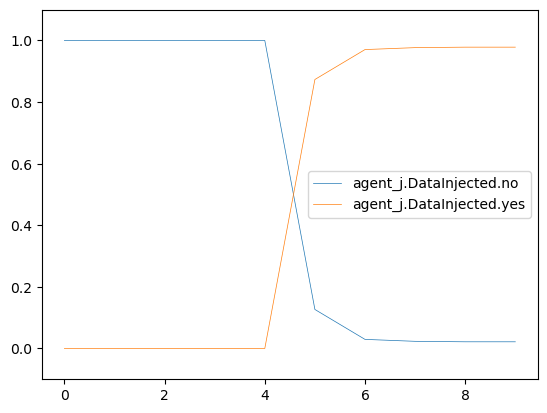

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user  agent_i.action  \
0                     0.0                     1.0       FileRecon   
1                     0.0                     1.0    EnumAccounts   
2                     0.0                     1.0      PrivEscAcc   
3                     1.0                     0.0       FileRecon   
4                     1.0                     0.0  ManipulateData   
5                     1.0                     0.0            Exit   
6                     1.0                     0.0             Nop   
7                     1.0                     0.0             Nop   
8                     1.0                     0.0             Nop   
9                     1.0                     0.0             Nop   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

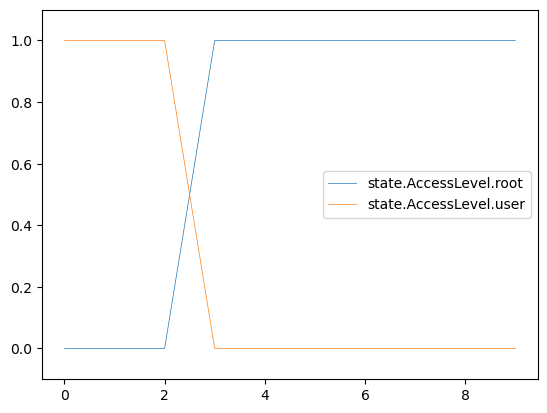

agent_i.AccessLevel.root  agent_i.AccessLevel.user  agent_i.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.999571                  0.000429       FileRecon   
4                  0.999867                  0.000133  ManipulateData   
5                  0.999923                  0.000077            Exit   
6                  0.999923                  0.000077             Nop   
7                  0.999923                  0.000077             Nop   
8                  0.999923                  0.000077             Nop   
9                  0.999923                  0.000077             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                         none   

  agent_i.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           success  
8                           failure  
9                           failure

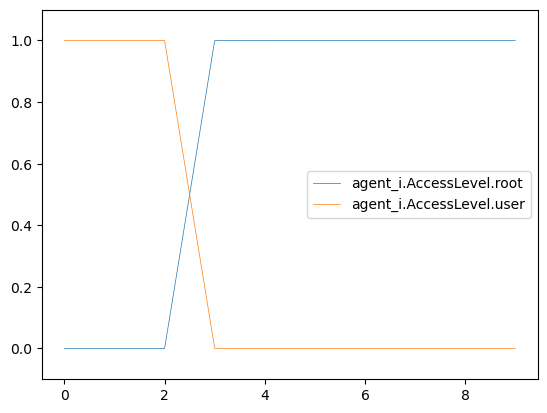

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000   DecoyAccount   
2                  0.000000                  1.000000            Nop   
3                  0.886277                  0.113723            Nop   
4                  0.943528                  0.056472            Nop   
5                  0.982340                  0.017660            Nop   
6                  0.980521                  0.019479            Nop   
7                  0.980521                  0.019479            Nop   
8                  0.980494                  0.019506            Nop   
9                  0.980494                  0.019506            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                             none  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                   login_activity  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

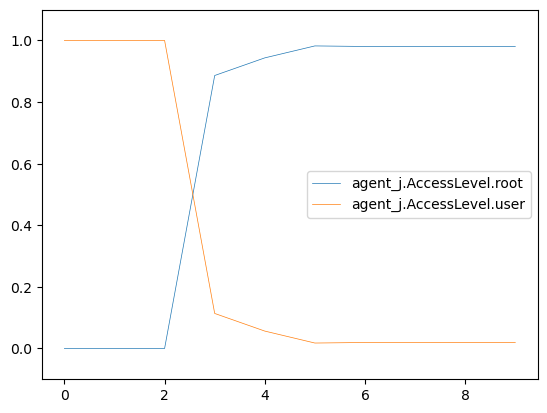

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot  agent_i.action agent_j.action  
0                      1.0       FileRecon            Nop  
1                      1.0    EnumAccounts   DecoyAccount  
2                      1.0      PrivEscAcc            Nop  
3                      1.0       FileRecon            Nop  
4                      1.0  ManipulateData            Nop  
5                      1.0            Exit            Nop  
6                      1.0             Nop            Nop  
7                      1.0             Nop            Nop  
8                      1.0             Nop            Nop  
9                      1.0             Nop            Nop

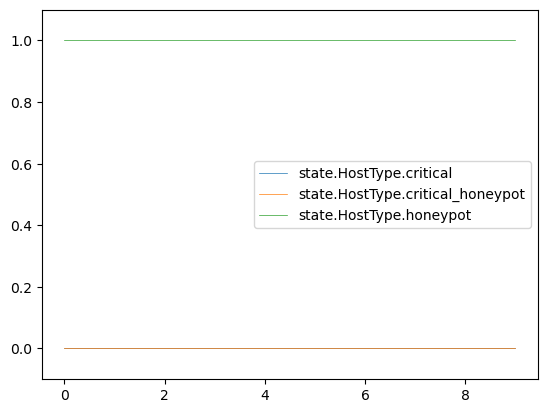

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.700000                                 0.0   
2                   0.422222                                 0.0   
3                   0.250246                                 0.0   
4                   0.125072                                 0.0   
5                   0.125042                                 0.0   
6                   0.125042                                 0.0   
7                   0.125042                                 0.0   
8                   0.125042                                 0.0   
9                   0.125042                                 0.0   

   agent_i.HostType.honeypot  agent_i.action agent_j.action  \
0                   0.500000       FileRecon            Nop   
1                   0.300000    EnumAccounts   DecoyAccount   
2                   0.577778      PrivEscAcc            Nop   
3                   0.749754       FileRecon            Nop   
4                   0.874928  ManipulateData            Nop   
5                   0.874958            Exit            Nop   
6                   0.874958             Nop            Nop   
7                   0.874958             Nop            Nop   
8                   0.874958             Nop            Nop   
9                   0.874958             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                   user_files                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           success  
4                         none                           success  
5                         none                           success  
6                         none                           failure  
7                         none                           success  
8                   user_files                           failure  
9                         none                           failure

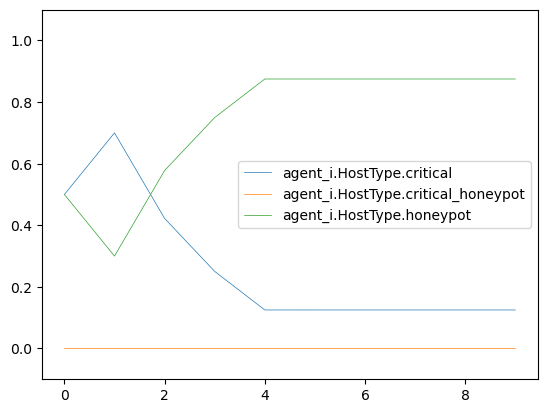

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot agent_j.action  agent_i.action  \
0                        1.0            Nop       FileRecon   
1                        1.0   DecoyAccount    EnumAccounts   
2                        1.0            Nop      PrivEscAcc   
3                        1.0            Nop       FileRecon   
4                        1.0            Nop  ManipulateData   
5                        1.0            Nop            Exit   
6                        1.0            Nop             Nop   
7                        1.0            Nop             Nop   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                             none  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                   login_activity  
7                             none  
8                             none  
9                             none

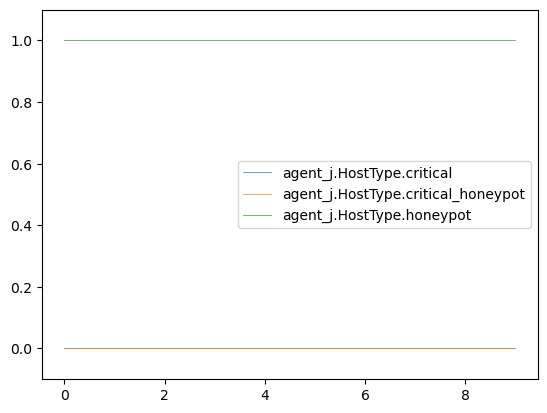

=============AttActive============


state.AttActive.no  state.AttActive.yes  agent_i.action agent_j.action
0                 0.0                  1.0       FileRecon            Nop
1                 0.0                  1.0    EnumAccounts   DecoyAccount
2                 0.0                  1.0      PrivEscAcc            Nop
3                 0.0                  1.0       FileRecon            Nop
4                 0.0                  1.0  ManipulateData            Nop
5                 0.0                  1.0            Exit            Nop
6                 1.0                  0.0             Nop            Nop
7                 1.0                  0.0             Nop            Nop
8                 1.0                  0.0             Nop            Nop
9                 1.0                  0.0             Nop            Nop

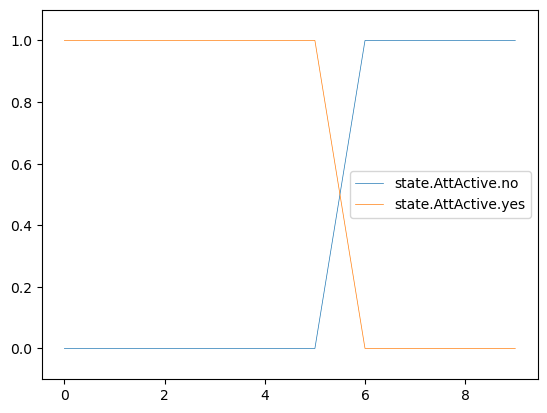

agent_i.AttActive.no  agent_i.AttActive.yes  agent_i.action agent_j.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0    EnumAccounts   DecoyAccount   
2                   0.0                    1.0      PrivEscAcc            Nop   
3                   0.0                    1.0       FileRecon            Nop   
4                   0.0                    1.0  ManipulateData            Nop   
5                   0.0                    1.0            Exit            Nop   
6                   1.0                    0.0             Nop            Nop   
7                   1.0                    0.0             Nop            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                   user_files                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           success  
4                         none                           success  
5                         none                           success  
6                         none                           failure  
7                         none                           success  
8                   user_files                           failure  
9                         none                           failure

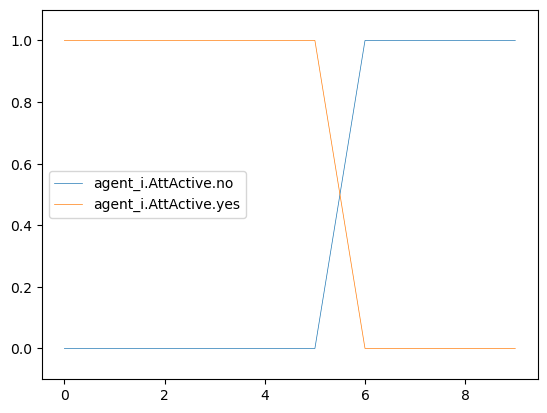

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action  agent_i.action  \
0              0.000000           1.000000e+00            Nop       FileRecon   
1              0.000000           1.000000e+00   DecoyAccount    EnumAccounts   
2              0.000000           1.000000e+00            Nop      PrivEscAcc   
3              0.000003           9.999968e-01            Nop       FileRecon   
4              0.009350           9.906499e-01            Nop  ManipulateData   
5              0.010945           9.890546e-01            Nop            Exit   
6              0.982698           1.730195e-02            Nop             Nop   
7              0.991085           8.915540e-03            Nop             Nop   
8              0.999772           2.277566e-04            Nop             Nop   
9              1.000000           1.503221e-09            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                             none  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                   login_activity  
7                             none  
8                             none  
9                             none

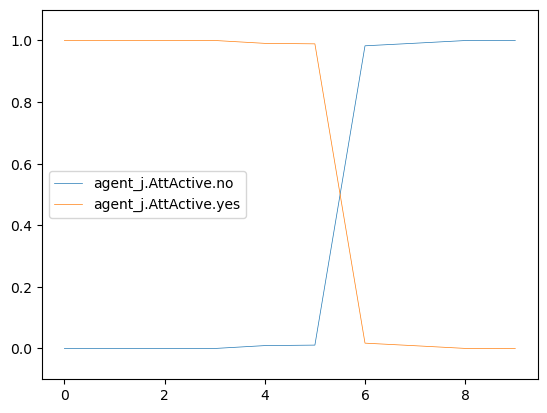

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user  agent_i.action agent_j.action
0                   1.0                   0.0       FileRecon            Nop
1                   1.0                   0.0    EnumAccounts   DecoyAccount
2                   1.0                   0.0      PrivEscAcc            Nop
3                   1.0                   0.0       FileRecon            Nop
4                   1.0                   0.0  ManipulateData            Nop
5                   1.0                   0.0            Exit            Nop
6                   1.0                   0.0             Nop            Nop
7                   1.0                   0.0             Nop            Nop
8                   1.0                   0.0             Nop            Nop
9                   1.0                   0.0             Nop            Nop

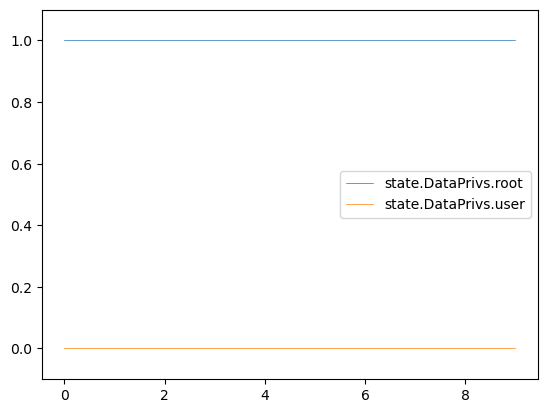

agent_i.DataPrivs.root  agent_i.DataPrivs.user  agent_i.action  \
0                0.500000                0.500000       FileRecon   
1                0.592105                0.407895    EnumAccounts   
2                0.592105                0.407895      PrivEscAcc   
3                0.592105                0.407895       FileRecon   
4                0.673716                0.326284  ManipulateData   
5                0.708562                0.291438            Exit   
6                0.708562                0.291438             Nop   
7                0.708562                0.291438             Nop   
8                0.708562                0.291438             Nop   
9                0.708562                0.291438             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                         none   

  agent_i.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           success  
8                           failure  
9                           failure

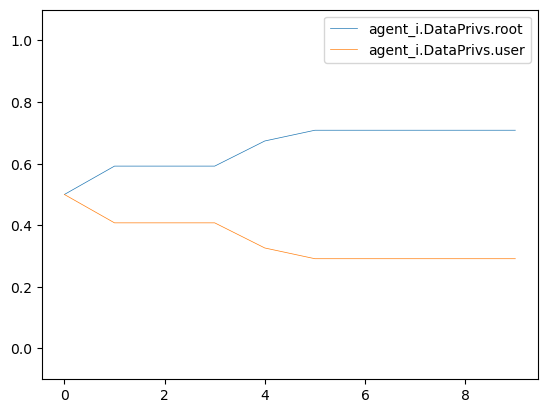

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                             none  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                   login_activity  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

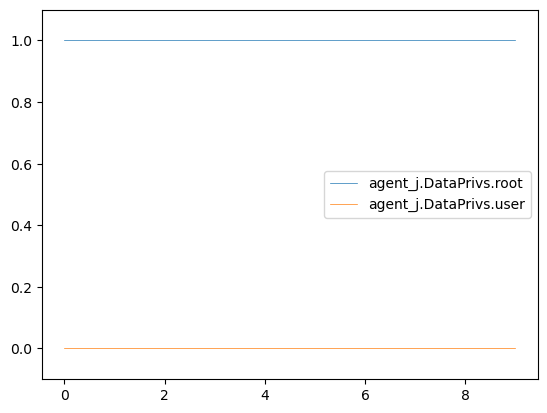

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.618685                        0.381315   
3                         0.628194                        0.371806   
4                         0.583364                        0.416636   
5                         0.628189                        0.371811   
6                         0.649595                        0.350405   
7                         0.649615                        0.350385   
8                         0.649615                        0.350385   
9                         0.649615                        0.350385   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                   user_files                           failure  
4                         none                           failure  
5                         none                           success  
6                   user_files                           success  
7                   user_files                           success  
8                   user_files                           failure  
9                   user_files                           failure

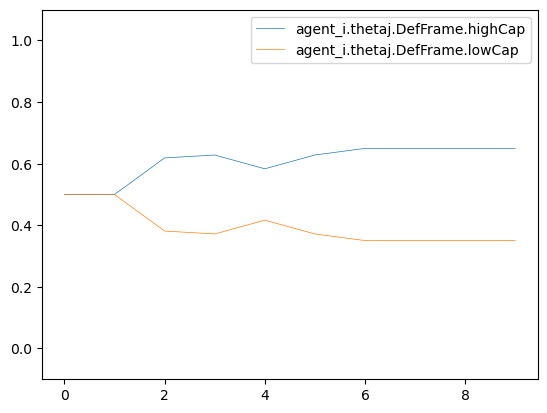

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'
0                               1.0                             none
1                               1.0                        file_enum
2                               1.0                   login_activity
3                               1.0                        file_enum
4                               1.0                        file_enum
5                               1.0                        file_enum
6                               1.0                   login_activity
7                               1.0                             none
8                               1.0                             none
9                               1.0                        file_enum

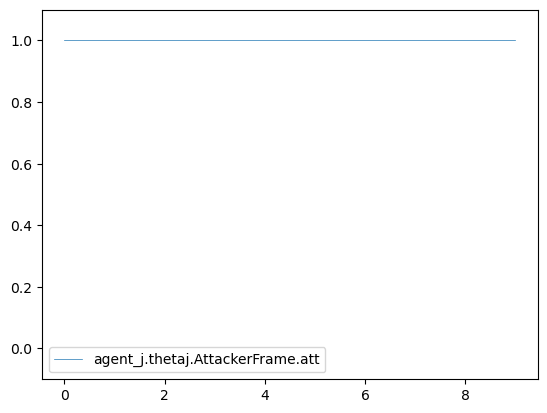

=============DataFound============


state.DataFound.no  state.DataFound.yes  agent_i.action agent_j.action
0                 1.0                  0.0       FileRecon            Nop
1                 1.0                  0.0    EnumAccounts   DecoyAccount
2                 1.0                  0.0      PrivEscAcc            Nop
3                 1.0                  0.0       FileRecon            Nop
4                 1.0                  0.0       FileRecon            Nop
5                 1.0                  0.0       FileRecon            Nop
6                 0.0                  1.0  ManipulateData            Nop
7                 0.0                  1.0            Exit            Nop
8                 0.0                  1.0             Nop            Nop
9                 0.0                  1.0             Nop            Nop

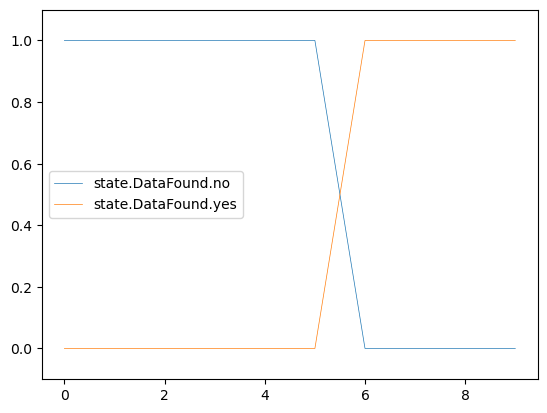

agent_i.DataFound.no  agent_i.DataFound.yes  agent_i.action agent_j.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.976974               0.023026    EnumAccounts   DecoyAccount   
2              0.976974               0.023026      PrivEscAcc            Nop   
3              0.976974               0.023026       FileRecon            Nop   
4              0.956106               0.043894       FileRecon            Nop   
5              0.980311               0.019689       FileRecon            Nop   
6              0.645087               0.354913  ManipulateData            Nop   
7              0.001816               0.998184            Exit            Nop   
8              0.001816               0.998184             Nop            Nop   
9              0.001816               0.998184             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                   user_files                           failure  
4                         none                           failure  
5                         none                           success  
6                   user_files                           success  
7                   user_files                           success  
8                   user_files                           failure  
9                   user_files                           failure

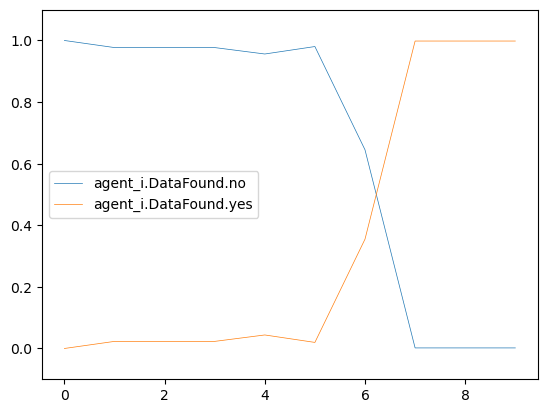

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action  agent_i.action  \
0              1.000000               0.000000            Nop       FileRecon   
1              1.000000               0.000000   DecoyAccount    EnumAccounts   
2              1.000000               0.000000            Nop      PrivEscAcc   
3              1.000000               0.000000            Nop       FileRecon   
4              0.339744               0.660256            Nop       FileRecon   
5              0.212100               0.787900            Nop       FileRecon   
6              0.168599               0.831401            Nop  ManipulateData   
7              0.163156               0.836844            Nop            Exit   
8              0.163939               0.836061            Nop             Nop   
9              0.163939               0.836061            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                             none  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                        file_enum  
5                        file_enum  
6                   login_activity  
7                             none  
8                             none  
9                        file_enum

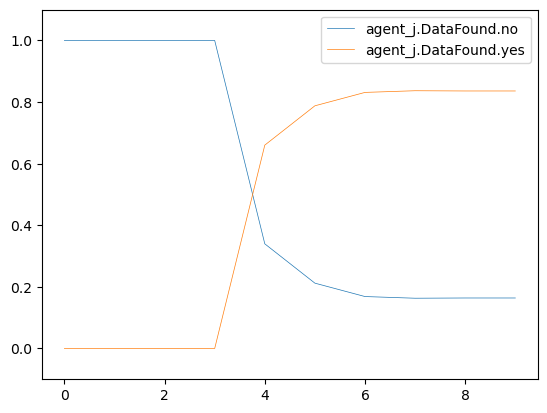

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes  agent_i.action agent_j.action
0                   1.0                    0.0       FileRecon            Nop
1                   1.0                    0.0    EnumAccounts   DecoyAccount
2                   0.0                    1.0      PrivEscAcc            Nop
3                   0.0                    1.0       FileRecon            Nop
4                   0.0                    1.0       FileRecon            Nop
5                   0.0                    1.0       FileRecon            Nop
6                   0.0                    1.0  ManipulateData            Nop
7                   0.0                    1.0            Exit            Nop
8                   0.0                    1.0             Nop            Nop
9                   0.0                    1.0             Nop            Nop

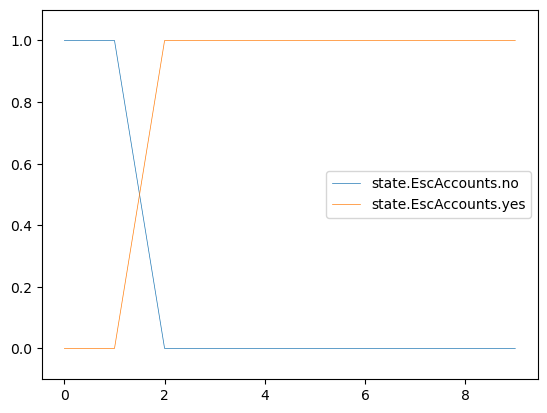

agent_i.EscAccounts.no  agent_i.EscAccounts.yes  agent_i.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.057958                 0.942042      PrivEscAcc   
3                0.000068                 0.999932       FileRecon   
4                0.000107                 0.999892       FileRecon   
5                0.000096                 0.999904       FileRecon   
6                0.000062                 0.999938  ManipulateData   
7                0.000014                 0.999986            Exit   
8                0.000014                 0.999986             Nop   
9                0.000014                 0.999986             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_i.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           failure  
4                           failure  
5                           success  
6                           success  
7                           success  
8                           failure  
9                           failure

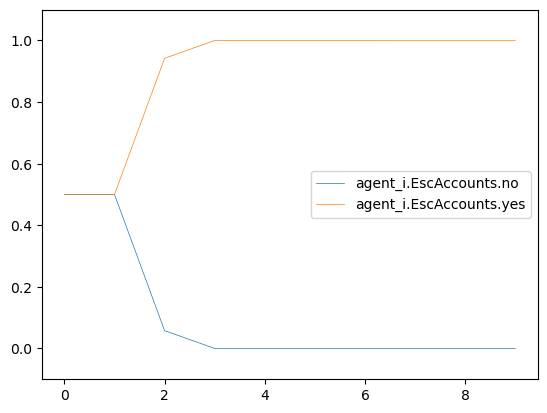

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                             none  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                   login_activity  
7            Exit                             none  
8             Nop                             none  
9             Nop                        file_enum

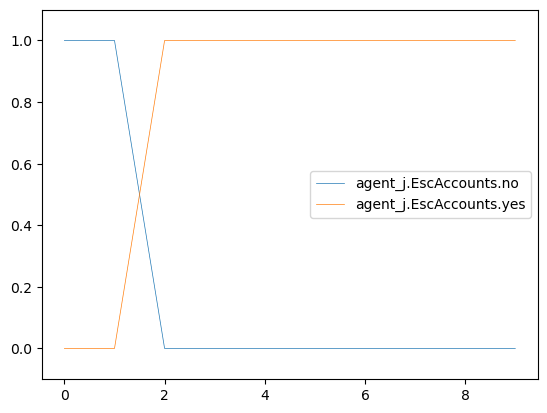

=============AccFound============


state.AccFound.no  state.AccFound.yes  agent_i.action agent_j.action
0                1.0                 0.0       FileRecon            Nop
1                1.0                 0.0    EnumAccounts   DecoyAccount
2                0.0                 1.0      PrivEscAcc            Nop
3                0.0                 1.0       FileRecon            Nop
4                0.0                 1.0       FileRecon            Nop
5                0.0                 1.0       FileRecon            Nop
6                0.0                 1.0  ManipulateData            Nop
7                0.0                 1.0            Exit            Nop
8                0.0                 1.0             Nop            Nop
9                0.0                 1.0             Nop            Nop

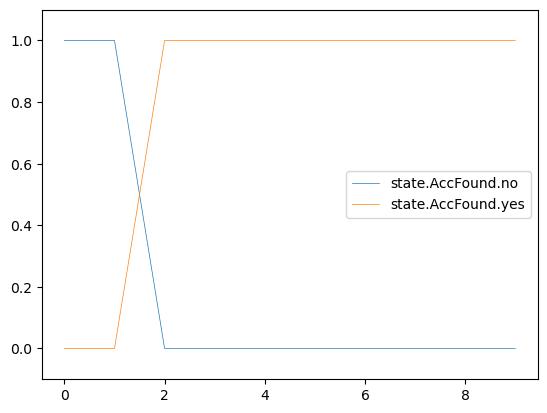

agent_i.AccFound.no  agent_i.AccFound.yes  agent_i.action agent_j.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000    EnumAccounts   DecoyAccount   
2             0.100779              0.899222      PrivEscAcc            Nop   
3             0.000119              0.999881       FileRecon            Nop   
4             0.000174              0.999826       FileRecon            Nop   
5             0.000167              0.999833       FileRecon            Nop   
6             0.000113              0.999887  ManipulateData            Nop   
7             0.000026              0.999974            Exit            Nop   
8             0.000026              0.999974             Nop            Nop   
9             0.000026              0.999974             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                   user_files                           failure  
4                         none                           failure  
5                         none                           success  
6                   user_files                           success  
7                   user_files                           success  
8                   user_files                           failure  
9                   user_files                           failure

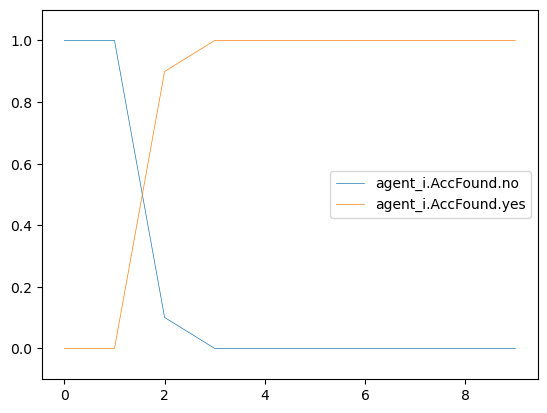

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action  agent_i.action  \
0             1.000000              0.000000            Nop       FileRecon   
1             1.000000              0.000000   DecoyAccount    EnumAccounts   
2             0.310937              0.689063            Nop      PrivEscAcc   
3             0.097425              0.902575            Nop       FileRecon   
4             0.054096              0.945904            Nop       FileRecon   
5             0.018611              0.981389            Nop       FileRecon   
6             0.007982              0.992018            Nop  ManipulateData   
7             0.007982              0.992018            Nop            Exit   
8             0.008030              0.991970            Nop             Nop   
9             0.008030              0.991970            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                             none  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                        file_enum  
5                        file_enum  
6                   login_activity  
7                             none  
8                             none  
9                        file_enum

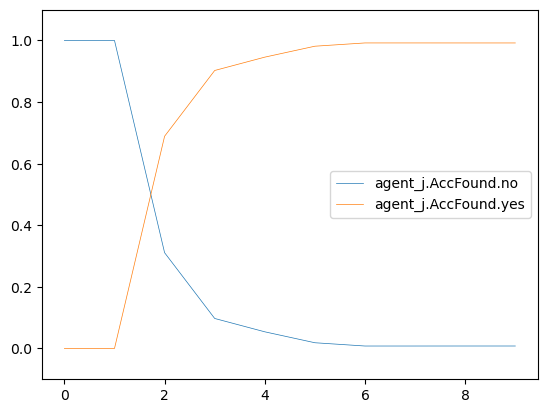

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes  agent_i.action agent_j.action
0                   0.0                    1.0       FileRecon            Nop
1                   0.0                    1.0    EnumAccounts   DecoyAccount
2                   0.0                    1.0      PrivEscAcc            Nop
3                   0.0                    1.0       FileRecon            Nop
4                   0.0                    1.0       FileRecon            Nop
5                   0.0                    1.0       FileRecon            Nop
6                   0.0                    1.0  ManipulateData            Nop
7                   0.0                    1.0            Exit            Nop
8                   0.0                    1.0             Nop            Nop
9                   0.0                    1.0             Nop            Nop

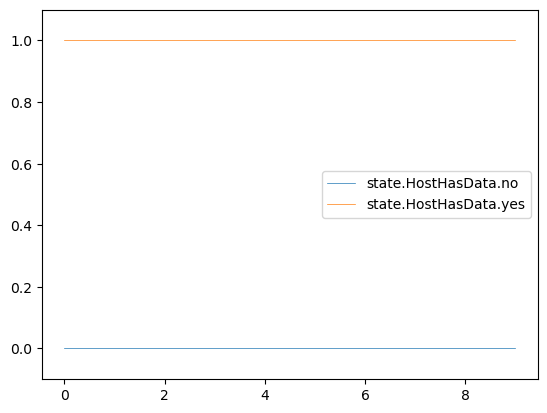

agent_i.HostHasData.no  agent_i.HostHasData.yes  agent_i.action  \
0                0.500000                 0.500000       FileRecon   
1                0.592105                 0.407895    EnumAccounts   
2                0.592105                 0.407895      PrivEscAcc   
3                0.592105                 0.407895       FileRecon   
4                0.800026                 0.199974       FileRecon   
5                0.926062                 0.073938       FileRecon   
6                0.633921                 0.366079  ManipulateData   
7                0.001785                 0.998215            Exit   
8                0.001785                 0.998215             Nop   
9                0.001785                 0.998215             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_i.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           failure  
4                           failure  
5                           success  
6                           success  
7                           success  
8                           failure  
9                           failure

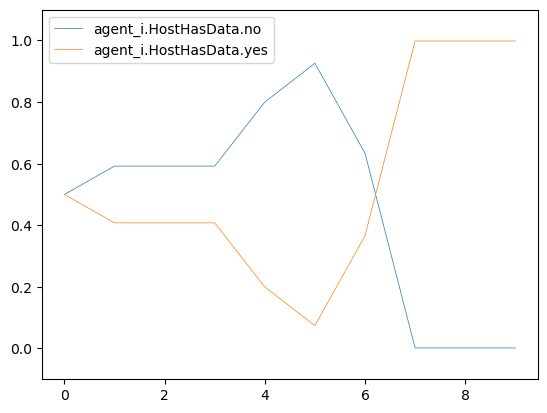

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                             none  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                   login_activity  
7            Exit                             none  
8             Nop                             none  
9             Nop                        file_enum

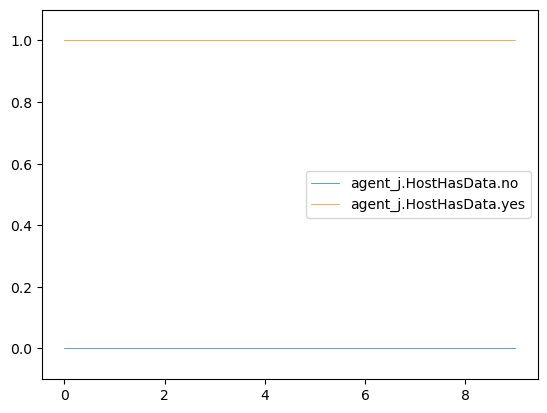

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes  agent_i.action  \
0                    1.0                     0.0       FileRecon   
1                    1.0                     0.0    EnumAccounts   
2                    1.0                     0.0      PrivEscAcc   
3                    1.0                     0.0       FileRecon   
4                    1.0                     0.0       FileRecon   
5                    1.0                     0.0       FileRecon   
6                    1.0                     0.0  ManipulateData   
7                    0.0                     1.0            Exit   
8                    0.0                     1.0             Nop   
9                    0.0                     1.0             Nop   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

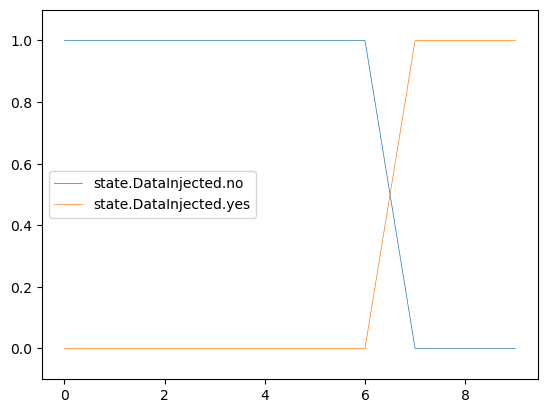

agent_i.DataInjected.no  agent_i.DataInjected.yes  agent_i.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000       FileRecon   
5                 1.000000                  0.000000       FileRecon   
6                 1.000000                  0.000000  ManipulateData   
7                 0.001816                  0.998184            Exit   
8                 0.001816                  0.998184             Nop   
9                 0.001816                  0.998184             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_i.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           failure  
4                           failure  
5                           success  
6                           success  
7                           success  
8                           failure  
9                           failure

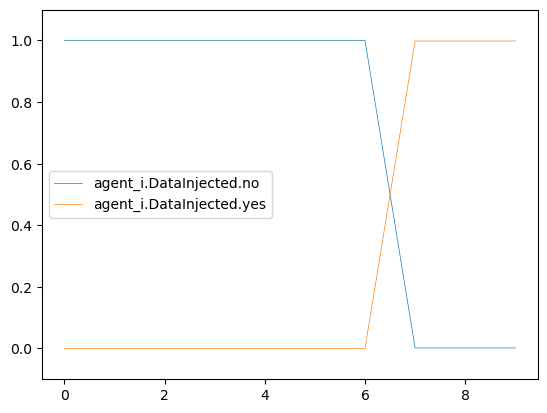

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000   DecoyAccount   
2                 1.000000                  0.000000            Nop   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 0.796803                  0.203197            Nop   
6                 0.695347                  0.304653            Nop   
7                 0.221282                  0.778718            Nop   
8                 0.215652                  0.784348            Nop   
9                 0.215652                  0.784348            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                             none  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                   login_activity  
7            Exit                             none  
8             Nop                             none  
9             Nop                        file_enum

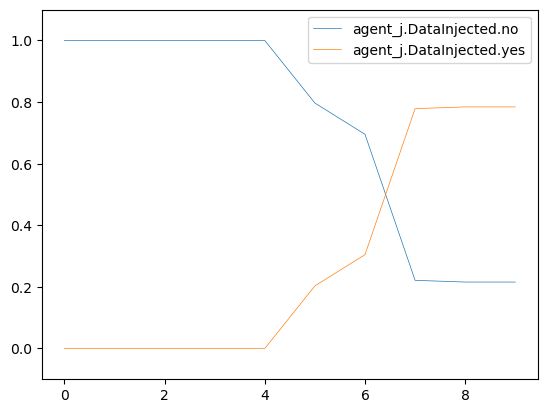

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user  agent_i.action  \
0                     0.0                     1.0       FileRecon   
1                     0.0                     1.0    EnumAccounts   
2                     0.0                     1.0      PrivEscAcc   
3                     1.0                     0.0       FileRecon   
4                     1.0                     0.0       FileRecon   
5                     1.0                     0.0       FileRecon   
6                     1.0                     0.0  ManipulateData   
7                     1.0                     0.0            Exit   
8                     1.0                     0.0             Nop   
9                     1.0                     0.0             Nop   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

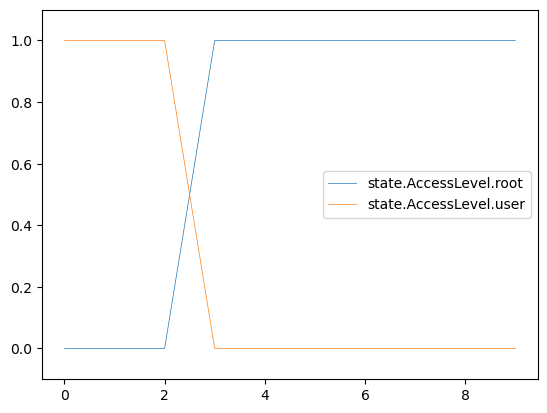

agent_i.AccessLevel.root  agent_i.AccessLevel.user  agent_i.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.999824                  0.000176       FileRecon   
4                  0.999669                  0.000331       FileRecon   
5                  0.999752                  0.000248       FileRecon   
6                  0.999861                  0.000139  ManipulateData   
7                  0.999968                  0.000032            Exit   
8                  0.999968                  0.000032             Nop   
9                  0.999968                  0.000032             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_i.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           failure  
4                           failure  
5                           success  
6                           success  
7                           success  
8                           failure  
9                           failure

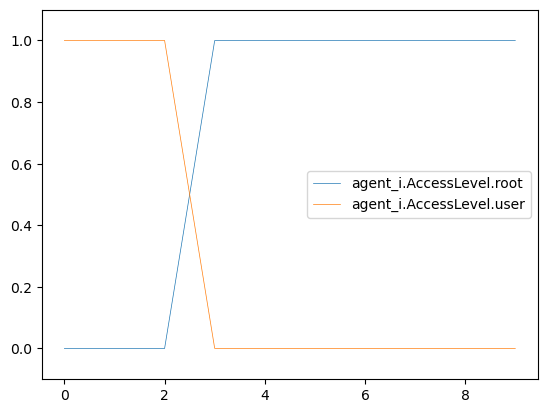

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000   DecoyAccount   
2                  0.000000                  1.000000            Nop   
3                  0.886277                  0.113723            Nop   
4                  0.943528                  0.056472            Nop   
5                  0.980577                  0.019423            Nop   
6                  0.991679                  0.008321            Nop   
7                  0.991679                  0.008321            Nop   
8                  0.991629                  0.008371            Nop   
9                  0.991629                  0.008371            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                             none  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                   login_activity  
7            Exit                             none  
8             Nop                             none  
9             Nop                        file_enum

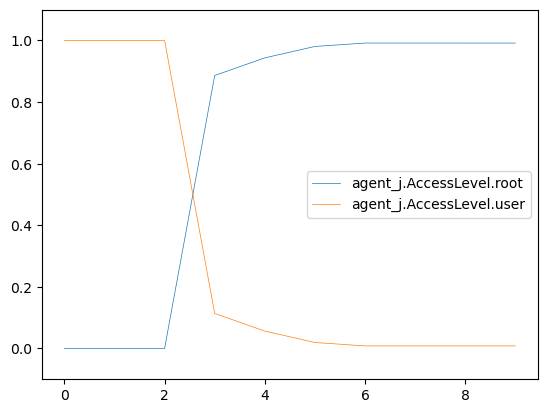

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot  agent_i.action agent_j.action  
0                      1.0       FileRecon            Nop  
1                      1.0    EnumAccounts   DecoyAccount  
2                      1.0      PrivEscAcc            Nop  
3                      1.0       FileRecon            Nop  
4                      1.0       FileRecon            Nop  
5                      1.0       FileRecon            Nop  
6                      1.0  ManipulateData            Nop  
7                      1.0            Exit            Nop  
8                      1.0             Nop            Nop  
9                      1.0             Nop            Nop

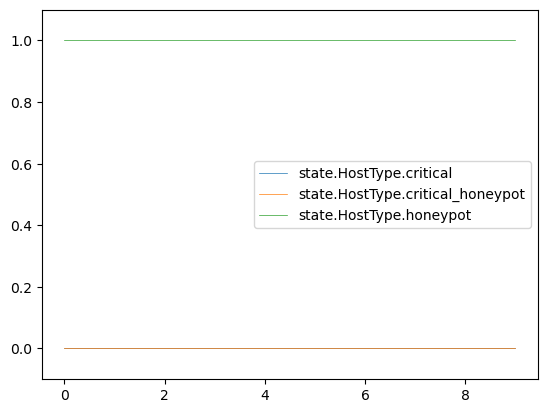

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.300000                                 0.0   
2                   0.118339                                 0.0   
3                   0.057764                                 0.0   
4                   0.125179                                 0.0   
5                   0.057793                                 0.0   
6                   0.025602                                 0.0   
7                   0.025576                                 0.0   
8                   0.025576                                 0.0   
9                   0.025576                                 0.0   

   agent_i.HostType.honeypot  agent_i.action agent_j.action  \
0                   0.500000       FileRecon            Nop   
1                   0.700000    EnumAccounts   DecoyAccount   
2                   0.881661      PrivEscAcc            Nop   
3                   0.942236       FileRecon            Nop   
4                   0.874821       FileRecon            Nop   
5                   0.942207       FileRecon            Nop   
6                   0.974398  ManipulateData            Nop   
7                   0.974424            Exit            Nop   
8                   0.974424             Nop            Nop   
9                   0.974424             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                   user_files                           failure  
4                         none                           failure  
5                         none                           success  
6                   user_files                           success  
7                   user_files                           success  
8                   user_files                           failure  
9                   user_files                           failure

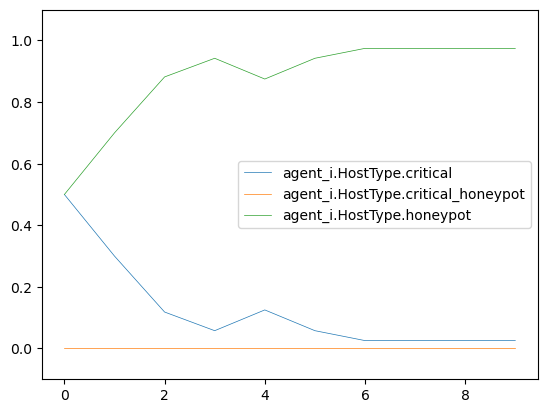

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot agent_j.action  agent_i.action  \
0                        1.0            Nop       FileRecon   
1                        1.0   DecoyAccount    EnumAccounts   
2                        1.0            Nop      PrivEscAcc   
3                        1.0            Nop       FileRecon   
4                        1.0            Nop       FileRecon   
5                        1.0            Nop       FileRecon   
6                        1.0            Nop  ManipulateData   
7                        1.0            Nop            Exit   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                             none  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                        file_enum  
5                        file_enum  
6                   login_activity  
7                             none  
8                             none  
9                        file_enum

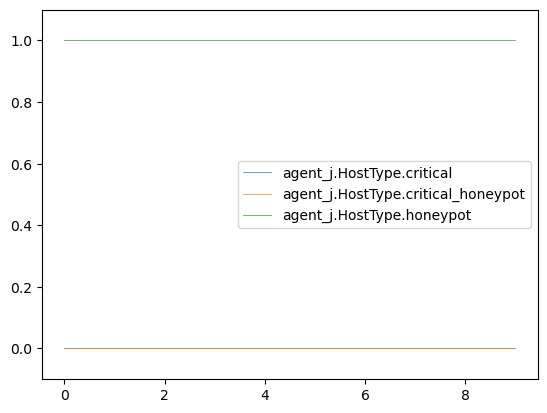

=============AttActive============


state.AttActive.no  state.AttActive.yes  agent_i.action agent_j.action
0                 0.0                  1.0       FileRecon            Nop
1                 0.0                  1.0    EnumAccounts   DecoyAccount
2                 0.0                  1.0      PrivEscAcc            Nop
3                 0.0                  1.0       FileRecon            Nop
4                 0.0                  1.0       FileRecon            Nop
5                 0.0                  1.0       FileRecon            Nop
6                 0.0                  1.0  ManipulateData            Nop
7                 0.0                  1.0            Exit            Nop
8                 1.0                  0.0             Nop            Nop
9                 1.0                  0.0             Nop            Nop

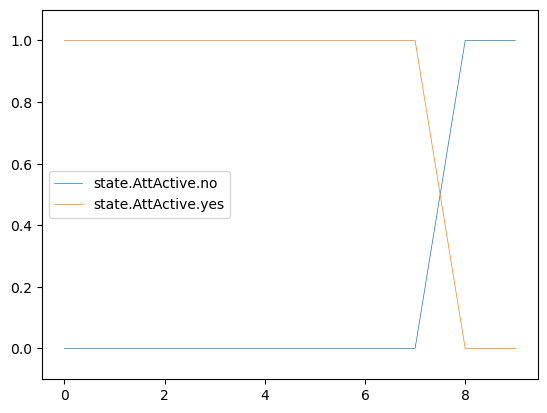

agent_i.AttActive.no  agent_i.AttActive.yes  agent_i.action agent_j.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0    EnumAccounts   DecoyAccount   
2                   0.0                    1.0      PrivEscAcc            Nop   
3                   0.0                    1.0       FileRecon            Nop   
4                   0.0                    1.0       FileRecon            Nop   
5                   0.0                    1.0       FileRecon            Nop   
6                   0.0                    1.0  ManipulateData            Nop   
7                   0.0                    1.0            Exit            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                   user_files                           failure  
4                         none                           failure  
5                         none                           success  
6                   user_files                           success  
7                   user_files                           success  
8                   user_files                           failure  
9                   user_files                           failure

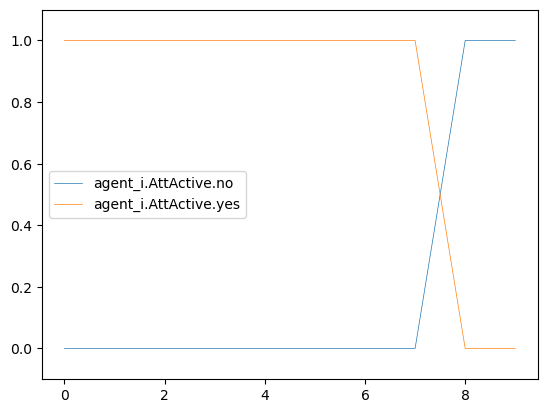

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action  agent_i.action  \
0              0.000000           1.000000e+00            Nop       FileRecon   
1              0.000000           1.000000e+00   DecoyAccount    EnumAccounts   
2              0.000000           1.000000e+00            Nop      PrivEscAcc   
3              0.000003           9.999968e-01            Nop       FileRecon   
4              0.009350           9.906499e-01            Nop       FileRecon   
5              0.017826           9.821739e-01            Nop       FileRecon   
6              0.092754           9.072463e-01            Nop  ManipulateData   
7              0.500249           4.997513e-01            Nop            Exit   
8              0.998992           1.008019e-03            Nop             Nop   
9              1.000000           4.552850e-08            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                             none  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                        file_enum  
5                        file_enum  
6                   login_activity  
7                             none  
8                             none  
9                        file_enum

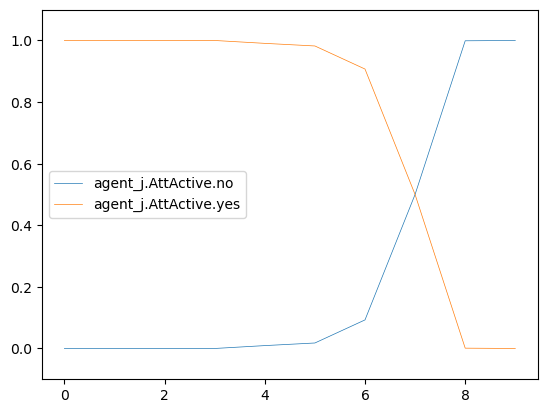

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user  agent_i.action agent_j.action
0                   1.0                   0.0       FileRecon            Nop
1                   1.0                   0.0    EnumAccounts   DecoyAccount
2                   1.0                   0.0      PrivEscAcc            Nop
3                   1.0                   0.0       FileRecon            Nop
4                   1.0                   0.0       FileRecon            Nop
5                   1.0                   0.0       FileRecon            Nop
6                   1.0                   0.0  ManipulateData            Nop
7                   1.0                   0.0            Exit            Nop
8                   1.0                   0.0             Nop            Nop
9                   1.0                   0.0             Nop            Nop

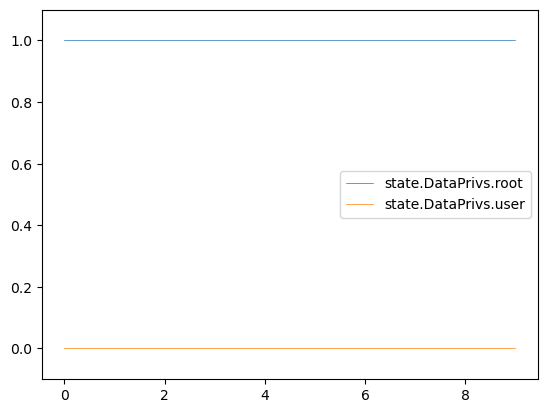

agent_i.DataPrivs.root  agent_i.DataPrivs.user  agent_i.action  \
0                0.500000                0.500000       FileRecon   
1                0.592105                0.407895    EnumAccounts   
2                0.592105                0.407895      PrivEscAcc   
3                0.592105                0.407895       FileRecon   
4                0.551195                0.448805       FileRecon   
5                0.519581                0.480419       FileRecon   
6                0.596454                0.403546  ManipulateData   
7                0.762801                0.237199            Exit   
8                0.762801                0.237199             Nop   
9                0.762801                0.237199             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_i.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           failure  
4                           failure  
5                           success  
6                           success  
7                           success  
8                           failure  
9                           failure

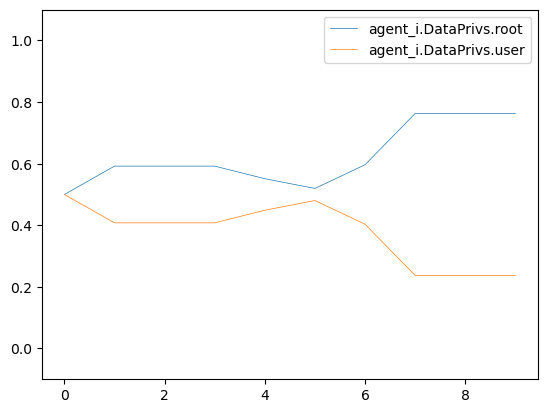

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                             none  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                   login_activity  
7            Exit                             none  
8             Nop                             none  
9             Nop                        file_enum

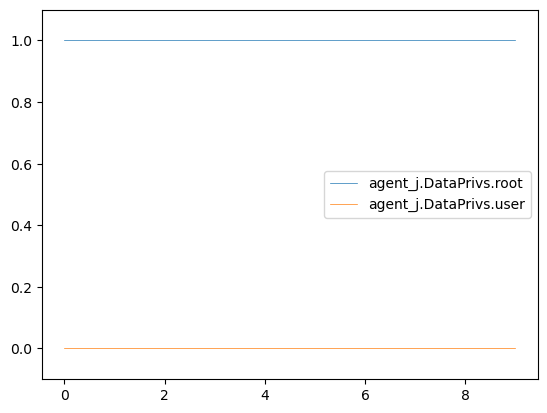

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.500000                        0.500000   
3                         0.436364                        0.563636   
4                         0.532045                        0.467955   
5                         0.565174                        0.434826   
6                         0.599971                        0.400029   
7                         0.599920                        0.400080   
8                         0.565156                        0.434845   
9                         0.535962                        0.464038   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                         none                           success  
1                   user_files                           failure  
2                   user_files                           failure  
3                   user_files                           success  
4                         none                           success  
5                         none                           success  
6                         none                           failure  
7                   user_files                           failure  
8                   user_files                           failure  
9                   user_files                           failure

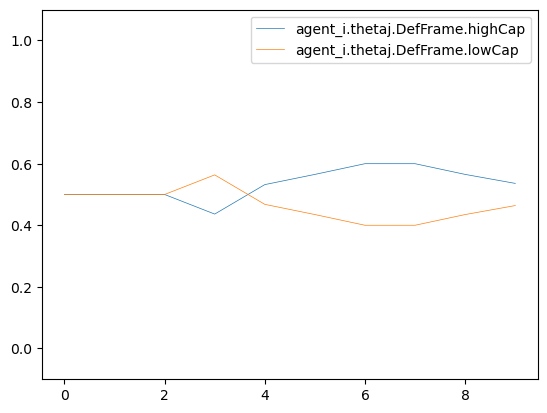

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                       file_write
2                               1.0                        file_enum
3                               1.0                        file_enum
4                               1.0                   login_activity
5                               1.0                        file_enum
6                               1.0                        file_enum
7                               1.0                        file_enum
8                               1.0                   login_activity
9                               1.0                             none

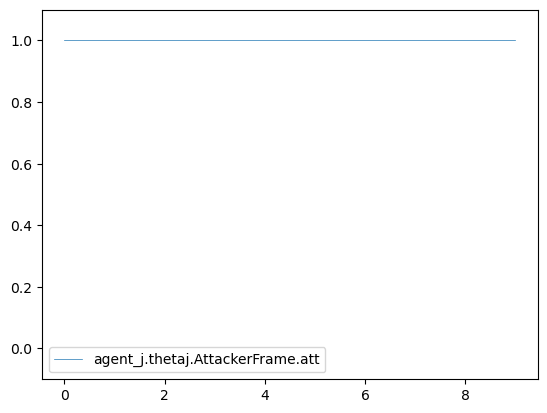

=============DataFound============


state.DataFound.no  state.DataFound.yes  agent_i.action agent_j.action
0                 1.0                  0.0       FileRecon            Nop
1                 1.0                  0.0  ManipulateData   DecoyAccount
2                 1.0                  0.0    EnumAccounts            Nop
3                 1.0                  0.0    EnumAccounts            Nop
4                 1.0                  0.0      PrivEscAcc            Nop
5                 1.0                  0.0       FileRecon            Nop
6                 1.0                  0.0  ManipulateData            Nop
7                 1.0                  0.0       FileRecon            Nop
8                 0.0                  1.0       FileRecon            Nop
9                 0.0                  1.0            Exit            Nop

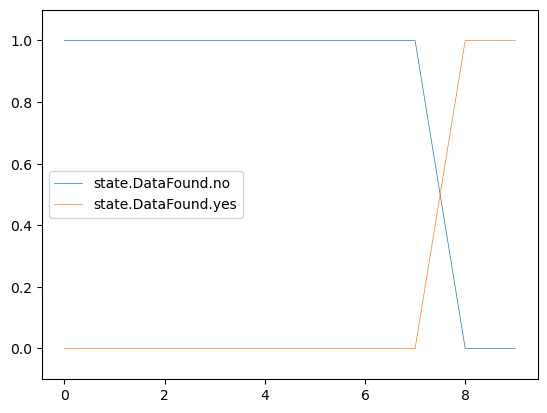

agent_i.DataFound.no  agent_i.DataFound.yes  agent_i.action agent_j.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.343750               0.656250  ManipulateData   DecoyAccount   
2              0.998093               0.001907    EnumAccounts            Nop   
3              0.998093               0.001907    EnumAccounts            Nop   
4              0.998093               0.001907      PrivEscAcc            Nop   
5              0.998093               0.001907       FileRecon            Nop   
6              0.224742               0.775258  ManipulateData            Nop   
7              0.996559               0.003441       FileRecon            Nop   
8              0.985459               0.014541       FileRecon            Nop   
9              0.993863               0.006137            Exit            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                         none                           success  
1                   user_files                           failure  
2                   user_files                           failure  
3                   user_files                           success  
4                         none                           success  
5                         none                           success  
6                         none                           failure  
7                   user_files                           failure  
8                   user_files                           failure  
9                   user_files                           failure

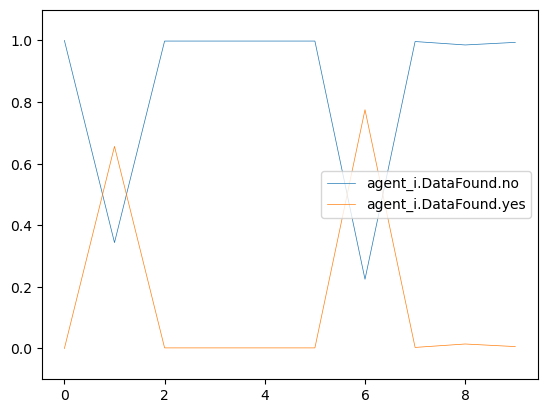

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action  agent_i.action  \
0              1.000000               0.000000            Nop       FileRecon   
1              1.000000               0.000000   DecoyAccount  ManipulateData   
2              1.000000               0.000000            Nop    EnumAccounts   
3              1.000000               0.000000            Nop    EnumAccounts   
4              0.868835               0.131164            Nop      PrivEscAcc   
5              0.731542               0.268458            Nop       FileRecon   
6              0.551966               0.448034            Nop  ManipulateData   
7              0.415362               0.584638            Nop       FileRecon   
8              0.407718               0.592282            Nop       FileRecon   
9              0.407718               0.592282            Nop            Exit   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                        file_enum  
3                        file_enum  
4                   login_activity  
5                        file_enum  
6                        file_enum  
7                        file_enum  
8                   login_activity  
9                             none

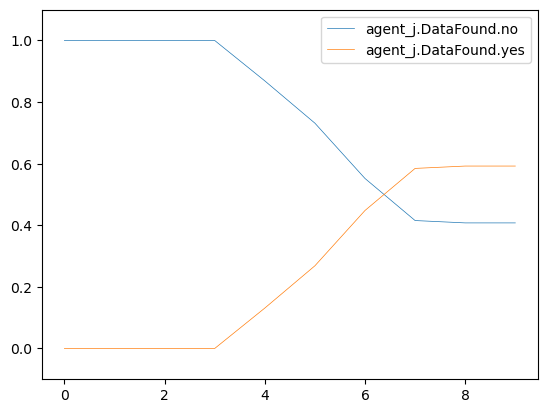

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes  agent_i.action agent_j.action
0                   1.0                    0.0       FileRecon            Nop
1                   1.0                    0.0  ManipulateData   DecoyAccount
2                   0.0                    1.0    EnumAccounts            Nop
3                   0.0                    1.0    EnumAccounts            Nop
4                   0.0                    1.0      PrivEscAcc            Nop
5                   0.0                    1.0       FileRecon            Nop
6                   0.0                    1.0  ManipulateData            Nop
7                   0.0                    1.0       FileRecon            Nop
8                   0.0                    1.0       FileRecon            Nop
9                   0.0                    1.0            Exit            Nop

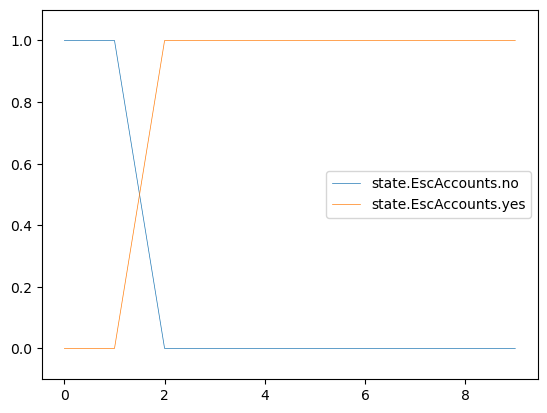

agent_i.EscAccounts.no  agent_i.EscAccounts.yes  agent_i.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000  ManipulateData   
2                0.325000                 0.675000    EnumAccounts   
3                0.613636                 0.386364    EnumAccounts   
4                0.216175                 0.783825      PrivEscAcc   
5                0.000286                 0.999714       FileRecon   
6                0.000110                 0.999890  ManipulateData   
7                0.000299                 0.999701       FileRecon   
8                0.000403                 0.999597       FileRecon   
9                0.000486                 0.999514            Exit   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                   user_files   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_i.observation.ActionResult'  
0                           success  
1                           failure  
2                           failure  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           failure  
8                           failure  
9                           failure

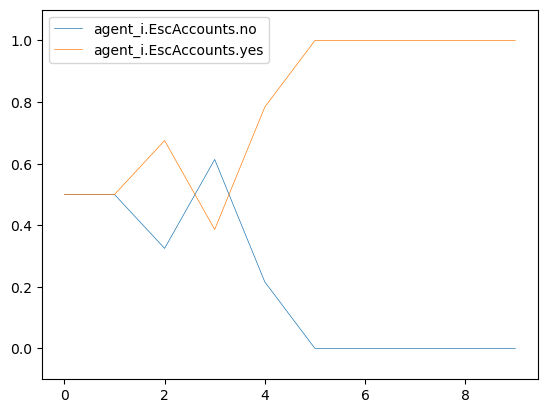

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3    EnumAccounts                        file_enum  
4      PrivEscAcc                   login_activity  
5       FileRecon                        file_enum  
6  ManipulateData                        file_enum  
7       FileRecon                        file_enum  
8       FileRecon                   login_activity  
9            Exit                             none

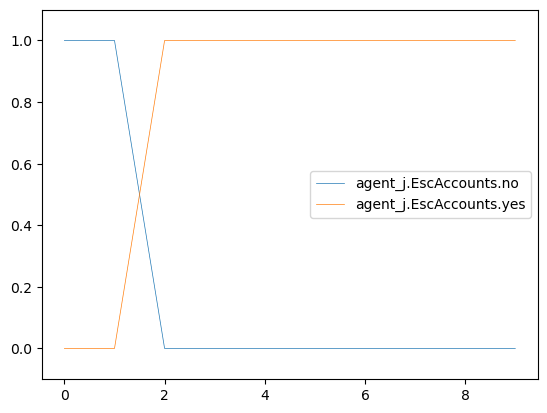

=============AccFound============


state.AccFound.no  state.AccFound.yes  agent_i.action agent_j.action
0                1.0                 0.0       FileRecon            Nop
1                1.0                 0.0  ManipulateData   DecoyAccount
2                1.0                 0.0    EnumAccounts            Nop
3                0.0                 1.0    EnumAccounts            Nop
4                0.0                 1.0      PrivEscAcc            Nop
5                0.0                 1.0       FileRecon            Nop
6                0.0                 1.0  ManipulateData            Nop
7                0.0                 1.0       FileRecon            Nop
8                0.0                 1.0       FileRecon            Nop
9                0.0                 1.0            Exit            Nop

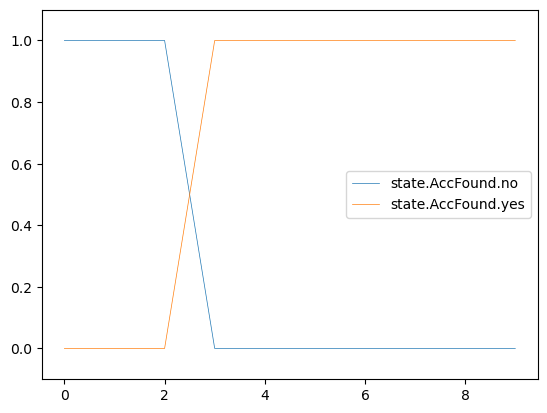

agent_i.AccFound.no  agent_i.AccFound.yes  agent_i.action agent_j.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000  ManipulateData   DecoyAccount   
2             1.000000              0.000000    EnumAccounts            Nop   
3             0.920455              0.079545    EnumAccounts            Nop   
4             0.242497              0.757502      PrivEscAcc            Nop   
5             0.000320              0.999680       FileRecon            Nop   
6             0.000126              0.999874  ManipulateData            Nop   
7             0.000344              0.999656       FileRecon            Nop   
8             0.000452              0.999548       FileRecon            Nop   
9             0.000537              0.999463            Exit            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                         none                           success  
1                   user_files                           failure  
2                   user_files                           failure  
3                   user_files                           success  
4                         none                           success  
5                         none                           success  
6                         none                           failure  
7                   user_files                           failure  
8                   user_files                           failure  
9                   user_files                           failure

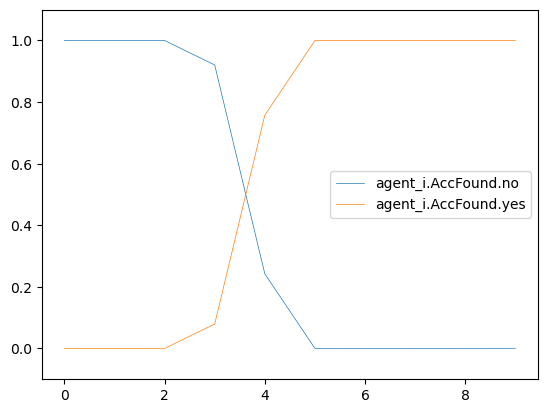

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action  agent_i.action  \
0             1.000000              0.000000            Nop       FileRecon   
1             1.000000              0.000000   DecoyAccount  ManipulateData   
2             0.606250              0.393750            Nop    EnumAccounts   
3             0.418935              0.581065            Nop    EnumAccounts   
4             0.532971              0.467029            Nop      PrivEscAcc   
5             0.532971              0.467029            Nop       FileRecon   
6             0.369631              0.630369            Nop  ManipulateData   
7             0.247685              0.752315            Nop       FileRecon   
8             0.240693              0.759307            Nop       FileRecon   
9             0.240693              0.759307            Nop            Exit   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                        file_enum  
3                        file_enum  
4                   login_activity  
5                        file_enum  
6                        file_enum  
7                        file_enum  
8                   login_activity  
9                             none

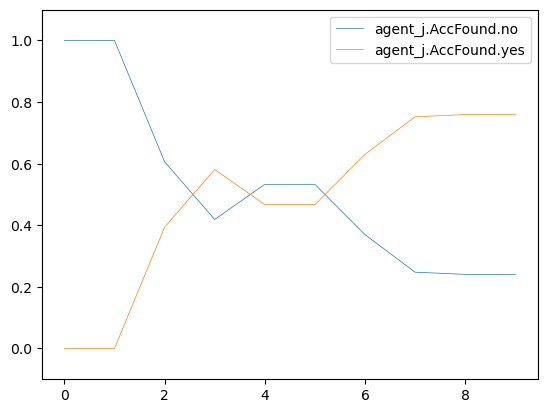

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes  agent_i.action agent_j.action
0                   0.0                    1.0       FileRecon            Nop
1                   0.0                    1.0  ManipulateData   DecoyAccount
2                   0.0                    1.0    EnumAccounts            Nop
3                   0.0                    1.0    EnumAccounts            Nop
4                   0.0                    1.0      PrivEscAcc            Nop
5                   0.0                    1.0       FileRecon            Nop
6                   0.0                    1.0  ManipulateData            Nop
7                   0.0                    1.0       FileRecon            Nop
8                   0.0                    1.0       FileRecon            Nop
9                   0.0                    1.0            Exit            Nop

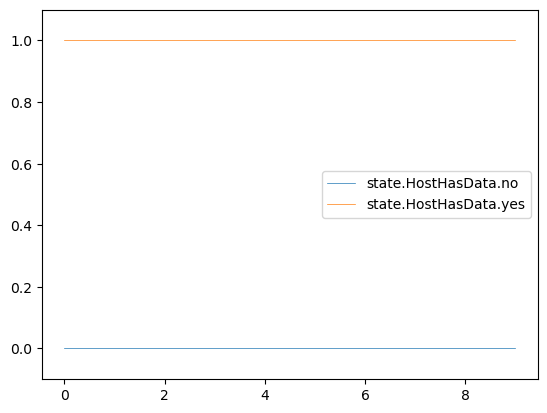

agent_i.HostHasData.no  agent_i.HostHasData.yes  agent_i.action  \
0                0.500000                 0.500000       FileRecon   
1                0.208333                 0.791667  ManipulateData   
2                0.604905                 0.395095    EnumAccounts   
3                0.604905                 0.395095    EnumAccounts   
4                0.604905                 0.395095      PrivEscAcc   
5                0.604905                 0.395095       FileRecon   
6                0.188054                 0.811946  ManipulateData   
7                0.833875                 0.166125       FileRecon   
8                0.930867                 0.069133       FileRecon   
9                0.976551                 0.023449            Exit   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                   user_files   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_i.observation.ActionResult'  
0                           success  
1                           failure  
2                           failure  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           failure  
8                           failure  
9                           failure

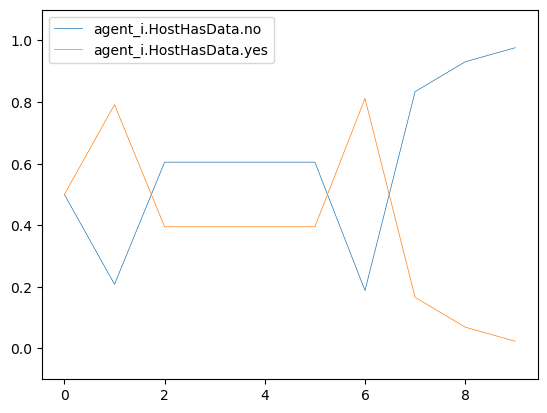

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3    EnumAccounts                        file_enum  
4      PrivEscAcc                   login_activity  
5       FileRecon                        file_enum  
6  ManipulateData                        file_enum  
7       FileRecon                        file_enum  
8       FileRecon                   login_activity  
9            Exit                             none

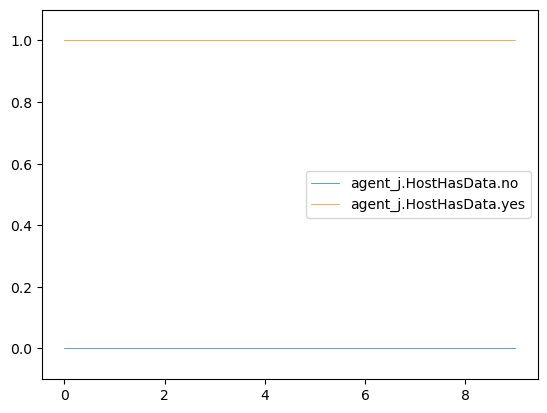

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes  agent_i.action  \
0                    1.0                     0.0       FileRecon   
1                    1.0                     0.0  ManipulateData   
2                    1.0                     0.0    EnumAccounts   
3                    1.0                     0.0    EnumAccounts   
4                    1.0                     0.0      PrivEscAcc   
5                    1.0                     0.0       FileRecon   
6                    1.0                     0.0  ManipulateData   
7                    1.0                     0.0       FileRecon   
8                    1.0                     0.0       FileRecon   
9                    1.0                     0.0            Exit   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

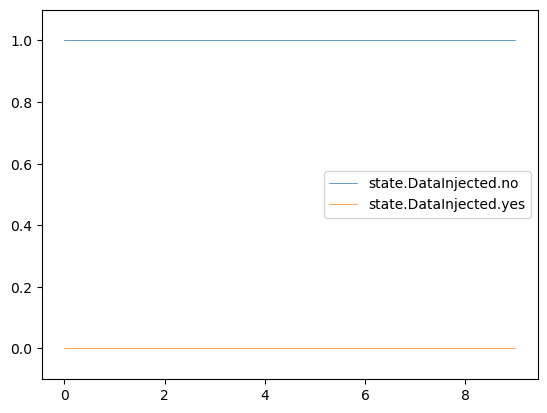

agent_i.DataInjected.no  agent_i.DataInjected.yes  agent_i.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000  ManipulateData   
2                 0.998093                  0.001907    EnumAccounts   
3                 0.998093                  0.001907    EnumAccounts   
4                 0.998093                  0.001907      PrivEscAcc   
5                 0.998093                  0.001907       FileRecon   
6                 0.994663                  0.005337  ManipulateData   
7                 0.996559                  0.003441       FileRecon   
8                 0.999573                  0.000427       FileRecon   
9                 0.999950                  0.000050            Exit   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                   user_files   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_i.observation.ActionResult'  
0                           success  
1                           failure  
2                           failure  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           failure  
8                           failure  
9                           failure

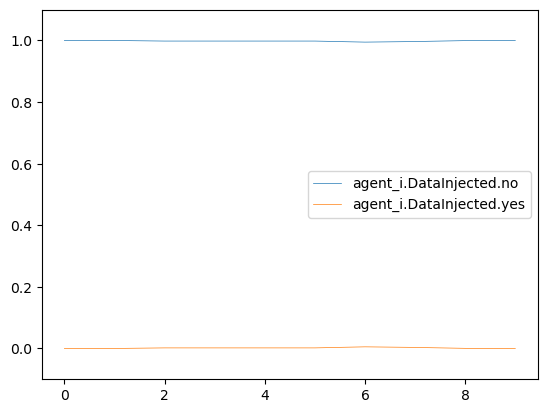

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000   DecoyAccount   
2                 1.000000                  0.000000            Nop   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 0.881952                  0.118048            Nop   
6                 0.823794                  0.176206            Nop   
7                 0.717662                  0.282338            Nop   
8                 0.465198                  0.534802            Nop   
9                 0.442730                  0.557270            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3    EnumAccounts                        file_enum  
4      PrivEscAcc                   login_activity  
5       FileRecon                        file_enum  
6  ManipulateData                        file_enum  
7       FileRecon                        file_enum  
8       FileRecon                   login_activity  
9            Exit                             none

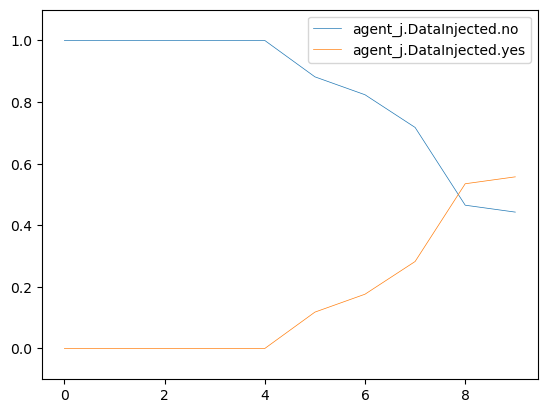

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user  agent_i.action  \
0                     0.0                     1.0       FileRecon   
1                     0.0                     1.0  ManipulateData   
2                     0.0                     1.0    EnumAccounts   
3                     0.0                     1.0    EnumAccounts   
4                     0.0                     1.0      PrivEscAcc   
5                     1.0                     0.0       FileRecon   
6                     1.0                     0.0  ManipulateData   
7                     1.0                     0.0       FileRecon   
8                     1.0                     0.0       FileRecon   
9                     1.0                     0.0            Exit   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

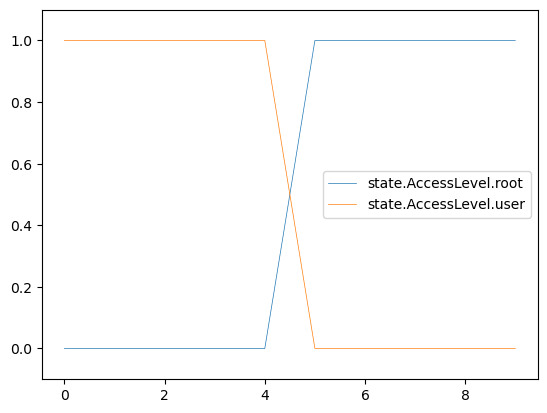

agent_i.AccessLevel.root  agent_i.AccessLevel.user  agent_i.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000  ManipulateData   
2                  0.000000                  1.000000    EnumAccounts   
3                  0.000000                  1.000000    EnumAccounts   
4                  0.000000                  1.000000      PrivEscAcc   
5                  0.999680                  0.000320       FileRecon   
6                  0.999874                  0.000126  ManipulateData   
7                  0.999656                  0.000344       FileRecon   
8                  0.999548                  0.000452       FileRecon   
9                  0.999463                  0.000537            Exit   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                   user_files   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_i.observation.ActionResult'  
0                           success  
1                           failure  
2                           failure  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           failure  
8                           failure  
9                           failure

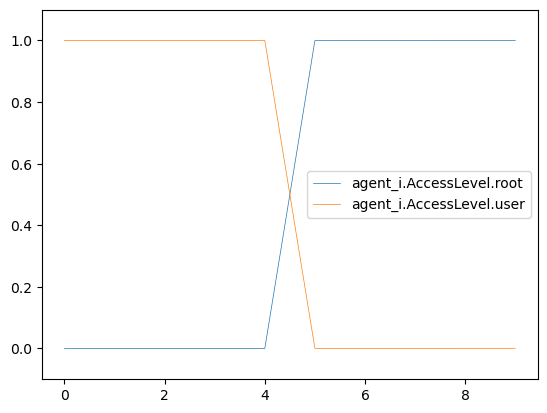

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000   DecoyAccount   
2                  0.000000                  1.000000            Nop   
3                  0.074294                  0.925705            Nop   
4                  0.332970                  0.667030            Nop   
5                  0.332970                  0.667030            Nop   
6                  0.537410                  0.462590            Nop   
7                  0.690057                  0.309943            Nop   
8                  0.698809                  0.301191            Nop   
9                  0.698809                  0.301191            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3    EnumAccounts                        file_enum  
4      PrivEscAcc                   login_activity  
5       FileRecon                        file_enum  
6  ManipulateData                        file_enum  
7       FileRecon                        file_enum  
8       FileRecon                   login_activity  
9            Exit                             none

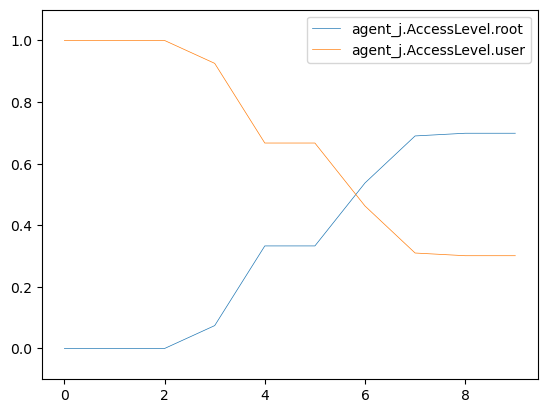

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot  agent_i.action agent_j.action  
0                      1.0       FileRecon            Nop  
1                      1.0  ManipulateData   DecoyAccount  
2                      1.0    EnumAccounts            Nop  
3                      1.0    EnumAccounts            Nop  
4                      1.0      PrivEscAcc            Nop  
5                      1.0       FileRecon            Nop  
6                      1.0  ManipulateData            Nop  
7                      1.0       FileRecon            Nop  
8                      1.0       FileRecon            Nop  
9                      1.0            Exit            Nop

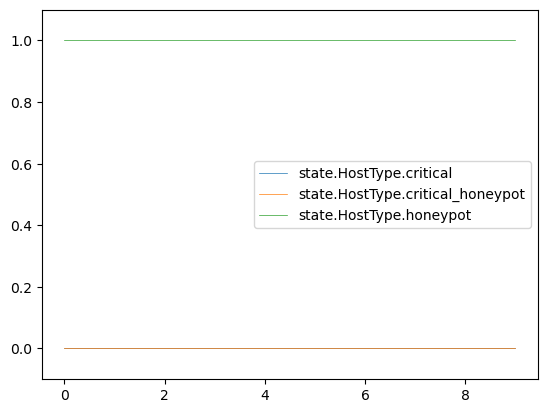

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.300000                                 0.0   
2                   0.300000                                 0.0   
3                   0.563636                                 0.0   
4                   0.655137                                 0.0   
5                   0.608757                                 0.0   
6                   0.400029                                 0.0   
7                   0.400080                                 0.0   
8                   0.608782                                 0.0   
9                   0.784064                                 0.0   

   agent_i.HostType.honeypot  agent_i.action agent_j.action  \
0                   0.500000       FileRecon            Nop   
1                   0.700000  ManipulateData   DecoyAccount   
2                   0.700000    EnumAccounts            Nop   
3                   0.436364    EnumAccounts            Nop   
4                   0.344863      PrivEscAcc            Nop   
5                   0.391243       FileRecon            Nop   
6                   0.599971  ManipulateData            Nop   
7                   0.599920       FileRecon            Nop   
8                   0.391218       FileRecon            Nop   
9                   0.215936            Exit            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                         none                           success  
1                   user_files                           failure  
2                   user_files                           failure  
3                   user_files                           success  
4                         none                           success  
5                         none                           success  
6                         none                           failure  
7                   user_files                           failure  
8                   user_files                           failure  
9                   user_files                           failure

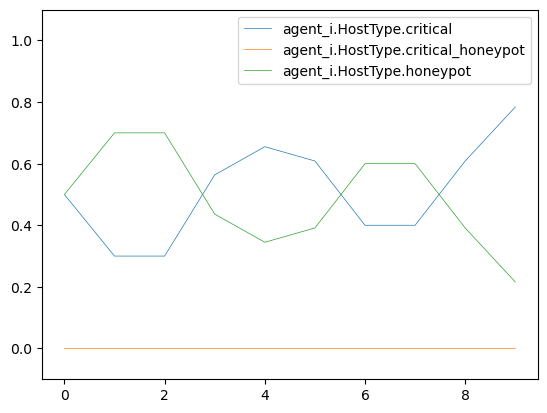

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot agent_j.action  agent_i.action  \
0                        1.0            Nop       FileRecon   
1                        1.0   DecoyAccount  ManipulateData   
2                        1.0            Nop    EnumAccounts   
3                        1.0            Nop    EnumAccounts   
4                        1.0            Nop      PrivEscAcc   
5                        1.0            Nop       FileRecon   
6                        1.0            Nop  ManipulateData   
7                        1.0            Nop       FileRecon   
8                        1.0            Nop       FileRecon   
9                        1.0            Nop            Exit   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                        file_enum  
3                        file_enum  
4                   login_activity  
5                        file_enum  
6                        file_enum  
7                        file_enum  
8                   login_activity  
9                             none

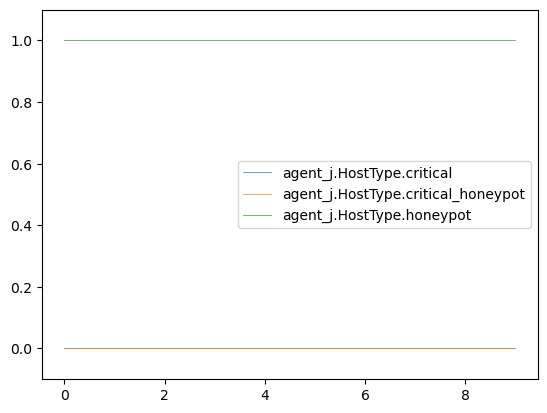

=============AttActive============


state.AttActive.no  state.AttActive.yes  agent_i.action agent_j.action
0                 0.0                  1.0       FileRecon            Nop
1                 0.0                  1.0  ManipulateData   DecoyAccount
2                 0.0                  1.0    EnumAccounts            Nop
3                 0.0                  1.0    EnumAccounts            Nop
4                 0.0                  1.0      PrivEscAcc            Nop
5                 0.0                  1.0       FileRecon            Nop
6                 0.0                  1.0  ManipulateData            Nop
7                 0.0                  1.0       FileRecon            Nop
8                 0.0                  1.0       FileRecon            Nop
9                 0.0                  1.0            Exit            Nop

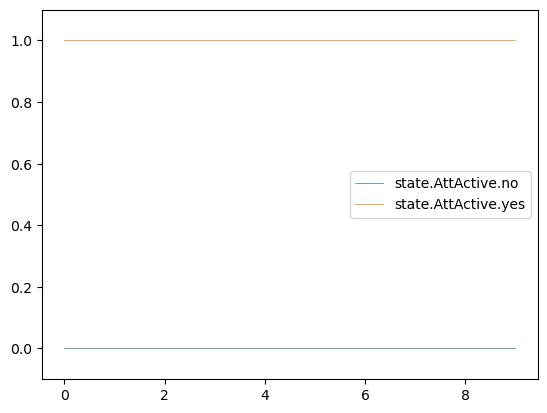

agent_i.AttActive.no  agent_i.AttActive.yes  agent_i.action agent_j.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0  ManipulateData   DecoyAccount   
2                   0.0                    1.0    EnumAccounts            Nop   
3                   0.0                    1.0    EnumAccounts            Nop   
4                   0.0                    1.0      PrivEscAcc            Nop   
5                   0.0                    1.0       FileRecon            Nop   
6                   0.0                    1.0  ManipulateData            Nop   
7                   0.0                    1.0       FileRecon            Nop   
8                   0.0                    1.0       FileRecon            Nop   
9                   0.0                    1.0            Exit            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                         none                           success  
1                   user_files                           failure  
2                   user_files                           failure  
3                   user_files                           success  
4                         none                           success  
5                         none                           success  
6                         none                           failure  
7                   user_files                           failure  
8                   user_files                           failure  
9                   user_files                           failure

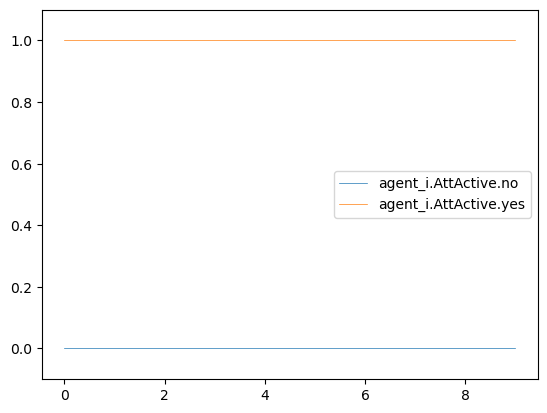

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action  agent_i.action  \
0              0.000000               1.000000            Nop       FileRecon   
1              0.000000               1.000000   DecoyAccount  ManipulateData   
2              0.000000               1.000000            Nop    EnumAccounts   
3              0.000092               0.999908            Nop    EnumAccounts   
4              0.091045               0.908955            Nop      PrivEscAcc   
5              0.604258               0.395742            Nop       FileRecon   
6              0.543900               0.456100            Nop  ManipulateData   
7              0.444802               0.555198            Nop       FileRecon   
8              0.697776               0.302224            Nop       FileRecon   
9              0.976567               0.023433            Nop            Exit   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                        file_enum  
3                        file_enum  
4                   login_activity  
5                        file_enum  
6                        file_enum  
7                        file_enum  
8                   login_activity  
9                             none

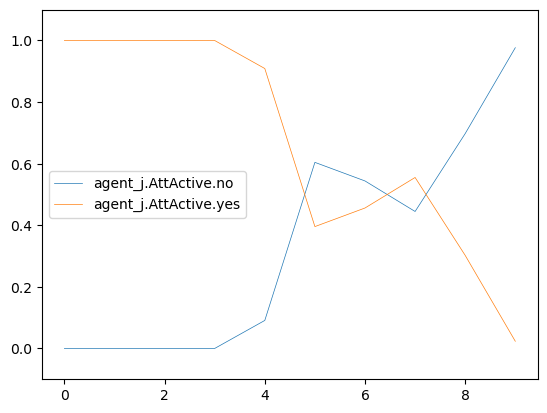

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user  agent_i.action agent_j.action
0                   1.0                   0.0       FileRecon            Nop
1                   1.0                   0.0  ManipulateData   DecoyAccount
2                   1.0                   0.0    EnumAccounts            Nop
3                   1.0                   0.0    EnumAccounts            Nop
4                   1.0                   0.0      PrivEscAcc            Nop
5                   1.0                   0.0       FileRecon            Nop
6                   1.0                   0.0  ManipulateData            Nop
7                   1.0                   0.0       FileRecon            Nop
8                   1.0                   0.0       FileRecon            Nop
9                   1.0                   0.0            Exit            Nop

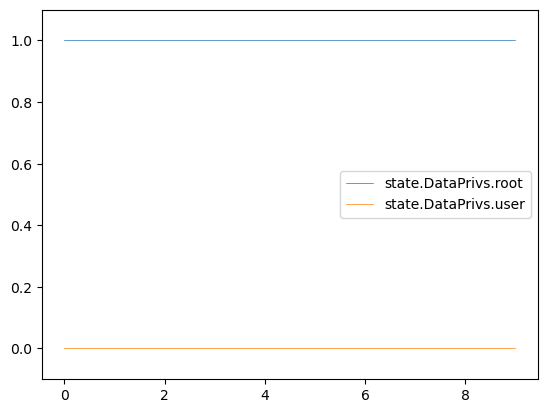

agent_i.DataPrivs.root  agent_i.DataPrivs.user  agent_i.action  \
0                0.500000                0.500000       FileRecon   
1                0.208333                0.791667  ManipulateData   
2                0.604905                0.395095    EnumAccounts   
3                0.604905                0.395095    EnumAccounts   
4                0.604905                0.395095      PrivEscAcc   
5                0.604905                0.395095       FileRecon   
6                0.714463                0.285537  ManipulateData   
7                0.544725                0.455275       FileRecon   
8                0.518641                0.481359       FileRecon   
9                0.506353                0.493647            Exit   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                   user_files   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_i.observation.ActionResult'  
0                           success  
1                           failure  
2                           failure  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           failure  
8                           failure  
9                           failure

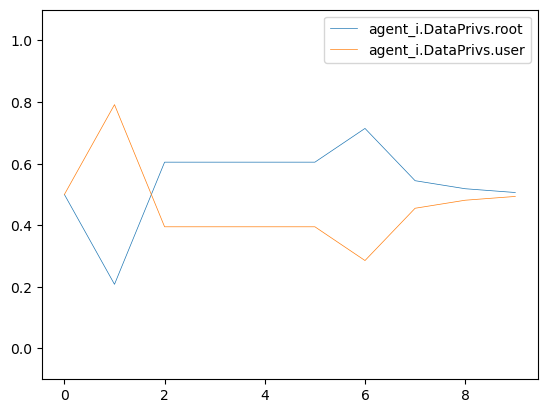

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3    EnumAccounts                        file_enum  
4      PrivEscAcc                   login_activity  
5       FileRecon                        file_enum  
6  ManipulateData                        file_enum  
7       FileRecon                        file_enum  
8       FileRecon                   login_activity  
9            Exit                             none

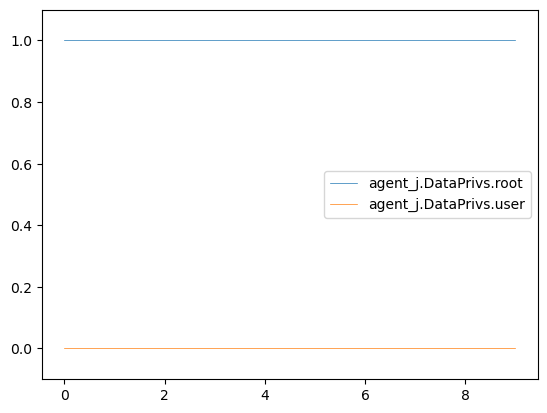

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.618685                        0.381315   
3                         0.628194                        0.371806   
4                         0.649590                        0.350410   
5                         0.628197                        0.371803   
6                         0.628202                        0.371798   
7                         0.628202                        0.371798   
8                         0.628202                        0.371798   
9                         0.628202                        0.371798   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           failure  
4                   user_files                           success  
5                         none                           success  
6                         none                           failure  
7                         none                           success  
8                         none                           success  
9                         none                           success

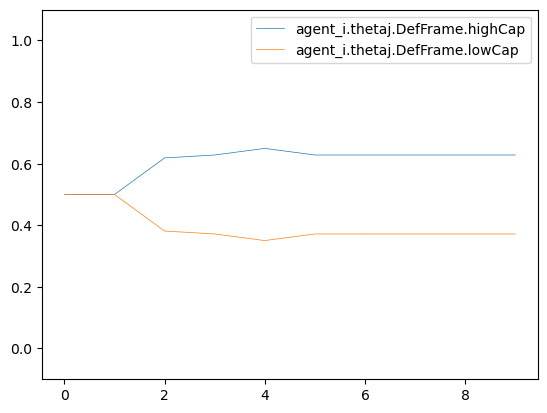

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                   login_activity
3                               1.0                        file_enum
4                               1.0                        file_enum
5                               1.0                       file_write
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

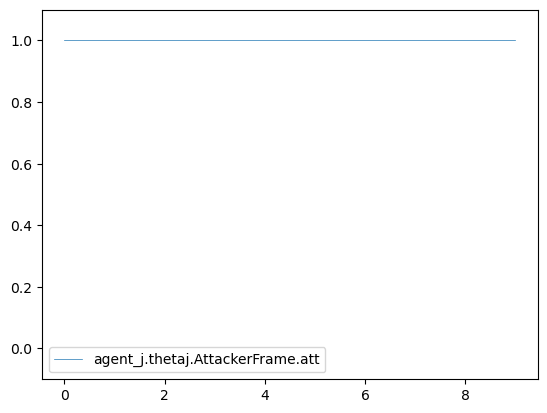

=============DataFound============


state.DataFound.no  state.DataFound.yes  agent_i.action agent_j.action
0                 1.0                  0.0       FileRecon            Nop
1                 1.0                  0.0    EnumAccounts   DecoyAccount
2                 1.0                  0.0      PrivEscAcc            Nop
3                 1.0                  0.0       FileRecon            Nop
4                 1.0                  0.0       FileRecon            Nop
5                 0.0                  1.0  ManipulateData            Nop
6                 0.0                  1.0            Exit            Nop
7                 0.0                  1.0             Nop            Nop
8                 0.0                  1.0             Nop            Nop
9                 0.0                  1.0             Nop            Nop

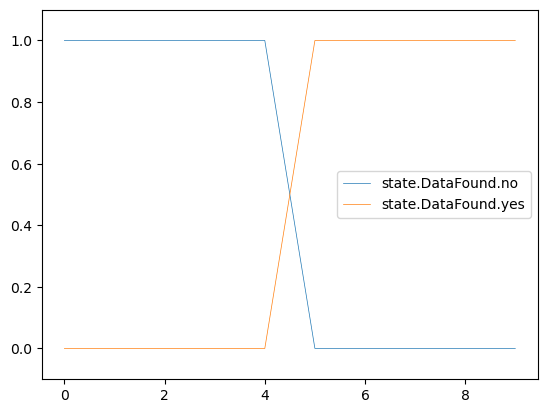

agent_i.DataFound.no  agent_i.DataFound.yes  agent_i.action agent_j.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.976974               0.023026    EnumAccounts   DecoyAccount   
2              0.976974               0.023026      PrivEscAcc            Nop   
3              0.976974               0.023026       FileRecon            Nop   
4              0.956100               0.043900       FileRecon            Nop   
5              0.380683               0.619317  ManipulateData            Nop   
6              0.000615               0.999385            Exit            Nop   
7              0.000615               0.999385             Nop            Nop   
8              0.000615               0.999385             Nop            Nop   
9              0.000615               0.999385             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           failure  
4                   user_files                           success  
5                         none                           success  
6                         none                           failure  
7                         none                           success  
8                         none                           success  
9                         none                           success

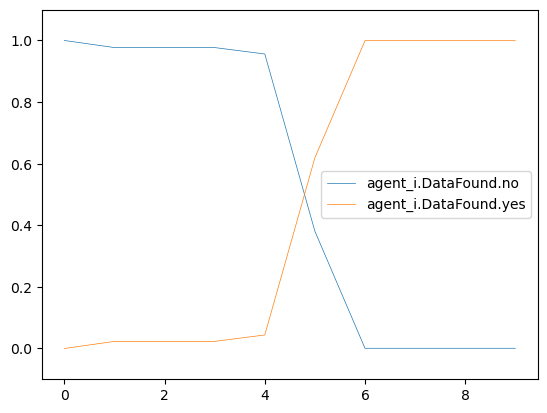

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action  agent_i.action  \
0              1.000000               0.000000            Nop       FileRecon   
1              1.000000               0.000000   DecoyAccount    EnumAccounts   
2              1.000000               0.000000            Nop      PrivEscAcc   
3              1.000000               0.000000            Nop       FileRecon   
4              0.339744               0.660256            Nop       FileRecon   
5              0.212100               0.787900            Nop  ManipulateData   
6              0.046854               0.953146            Nop            Exit   
7              0.046781               0.953219            Nop             Nop   
8              0.046781               0.953219            Nop             Nop   
9              0.046781               0.953219            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                        file_enum  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                             none

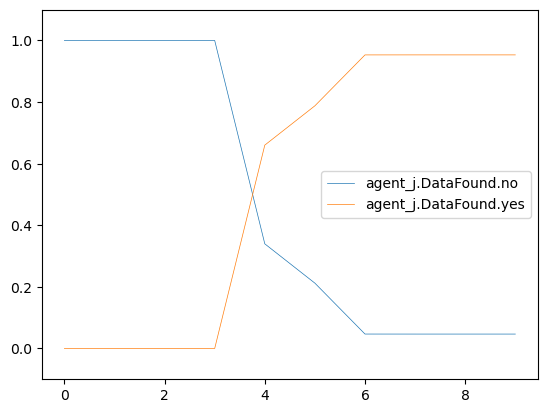

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes  agent_i.action agent_j.action
0                   1.0                    0.0       FileRecon            Nop
1                   1.0                    0.0    EnumAccounts   DecoyAccount
2                   0.0                    1.0      PrivEscAcc            Nop
3                   0.0                    1.0       FileRecon            Nop
4                   0.0                    1.0       FileRecon            Nop
5                   0.0                    1.0  ManipulateData            Nop
6                   0.0                    1.0            Exit            Nop
7                   0.0                    1.0             Nop            Nop
8                   0.0                    1.0             Nop            Nop
9                   0.0                    1.0             Nop            Nop

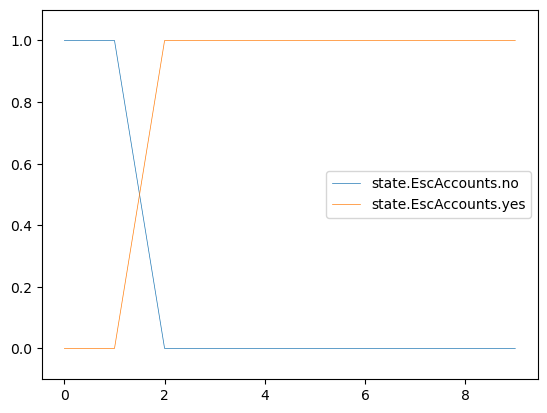

agent_i.EscAccounts.no  agent_i.EscAccounts.yes  agent_i.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.057958                 0.942042      PrivEscAcc   
3                0.000068                 0.999932       FileRecon   
4                0.000075                 0.999925       FileRecon   
5                0.000048                 0.999952  ManipulateData   
6                0.000017                 0.999983            Exit   
7                0.000017                 0.999983             Nop   
8                0.000017                 0.999983             Nop   
9                0.000017                 0.999983             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_i.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           failure  
4                           success  
5                           success  
6                           failure  
7                           success  
8                           success  
9                           success

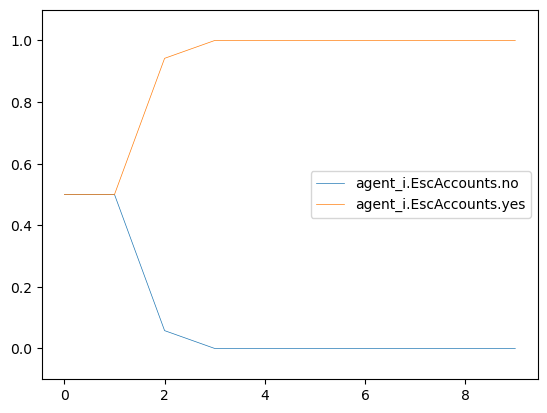

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

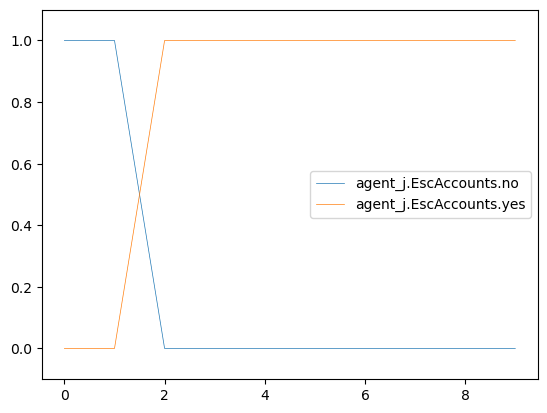

=============AccFound============


state.AccFound.no  state.AccFound.yes  agent_i.action agent_j.action
0                1.0                 0.0       FileRecon            Nop
1                1.0                 0.0    EnumAccounts   DecoyAccount
2                0.0                 1.0      PrivEscAcc            Nop
3                0.0                 1.0       FileRecon            Nop
4                0.0                 1.0       FileRecon            Nop
5                0.0                 1.0  ManipulateData            Nop
6                0.0                 1.0            Exit            Nop
7                0.0                 1.0             Nop            Nop
8                0.0                 1.0             Nop            Nop
9                0.0                 1.0             Nop            Nop

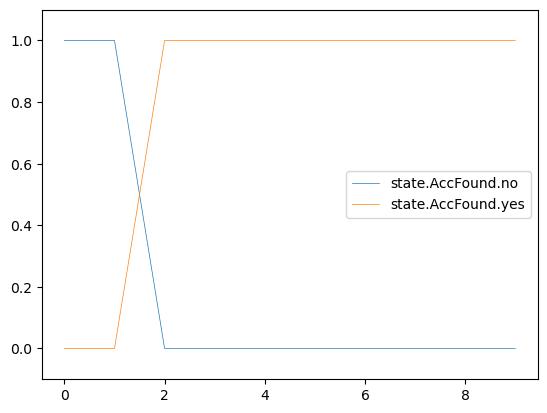

agent_i.AccFound.no  agent_i.AccFound.yes  agent_i.action agent_j.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000    EnumAccounts   DecoyAccount   
2             0.100779              0.899222      PrivEscAcc            Nop   
3             0.000119              0.999881       FileRecon            Nop   
4             0.000136              0.999864       FileRecon            Nop   
5             0.000083              0.999917  ManipulateData            Nop   
6             0.000030              0.999971            Exit            Nop   
7             0.000030              0.999970             Nop            Nop   
8             0.000030              0.999971             Nop            Nop   
9             0.000030              0.999970             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           failure  
4                   user_files                           success  
5                         none                           success  
6                         none                           failure  
7                         none                           success  
8                         none                           success  
9                         none                           success

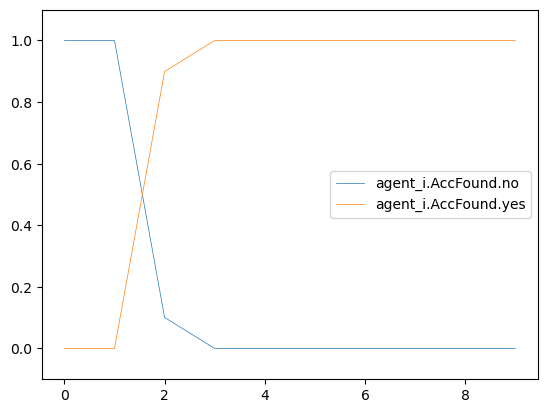

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action  agent_i.action  \
0             1.000000              0.000000            Nop       FileRecon   
1             1.000000              0.000000   DecoyAccount    EnumAccounts   
2             0.310937              0.689063            Nop      PrivEscAcc   
3             0.097425              0.902575            Nop       FileRecon   
4             0.054096              0.945904            Nop       FileRecon   
5             0.018611              0.981389            Nop  ManipulateData   
6             0.004380              0.995620            Nop            Exit   
7             0.004534              0.995466            Nop             Nop   
8             0.004534              0.995466            Nop             Nop   
9             0.004534              0.995466            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                        file_enum  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                             none

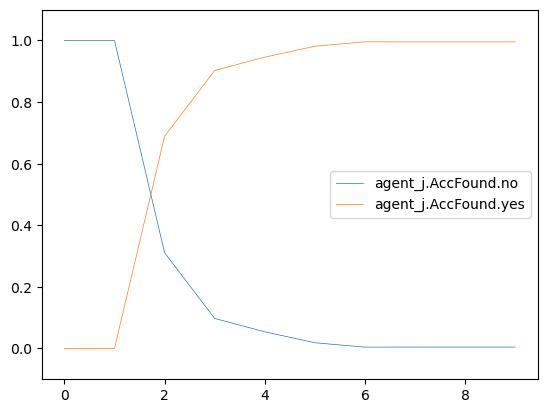

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes  agent_i.action agent_j.action
0                   0.0                    1.0       FileRecon            Nop
1                   0.0                    1.0    EnumAccounts   DecoyAccount
2                   0.0                    1.0      PrivEscAcc            Nop
3                   0.0                    1.0       FileRecon            Nop
4                   0.0                    1.0       FileRecon            Nop
5                   0.0                    1.0  ManipulateData            Nop
6                   0.0                    1.0            Exit            Nop
7                   0.0                    1.0             Nop            Nop
8                   0.0                    1.0             Nop            Nop
9                   0.0                    1.0             Nop            Nop

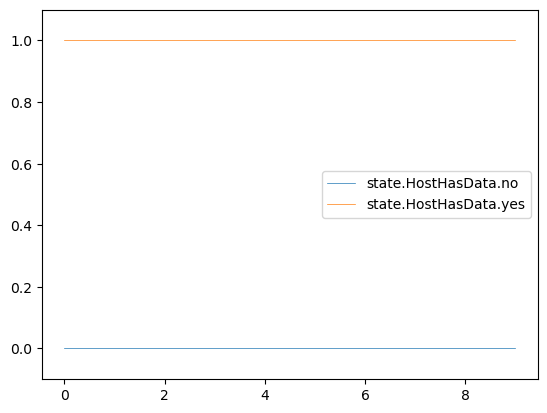

agent_i.HostHasData.no  agent_i.HostHasData.yes  agent_i.action  \
0                0.500000                 0.500000       FileRecon   
1                0.592105                 0.407895    EnumAccounts   
2                0.592105                 0.407895      PrivEscAcc   
3                0.592105                 0.407895       FileRecon   
4                0.800052                 0.199948       FileRecon   
5                0.359616                 0.640384  ManipulateData   
6                0.000581                 0.999419            Exit   
7                0.000581                 0.999419             Nop   
8                0.000581                 0.999419             Nop   
9                0.000581                 0.999419             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_i.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           failure  
4                           success  
5                           success  
6                           failure  
7                           success  
8                           success  
9                           success

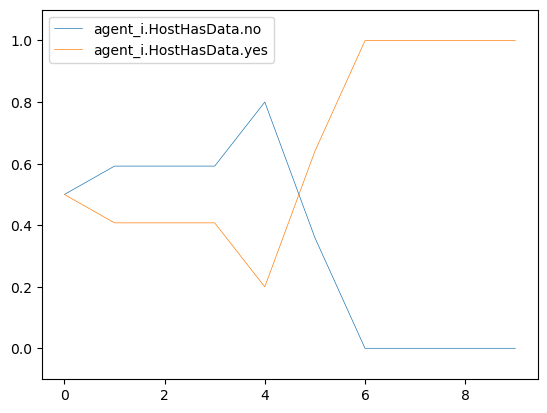

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

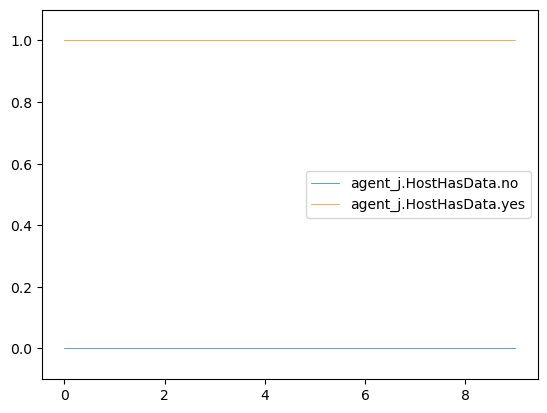

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes  agent_i.action  \
0                    1.0                     0.0       FileRecon   
1                    1.0                     0.0    EnumAccounts   
2                    1.0                     0.0      PrivEscAcc   
3                    1.0                     0.0       FileRecon   
4                    1.0                     0.0       FileRecon   
5                    1.0                     0.0  ManipulateData   
6                    0.0                     1.0            Exit   
7                    0.0                     1.0             Nop   
8                    0.0                     1.0             Nop   
9                    0.0                     1.0             Nop   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

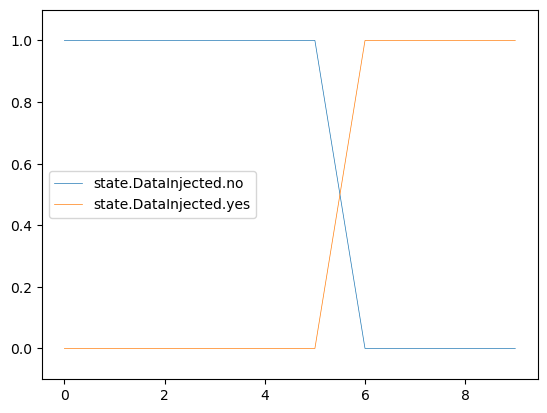

agent_i.DataInjected.no  agent_i.DataInjected.yes  agent_i.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000       FileRecon   
5                 1.000000                  0.000000  ManipulateData   
6                 0.000615                  0.999385            Exit   
7                 0.000615                  0.999385             Nop   
8                 0.000615                  0.999385             Nop   
9                 0.000615                  0.999385             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_i.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           failure  
4                           success  
5                           success  
6                           failure  
7                           success  
8                           success  
9                           success

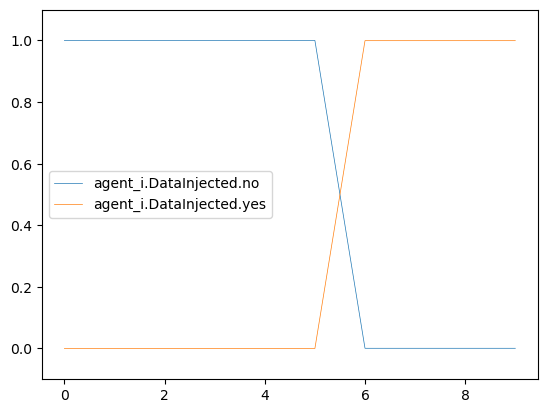

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000   DecoyAccount   
2                 1.000000                  0.000000            Nop   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 0.796803                  0.203197            Nop   
6                 0.089151                  0.910849            Nop   
7                 0.051090                  0.948910            Nop   
8                 0.051007                  0.948993            Nop   
9                 0.051007                  0.948993            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

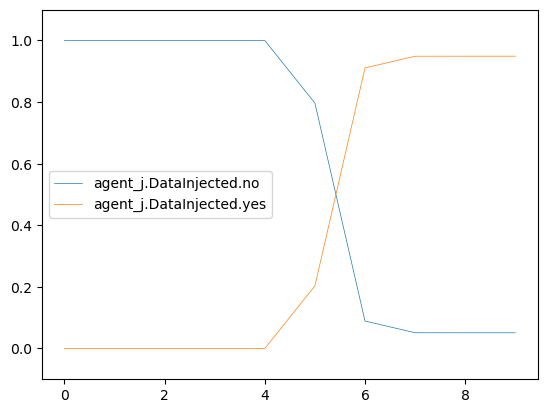

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user  agent_i.action  \
0                     0.0                     1.0       FileRecon   
1                     0.0                     1.0    EnumAccounts   
2                     0.0                     1.0      PrivEscAcc   
3                     1.0                     0.0       FileRecon   
4                     1.0                     0.0       FileRecon   
5                     1.0                     0.0  ManipulateData   
6                     1.0                     0.0            Exit   
7                     1.0                     0.0             Nop   
8                     1.0                     0.0             Nop   
9                     1.0                     0.0             Nop   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

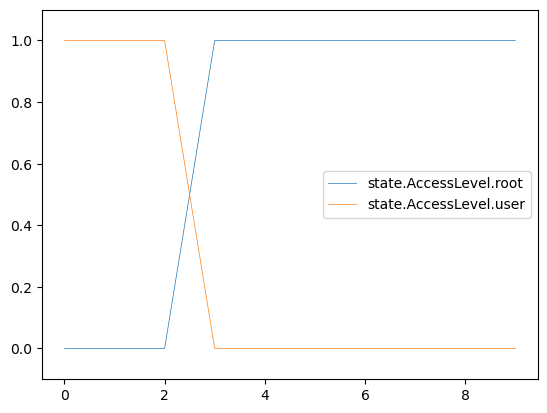

agent_i.AccessLevel.root  agent_i.AccessLevel.user  agent_i.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.999824                  0.000176       FileRecon   
4                  0.999832                  0.000168       FileRecon   
5                  0.999877                  0.000123  ManipulateData   
6                  0.999956                  0.000044            Exit   
7                  0.999956                  0.000044             Nop   
8                  0.999956                  0.000044             Nop   
9                  0.999956                  0.000044             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_i.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           failure  
4                           success  
5                           success  
6                           failure  
7                           success  
8                           success  
9                           success

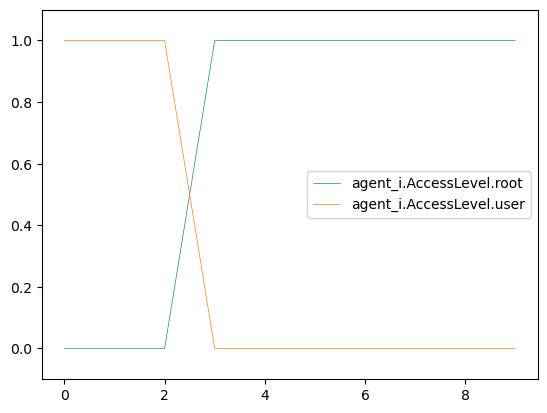

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000   DecoyAccount   
2                  0.000000                  1.000000            Nop   
3                  0.886277                  0.113723            Nop   
4                  0.943528                  0.056472            Nop   
5                  0.980577                  0.019423            Nop   
6                  0.995430                  0.004570            Nop   
7                  0.995269                  0.004731            Nop   
8                  0.995268                  0.004732            Nop   
9                  0.995268                  0.004732            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

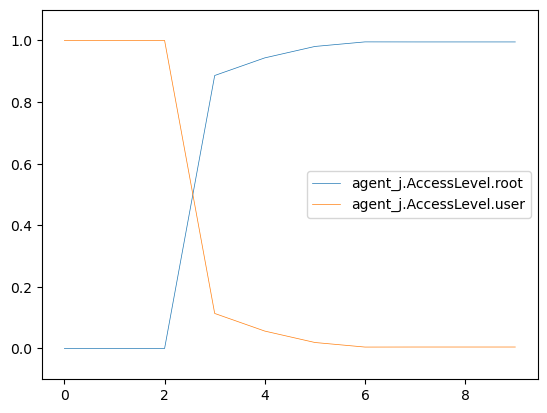

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot  agent_i.action agent_j.action  
0                      1.0       FileRecon            Nop  
1                      1.0    EnumAccounts   DecoyAccount  
2                      1.0      PrivEscAcc            Nop  
3                      1.0       FileRecon            Nop  
4                      1.0       FileRecon            Nop  
5                      1.0  ManipulateData            Nop  
6                      1.0            Exit            Nop  
7                      1.0             Nop            Nop  
8                      1.0             Nop            Nop  
9                      1.0             Nop            Nop

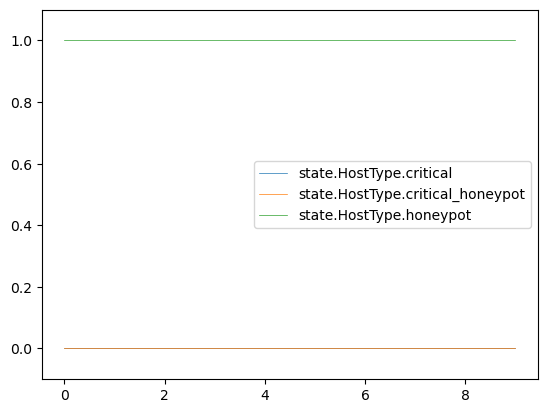

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.300000                                 0.0   
2                   0.118339                                 0.0   
3                   0.057764                                 0.0   
4                   0.025609                                 0.0   
5                   0.057742                                 0.0   
6                   0.057710                                 0.0   
7                   0.057710                                 0.0   
8                   0.057710                                 0.0   
9                   0.057710                                 0.0   

   agent_i.HostType.honeypot  agent_i.action agent_j.action  \
0                   0.500000       FileRecon            Nop   
1                   0.700000    EnumAccounts   DecoyAccount   
2                   0.881661      PrivEscAcc            Nop   
3                   0.942236       FileRecon            Nop   
4                   0.974391       FileRecon            Nop   
5                   0.942258  ManipulateData            Nop   
6                   0.942290            Exit            Nop   
7                   0.942290             Nop            Nop   
8                   0.942290             Nop            Nop   
9                   0.942290             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           failure  
4                   user_files                           success  
5                         none                           success  
6                         none                           failure  
7                         none                           success  
8                         none                           success  
9                         none                           success

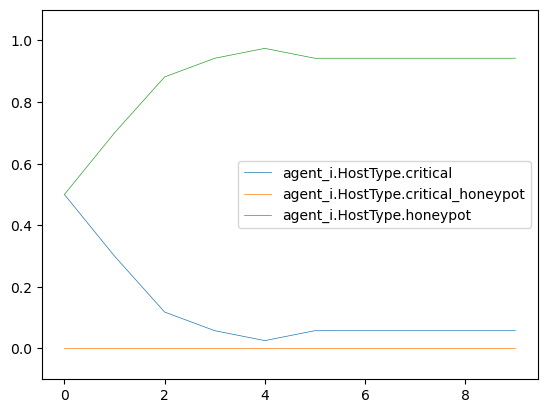

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot agent_j.action  agent_i.action  \
0                        1.0            Nop       FileRecon   
1                        1.0   DecoyAccount    EnumAccounts   
2                        1.0            Nop      PrivEscAcc   
3                        1.0            Nop       FileRecon   
4                        1.0            Nop       FileRecon   
5                        1.0            Nop  ManipulateData   
6                        1.0            Nop            Exit   
7                        1.0            Nop             Nop   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                        file_enum  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                             none

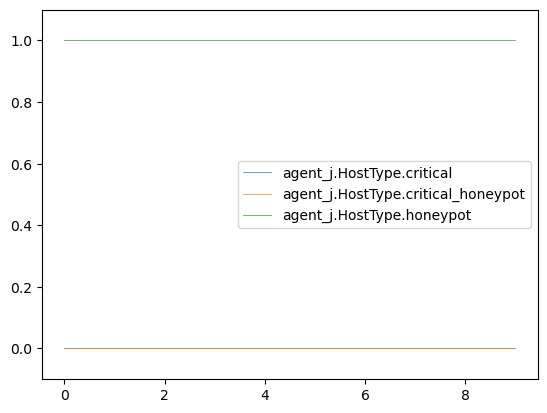

=============AttActive============


state.AttActive.no  state.AttActive.yes  agent_i.action agent_j.action
0                 0.0                  1.0       FileRecon            Nop
1                 0.0                  1.0    EnumAccounts   DecoyAccount
2                 0.0                  1.0      PrivEscAcc            Nop
3                 0.0                  1.0       FileRecon            Nop
4                 0.0                  1.0       FileRecon            Nop
5                 0.0                  1.0  ManipulateData            Nop
6                 0.0                  1.0            Exit            Nop
7                 1.0                  0.0             Nop            Nop
8                 1.0                  0.0             Nop            Nop
9                 1.0                  0.0             Nop            Nop

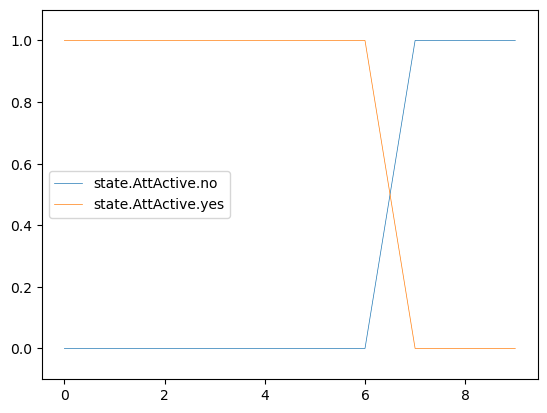

agent_i.AttActive.no  agent_i.AttActive.yes  agent_i.action agent_j.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0    EnumAccounts   DecoyAccount   
2                   0.0                    1.0      PrivEscAcc            Nop   
3                   0.0                    1.0       FileRecon            Nop   
4                   0.0                    1.0       FileRecon            Nop   
5                   0.0                    1.0  ManipulateData            Nop   
6                   0.0                    1.0            Exit            Nop   
7                   1.0                    0.0             Nop            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           failure  
4                   user_files                           success  
5                         none                           success  
6                         none                           failure  
7                         none                           success  
8                         none                           success  
9                         none                           success

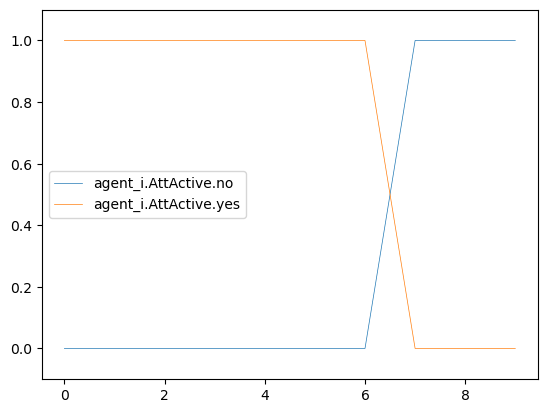

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action  agent_i.action  \
0              0.000000           1.000000e+00            Nop       FileRecon   
1              0.000000           1.000000e+00   DecoyAccount    EnumAccounts   
2              0.000000           1.000000e+00            Nop      PrivEscAcc   
3              0.000003           9.999968e-01            Nop       FileRecon   
4              0.009350           9.906499e-01            Nop       FileRecon   
5              0.017826           9.821739e-01            Nop  ManipulateData   
6              0.052130           9.478700e-01            Nop            Exit   
7              0.994058           5.941783e-03            Nop             Nop   
8              0.999987           1.266181e-05            Nop             Nop   
9              1.000000           2.634316e-08            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                        file_enum  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                             none

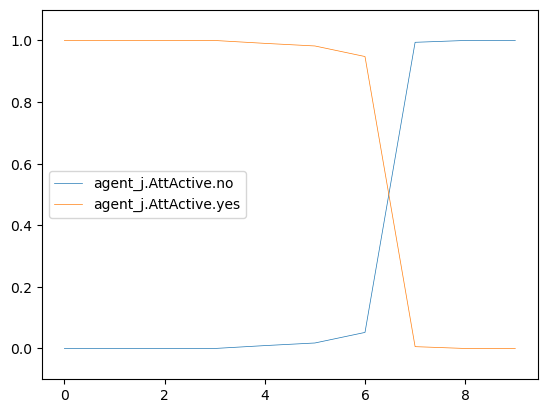

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user  agent_i.action agent_j.action
0                   1.0                   0.0       FileRecon            Nop
1                   1.0                   0.0    EnumAccounts   DecoyAccount
2                   1.0                   0.0      PrivEscAcc            Nop
3                   1.0                   0.0       FileRecon            Nop
4                   1.0                   0.0       FileRecon            Nop
5                   1.0                   0.0  ManipulateData            Nop
6                   1.0                   0.0            Exit            Nop
7                   1.0                   0.0             Nop            Nop
8                   1.0                   0.0             Nop            Nop
9                   1.0                   0.0             Nop            Nop

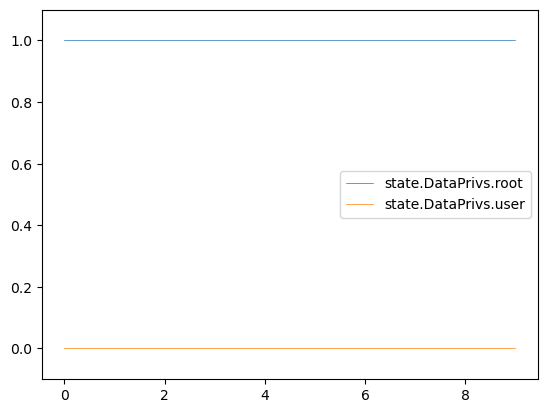

agent_i.DataPrivs.root  agent_i.DataPrivs.user  agent_i.action  \
0                0.500000                0.500000       FileRecon   
1                0.592105                0.407895    EnumAccounts   
2                0.592105                0.407895      PrivEscAcc   
3                0.592105                0.407895       FileRecon   
4                0.551180                0.448819       FileRecon   
5                0.661641                0.338359  ManipulateData   
6                0.751684                0.248316            Exit   
7                0.751684                0.248316             Nop   
8                0.751684                0.248316             Nop   
9                0.751684                0.248316             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_i.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           failure  
4                           success  
5                           success  
6                           failure  
7                           success  
8                           success  
9                           success

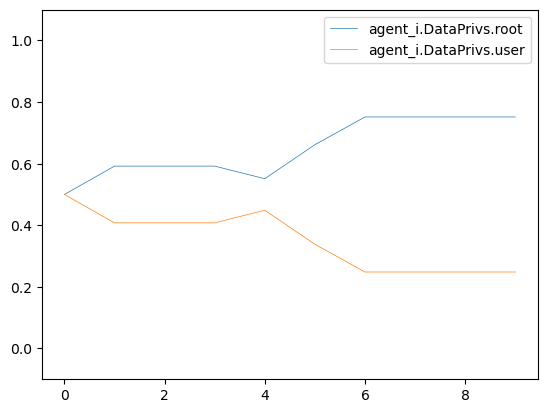

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

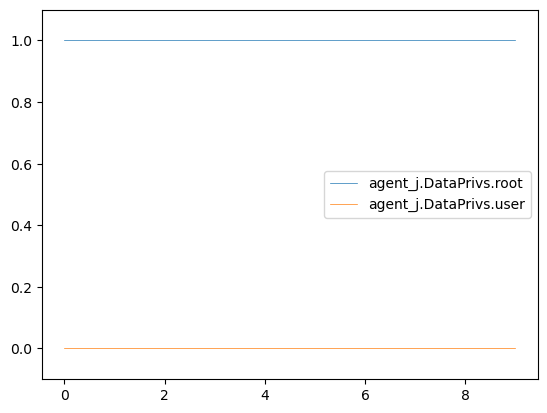

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.481844                        0.518156   
3                         0.491623                        0.508377   
4                         0.491623                        0.508377   
5                         0.491623                        0.508377   
6                         0.491623                        0.508377   
7                         0.491623                        0.508377   
8                         0.491623                        0.508377   
9                         0.491623                        0.508377   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                   user_files                           failure  
1                   user_files                           failure  
2                   user_files                           failure  
3                         none                           failure  
4                         none                           success  
5                         none                           failure  
6                         none                           success  
7                   user_files                           failure  
8                   user_files                           failure  
9                         none                           failure

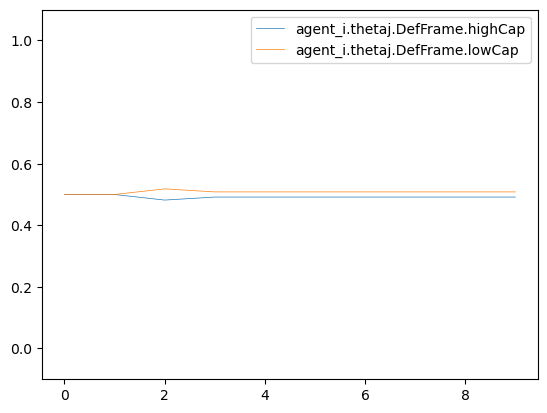

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                   login_activity
2                               1.0                        file_enum
3                               1.0                             none
4                               1.0                        file_enum
5                               1.0                   login_activity
6                               1.0                       file_write
7                               1.0                        file_enum
8                               1.0                             none
9                               1.0                             none

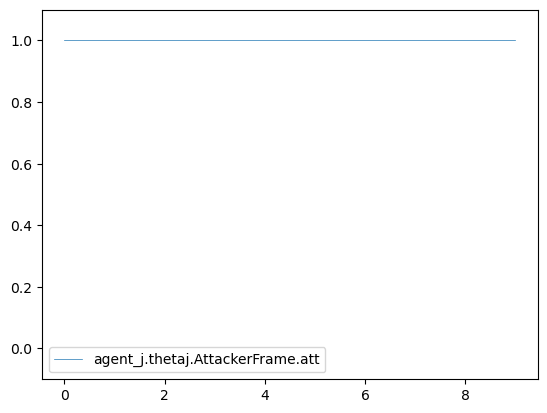

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0      FileRecon            Nop
1                 1.0                  0.0   EnumAccounts   DecoyAccount
2                 1.0                  0.0      FileRecon            Nop
3                 1.0                  0.0           Exit            Nop
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

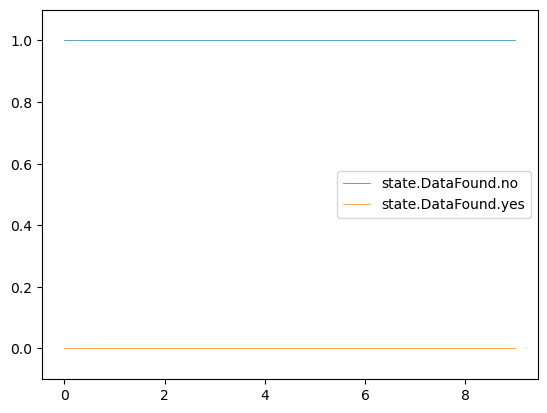

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0              1.000000               0.000000      FileRecon            Nop   
1              0.976974               0.023026   EnumAccounts   DecoyAccount   
2              0.976974               0.023026      FileRecon            Nop   
3              0.989758               0.010242           Exit            Nop   
4              0.989758               0.010242            Nop            Nop   
5              0.989758               0.010242            Nop            Nop   
6              0.989758               0.010242            Nop            Nop   
7              0.989758               0.010242            Nop            Nop   
8              0.989758               0.010242            Nop            Nop   
9              0.989758               0.010242            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                   user_files                           failure  
1                   user_files                           failure  
2                   user_files                           failure  
3                         none                           failure  
4                         none                           success  
5                         none                           failure  
6                         none                           success  
7                   user_files                           failure  
8                   user_files                           failure  
9                         none                           failure

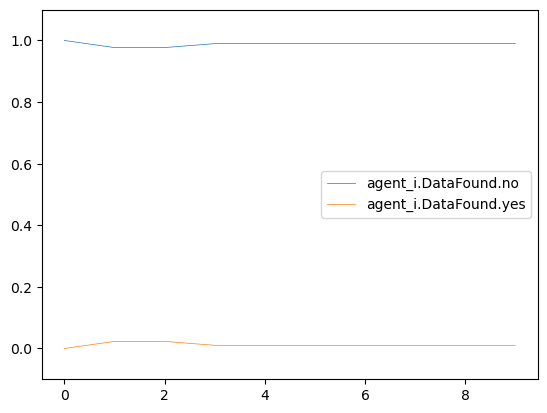

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0              1.000000               0.000000            Nop      FileRecon   
1              1.000000               0.000000   DecoyAccount   EnumAccounts   
2              1.000000               0.000000            Nop      FileRecon   
3              1.000000               0.000000            Nop           Exit   
4              0.973545               0.026455            Nop            Nop   
5              0.812818               0.187182            Nop            Nop   
6              0.770737               0.229263            Nop            Nop   
7              0.579142               0.420858            Nop            Nop   
8              0.575895               0.424105            Nop            Nop   
9              0.578793               0.421207            Nop            Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                   login_activity  
2                        file_enum  
3                             none  
4                        file_enum  
5                   login_activity  
6                       file_write  
7                        file_enum  
8                             none  
9                             none

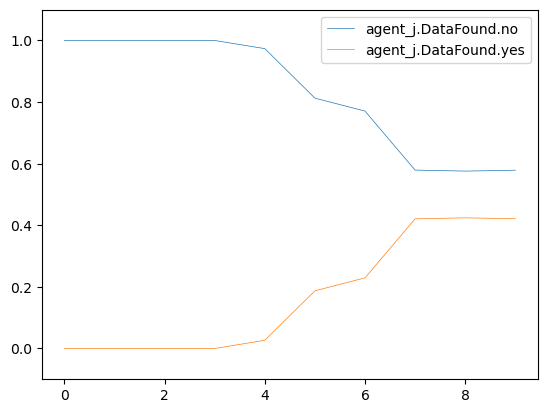

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0      FileRecon            Nop
1                   1.0                    0.0   EnumAccounts   DecoyAccount
2                   0.0                    1.0      FileRecon            Nop
3                   0.0                    1.0           Exit            Nop
4                   0.0                    1.0            Nop            Nop
5                   0.0                    1.0            Nop            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

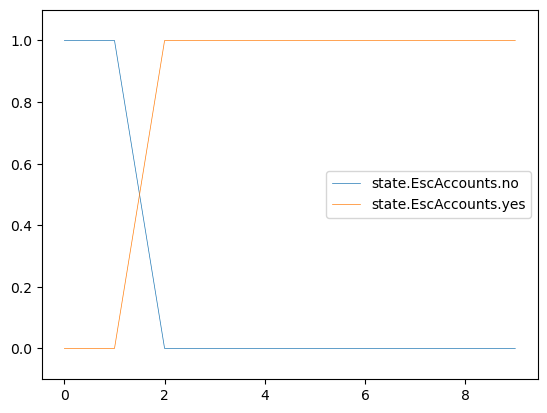

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                0.500000                 0.500000      FileRecon   
1                0.500000                 0.500000   EnumAccounts   
2                0.693804                 0.306196      FileRecon   
3                0.711041                 0.288959           Exit   
4                0.711041                 0.288959            Nop   
5                0.711041                 0.288959            Nop   
6                0.711041                 0.288959            Nop   
7                0.711041                 0.288959            Nop   
8                0.711041                 0.288959            Nop   
9                0.711041                 0.288959            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                   user_files   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_i.observation.ActionResult'  
0                           failure  
1                           failure  
2                           failure  
3                           failure  
4                           success  
5                           failure  
6                           success  
7                           failure  
8                           failure  
9                           failure

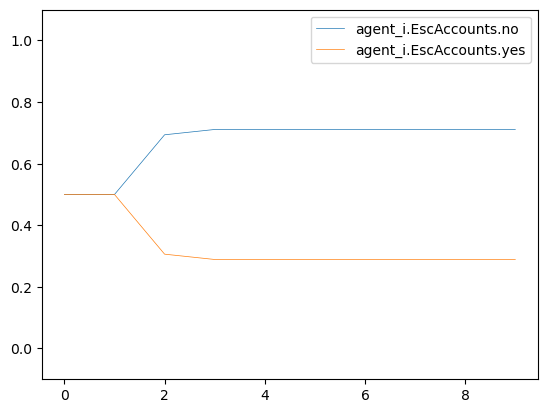

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                   login_activity  
2      FileRecon                        file_enum  
3           Exit                             none  
4            Nop                        file_enum  
5            Nop                   login_activity  
6            Nop                       file_write  
7            Nop                        file_enum  
8            Nop                             none  
9            Nop                             none

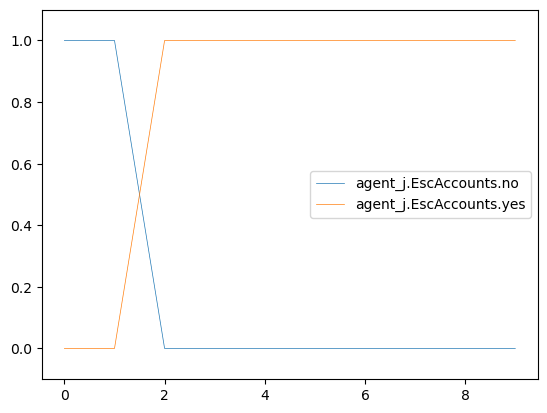

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0      FileRecon            Nop
1                1.0                 0.0   EnumAccounts   DecoyAccount
2                1.0                 0.0      FileRecon            Nop
3                1.0                 0.0           Exit            Nop
4                1.0                 0.0            Nop            Nop
5                1.0                 0.0            Nop            Nop
6                1.0                 0.0            Nop            Nop
7                1.0                 0.0            Nop            Nop
8                1.0                 0.0            Nop            Nop
9                1.0                 0.0            Nop            Nop

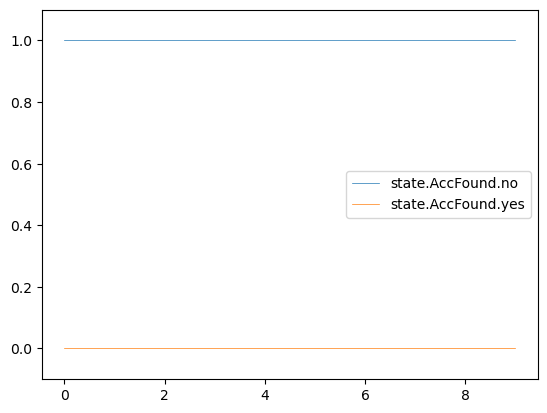

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0             1.000000              0.000000      FileRecon            Nop   
1             1.000000              0.000000   EnumAccounts   DecoyAccount   
2             0.936960              0.063040      FileRecon            Nop   
3             0.940508              0.059492           Exit            Nop   
4             0.940508              0.059492            Nop            Nop   
5             0.940508              0.059492            Nop            Nop   
6             0.940508              0.059492            Nop            Nop   
7             0.940508              0.059492            Nop            Nop   
8             0.940508              0.059492            Nop            Nop   
9             0.940508              0.059492            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                   user_files                           failure  
1                   user_files                           failure  
2                   user_files                           failure  
3                         none                           failure  
4                         none                           success  
5                         none                           failure  
6                         none                           success  
7                   user_files                           failure  
8                   user_files                           failure  
9                         none                           failure

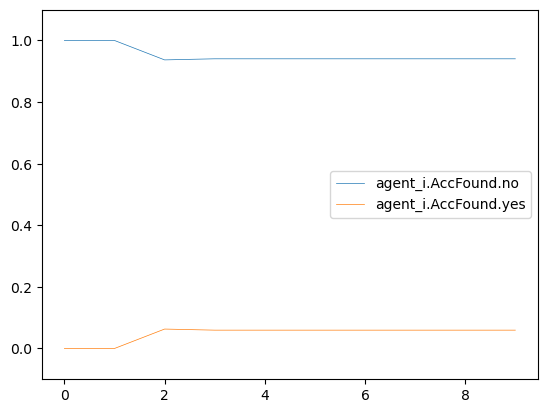

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0             1.000000              0.000000            Nop      FileRecon   
1             1.000000              0.000000   DecoyAccount   EnumAccounts   
2             0.370000              0.630000            Nop      FileRecon   
3             0.564094              0.435906            Nop           Exit   
4             0.741454              0.258546            Nop            Nop   
5             0.594362              0.405638            Nop            Nop   
6             0.594362              0.405638            Nop            Nop   
7             0.447234              0.552766            Nop            Nop   
8             0.443892              0.556109            Nop            Nop   
9             0.446263              0.553737            Nop            Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                   login_activity  
2                        file_enum  
3                             none  
4                        file_enum  
5                   login_activity  
6                       file_write  
7                        file_enum  
8                             none  
9                             none

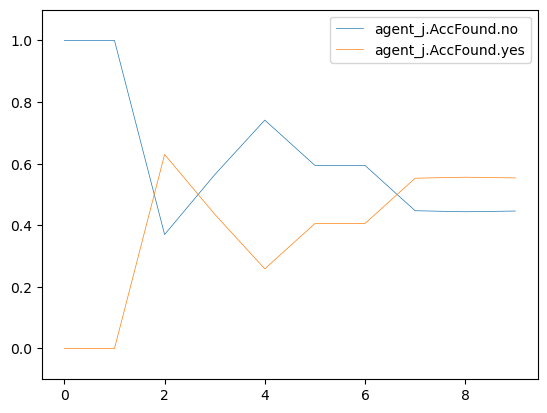

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   0.0                    1.0      FileRecon            Nop
1                   0.0                    1.0   EnumAccounts   DecoyAccount
2                   0.0                    1.0      FileRecon            Nop
3                   0.0                    1.0           Exit            Nop
4                   0.0                    1.0            Nop            Nop
5                   0.0                    1.0            Nop            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

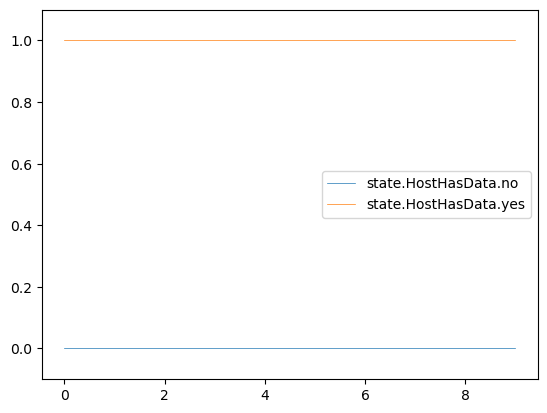

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                0.500000                 0.500000      FileRecon   
1                0.592105                 0.407895   EnumAccounts   
2                0.592105                 0.407895      FileRecon   
3                0.640620                 0.359380           Exit   
4                0.640620                 0.359380            Nop   
5                0.640620                 0.359380            Nop   
6                0.640620                 0.359380            Nop   
7                0.640620                 0.359380            Nop   
8                0.640620                 0.359380            Nop   
9                0.640620                 0.359380            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                   user_files   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_i.observation.ActionResult'  
0                           failure  
1                           failure  
2                           failure  
3                           failure  
4                           success  
5                           failure  
6                           success  
7                           failure  
8                           failure  
9                           failure

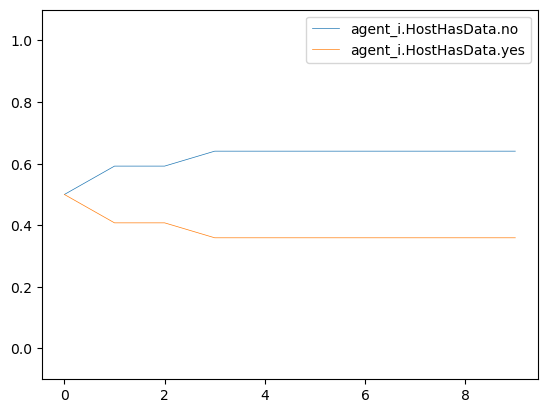

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                   login_activity  
2      FileRecon                        file_enum  
3           Exit                             none  
4            Nop                        file_enum  
5            Nop                   login_activity  
6            Nop                       file_write  
7            Nop                        file_enum  
8            Nop                             none  
9            Nop                             none

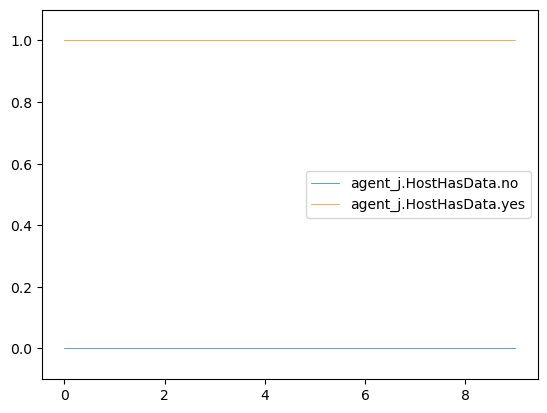

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0      FileRecon            Nop
1                    1.0                     0.0   EnumAccounts   DecoyAccount
2                    1.0                     0.0      FileRecon            Nop
3                    1.0                     0.0           Exit            Nop
4                    1.0                     0.0            Nop            Nop
5                    1.0                     0.0            Nop            Nop
6                    1.0                     0.0            Nop            Nop
7                    1.0                     0.0            Nop            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

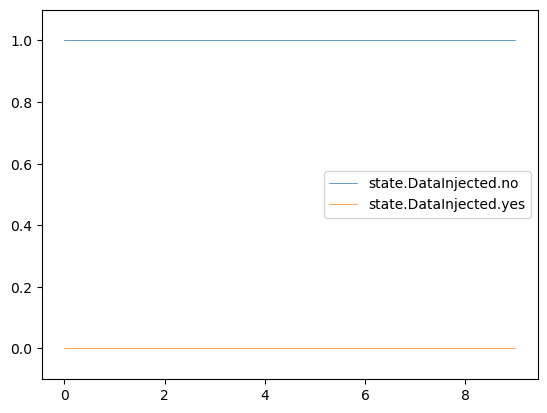

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0   EnumAccounts   
2                      1.0                       0.0      FileRecon   
3                      1.0                       0.0           Exit   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                   user_files   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_i.observation.ActionResult'  
0                           failure  
1                           failure  
2                           failure  
3                           failure  
4                           success  
5                           failure  
6                           success  
7                           failure  
8                           failure  
9                           failure

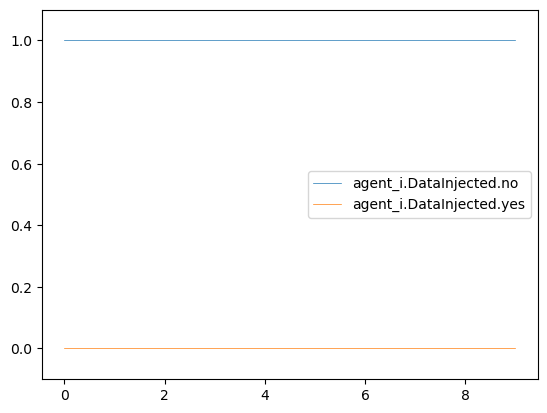

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000   DecoyAccount   
2                 1.000000                  0.000000            Nop   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 0.981128                  0.018872            Nop   
6                 0.829650                  0.170350            Nop   
7                 0.592531                  0.407469            Nop   
8                 0.584666                  0.415334            Nop   
9                 0.581635                  0.418365            Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                   login_activity  
2      FileRecon                        file_enum  
3           Exit                             none  
4            Nop                        file_enum  
5            Nop                   login_activity  
6            Nop                       file_write  
7            Nop                        file_enum  
8            Nop                             none  
9            Nop                             none

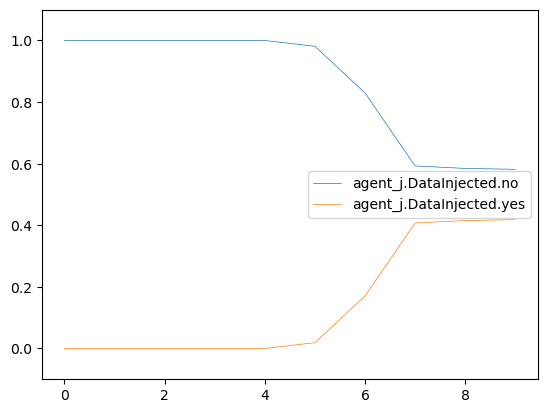

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0      FileRecon   
1                     0.0                     1.0   EnumAccounts   
2                     0.0                     1.0      FileRecon   
3                     0.0                     1.0           Exit   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

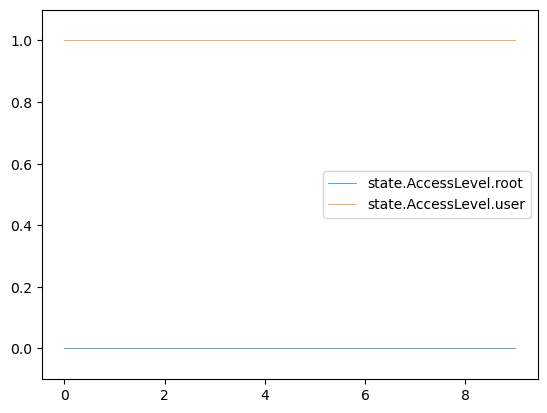

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0      FileRecon   
1                       0.0                       1.0   EnumAccounts   
2                       0.0                       1.0      FileRecon   
3                       0.0                       1.0           Exit   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                   user_files   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_i.observation.ActionResult'  
0                           failure  
1                           failure  
2                           failure  
3                           failure  
4                           success  
5                           failure  
6                           success  
7                           failure  
8                           failure  
9                           failure

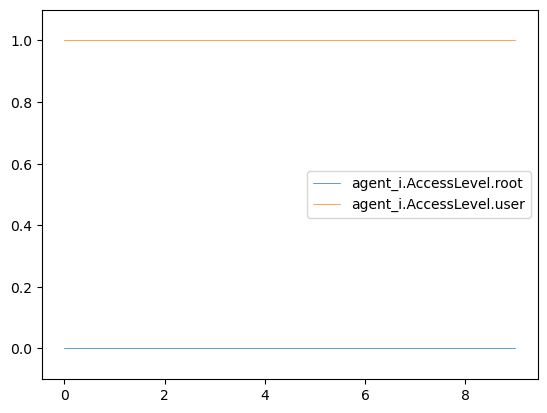

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000   DecoyAccount   
2                  0.000000                  1.000000            Nop   
3                  0.165046                  0.834954            Nop   
4                  0.067158                  0.932842            Nop   
5                  0.253937                  0.746063            Nop   
6                  0.253937                  0.746063            Nop   
7                  0.438619                  0.561382            Nop   
8                  0.442815                  0.557185            Nop   
9                  0.439839                  0.560161            Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                   login_activity  
2      FileRecon                        file_enum  
3           Exit                             none  
4            Nop                        file_enum  
5            Nop                   login_activity  
6            Nop                       file_write  
7            Nop                        file_enum  
8            Nop                             none  
9            Nop                             none

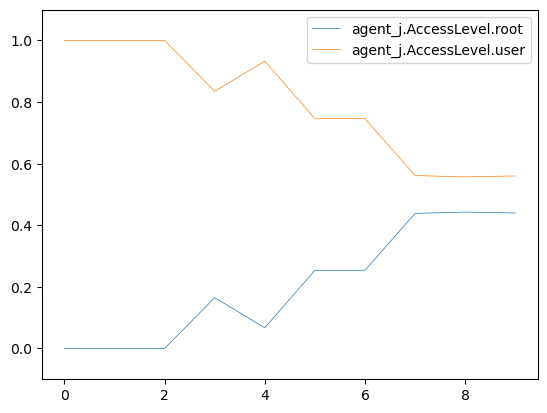

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0      FileRecon            Nop  
1                      1.0   EnumAccounts   DecoyAccount  
2                      1.0      FileRecon            Nop  
3                      1.0           Exit            Nop  
4                      1.0            Nop            Nop  
5                      1.0            Nop            Nop  
6                      1.0            Nop            Nop  
7                      1.0            Nop            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

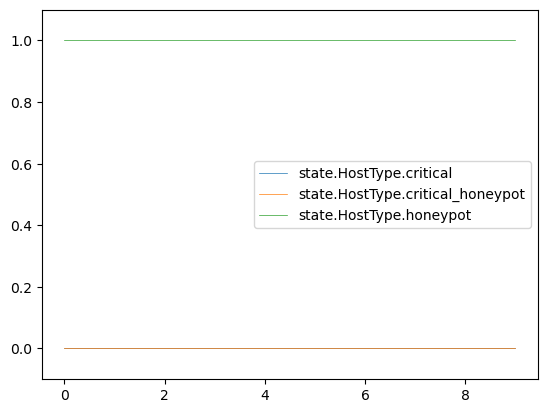

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.700000                                 0.0   
2                   0.875504                                 0.0   
3                   0.942558                                 0.0   
4                   0.942558                                 0.0   
5                   0.942558                                 0.0   
6                   0.942558                                 0.0   
7                   0.942558                                 0.0   
8                   0.942558                                 0.0   
9                   0.942558                                 0.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                   0.500000      FileRecon            Nop   
1                   0.300000   EnumAccounts   DecoyAccount   
2                   0.124496      FileRecon            Nop   
3                   0.057442           Exit            Nop   
4                   0.057442            Nop            Nop   
5                   0.057442            Nop            Nop   
6                   0.057442            Nop            Nop   
7                   0.057442            Nop            Nop   
8                   0.057442            Nop            Nop   
9                   0.057442            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                   user_files                           failure  
1                   user_files                           failure  
2                   user_files                           failure  
3                         none                           failure  
4                         none                           success  
5                         none                           failure  
6                         none                           success  
7                   user_files                           failure  
8                   user_files                           failure  
9                         none                           failure

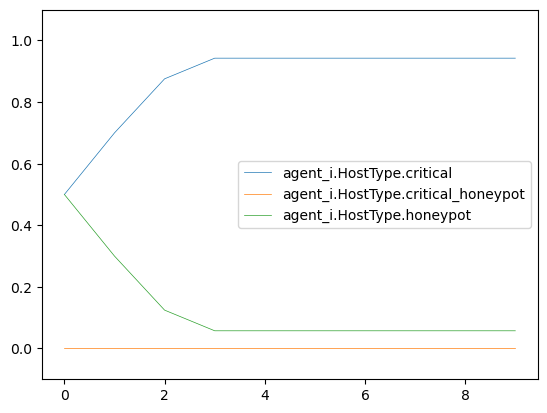

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                        1.0            Nop      FileRecon   
1                        1.0   DecoyAccount   EnumAccounts   
2                        1.0            Nop      FileRecon   
3                        1.0            Nop           Exit   
4                        1.0            Nop            Nop   
5                        1.0            Nop            Nop   
6                        1.0            Nop            Nop   
7                        1.0            Nop            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                   login_activity  
2                        file_enum  
3                             none  
4                        file_enum  
5                   login_activity  
6                       file_write  
7                        file_enum  
8                             none  
9                             none

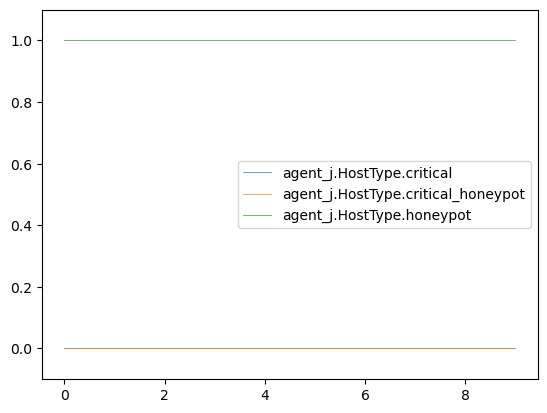

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0      FileRecon            Nop
1                 0.0                  1.0   EnumAccounts   DecoyAccount
2                 0.0                  1.0      FileRecon            Nop
3                 0.0                  1.0           Exit            Nop
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

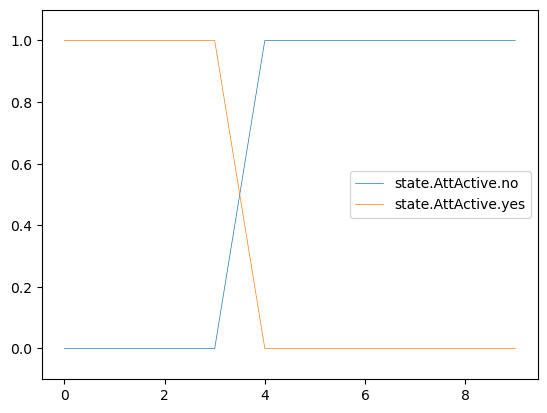

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0                   0.0                    1.0      FileRecon            Nop   
1                   0.0                    1.0   EnumAccounts   DecoyAccount   
2                   0.0                    1.0      FileRecon            Nop   
3                   0.0                    1.0           Exit            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                   user_files                           failure  
1                   user_files                           failure  
2                   user_files                           failure  
3                         none                           failure  
4                         none                           success  
5                         none                           failure  
6                         none                           success  
7                   user_files                           failure  
8                   user_files                           failure  
9                         none                           failure

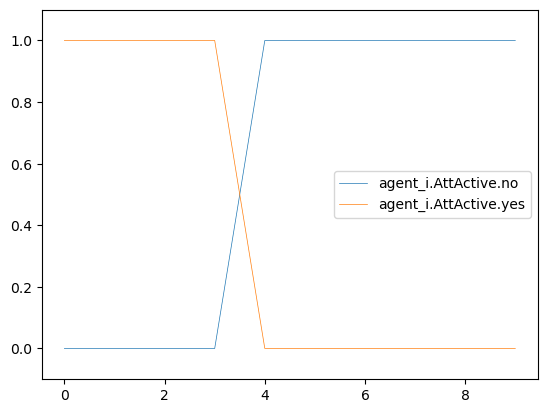

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0              0.000000               1.000000            Nop      FileRecon   
1              0.000000               1.000000   DecoyAccount   EnumAccounts   
2              0.000000               1.000000            Nop      FileRecon   
3              0.000029               0.999971            Nop           Exit   
4              0.899519               0.100481            Nop            Nop   
5              0.736907               0.263093            Nop            Nop   
6              0.764192               0.235808            Nop            Nop   
7              0.695106               0.304894            Nop            Nop   
8              0.979953               0.020047            Nop            Nop   
9              0.999110               0.000890            Nop            Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                   login_activity  
2                        file_enum  
3                             none  
4                        file_enum  
5                   login_activity  
6                       file_write  
7                        file_enum  
8                             none  
9                             none

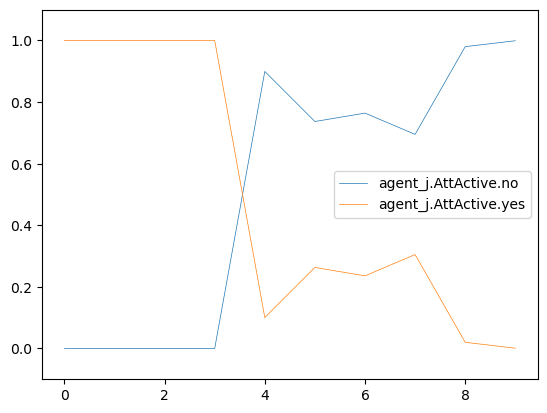

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   1.0                   0.0      FileRecon            Nop
1                   1.0                   0.0   EnumAccounts   DecoyAccount
2                   1.0                   0.0      FileRecon            Nop
3                   1.0                   0.0           Exit            Nop
4                   1.0                   0.0            Nop            Nop
5                   1.0                   0.0            Nop            Nop
6                   1.0                   0.0            Nop            Nop
7                   1.0                   0.0            Nop            Nop
8                   1.0                   0.0            Nop            Nop
9                   1.0                   0.0            Nop            Nop

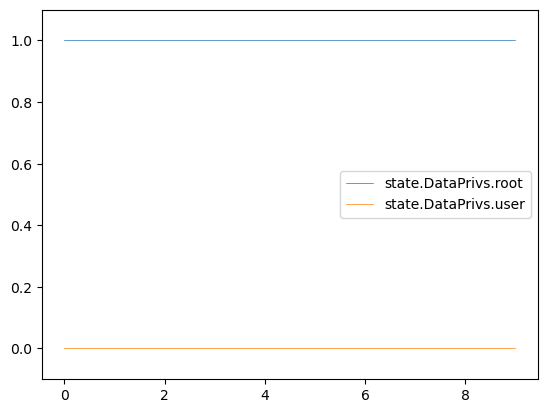

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                0.500000                0.500000      FileRecon   
1                0.592105                0.407895   EnumAccounts   
2                0.592105                0.407895      FileRecon   
3                0.640620                0.359380           Exit   
4                0.640620                0.359380            Nop   
5                0.640620                0.359380            Nop   
6                0.640620                0.359380            Nop   
7                0.640620                0.359380            Nop   
8                0.640620                0.359380            Nop   
9                0.640620                0.359380            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                   user_files   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_i.observation.ActionResult'  
0                           failure  
1                           failure  
2                           failure  
3                           failure  
4                           success  
5                           failure  
6                           success  
7                           failure  
8                           failure  
9                           failure

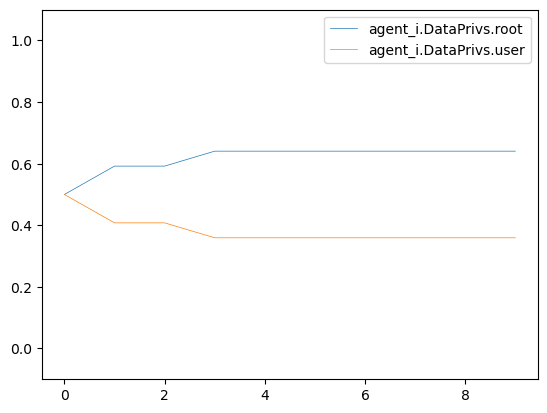

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                   login_activity  
2      FileRecon                        file_enum  
3           Exit                             none  
4            Nop                        file_enum  
5            Nop                   login_activity  
6            Nop                       file_write  
7            Nop                        file_enum  
8            Nop                             none  
9            Nop                             none

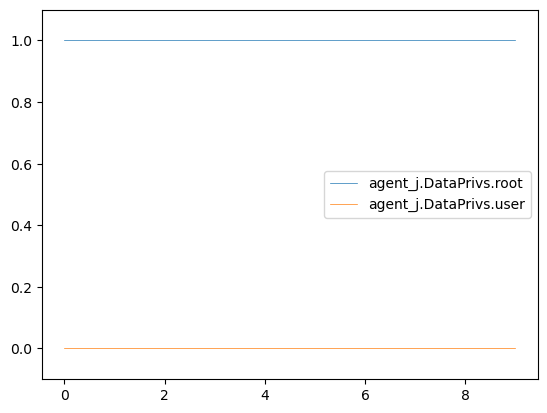

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.577778                        0.422222   
3                         0.758655                        0.241345   
4                         0.430978                        0.569022   
5                         0.389787                        0.610213   
6                         0.567044                        0.432956   
7                         0.654475                        0.345525   
8                         0.660972                        0.339028   
9                         0.654422                        0.345578   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           success  
2                         none                           failure  
3                         none                           failure  
4                         none                           failure  
5                         none                           success  
6                         none                           success  
7                         none                           failure  
8                   user_files                           success  
9                         none                           success

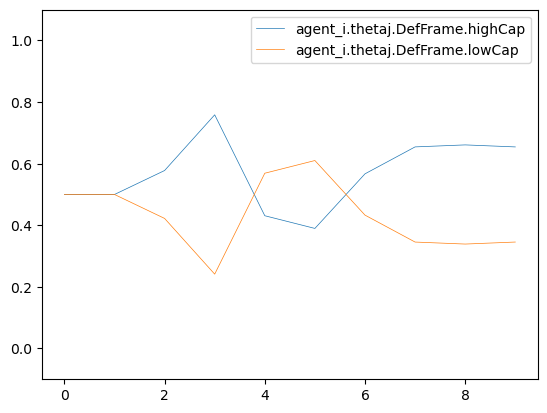

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'
0                               1.0                   login_activity
1                               1.0                        file_enum
2                               1.0                        file_enum
3                               1.0                   login_activity
4                               1.0                        file_enum
5                               1.0                        file_enum
6                               1.0                   login_activity
7                               1.0                        file_enum
8                               1.0                             none
9                               1.0                       file_write

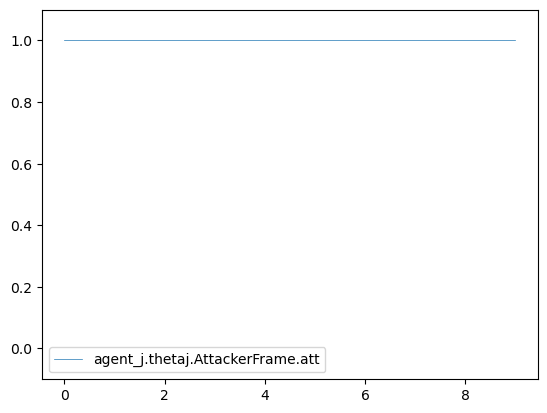

=============DataFound============


state.DataFound.no  state.DataFound.yes  agent_i.action agent_j.action
0                 1.0                  0.0       FileRecon            Nop
1                 1.0                  0.0    EnumAccounts   DecoyAccount
2                 1.0                  0.0      PrivEscAcc            Nop
3                 1.0                  0.0      PrivEscAcc            Nop
4                 1.0                  0.0       FileRecon            Nop
5                 1.0                  0.0    EnumAccounts            Nop
6                 1.0                  0.0      PrivEscAcc            Nop
7                 1.0                  0.0       FileRecon            Nop
8                 0.0                  1.0       FileRecon            Nop
9                 0.0                  1.0  ManipulateData            Nop

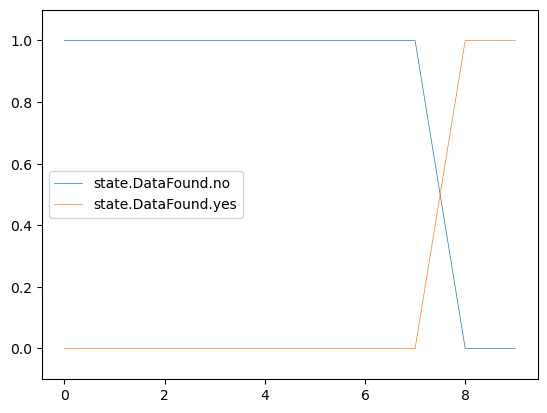

agent_i.DataFound.no  agent_i.DataFound.yes  agent_i.action agent_j.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.976974               0.023026    EnumAccounts   DecoyAccount   
2              0.976974               0.023026      PrivEscAcc            Nop   
3              0.976974               0.023026      PrivEscAcc            Nop   
4              0.976974               0.023026       FileRecon            Nop   
5              0.989734               0.010266    EnumAccounts            Nop   
6              0.989723               0.010277      PrivEscAcc            Nop   
7              0.989714               0.010286       FileRecon            Nop   
8              0.963451               0.036549       FileRecon            Nop   
9              0.423900               0.576100  ManipulateData            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           success  
2                         none                           failure  
3                         none                           failure  
4                         none                           failure  
5                         none                           success  
6                         none                           success  
7                         none                           failure  
8                   user_files                           success  
9                         none                           success

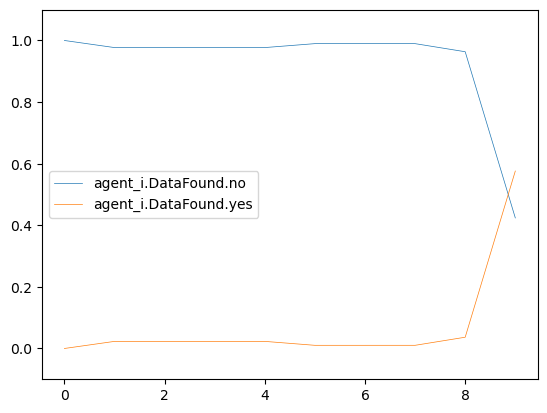

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action  agent_i.action  \
0              1.000000               0.000000            Nop       FileRecon   
1              1.000000               0.000000   DecoyAccount    EnumAccounts   
2              1.000000               0.000000            Nop      PrivEscAcc   
3              1.000000               0.000000            Nop      PrivEscAcc   
4              0.877178               0.122822            Nop       FileRecon   
5              0.504929               0.495071            Nop    EnumAccounts   
6              0.306139               0.693861            Nop      PrivEscAcc   
7              0.231436               0.768564            Nop       FileRecon   
8              0.230418               0.769582            Nop       FileRecon   
9              0.232081               0.767919            Nop  ManipulateData   

  agent_j.observation.EndPtAlerts'  
0                   login_activity  
1                        file_enum  
2                        file_enum  
3                   login_activity  
4                        file_enum  
5                        file_enum  
6                   login_activity  
7                        file_enum  
8                             none  
9                       file_write

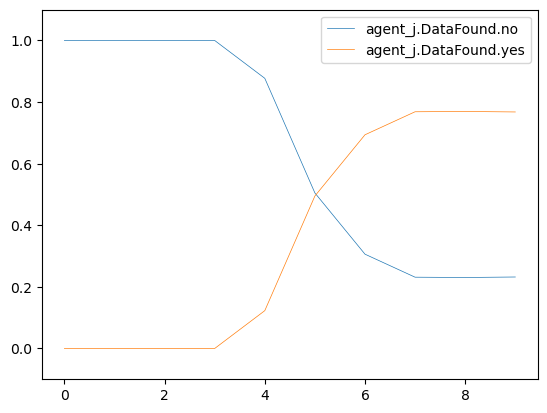

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes  agent_i.action agent_j.action
0                   1.0                    0.0       FileRecon            Nop
1                   1.0                    0.0    EnumAccounts   DecoyAccount
2                   0.0                    1.0      PrivEscAcc            Nop
3                   0.0                    1.0      PrivEscAcc            Nop
4                   0.0                    1.0       FileRecon            Nop
5                   0.0                    1.0    EnumAccounts            Nop
6                   0.0                    1.0      PrivEscAcc            Nop
7                   0.0                    1.0       FileRecon            Nop
8                   0.0                    1.0       FileRecon            Nop
9                   0.0                    1.0  ManipulateData            Nop

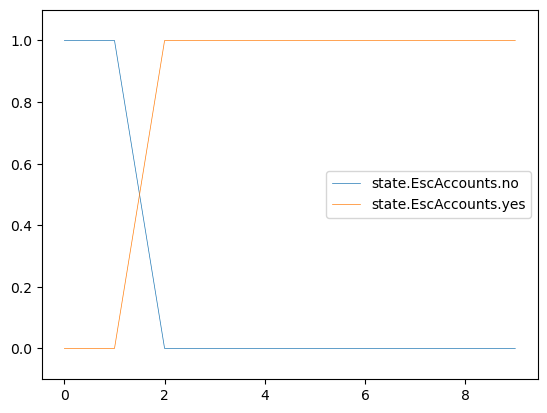

agent_i.EscAccounts.no  agent_i.EscAccounts.yes  agent_i.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.083333                 0.916667      PrivEscAcc   
3                0.277130                 0.722870      PrivEscAcc   
4                0.656560                 0.343440       FileRecon   
5                0.610211                 0.389789    EnumAccounts   
6                0.167829                 0.832171      PrivEscAcc   
7                0.000211                 0.999789       FileRecon   
8                0.000242                 0.999758       FileRecon   
9                0.000140                 0.999860  ManipulateData   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                   user_files   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                         none   

  agent_i.observation.ActionResult'  
0                           failure  
1                           success  
2                           failure  
3                           failure  
4                           failure  
5                           success  
6                           success  
7                           failure  
8                           success  
9                           success

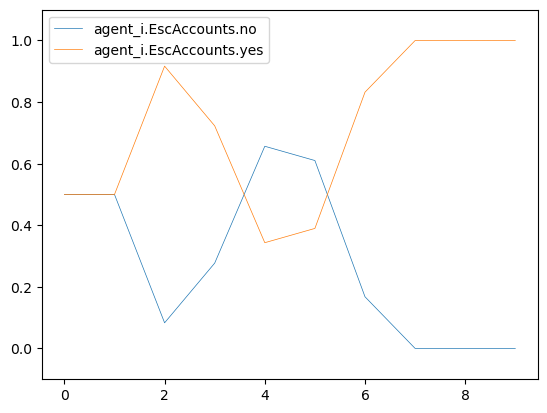

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                   login_activity  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                        file_enum  
5    EnumAccounts                        file_enum  
6      PrivEscAcc                   login_activity  
7       FileRecon                        file_enum  
8       FileRecon                             none  
9  ManipulateData                       file_write

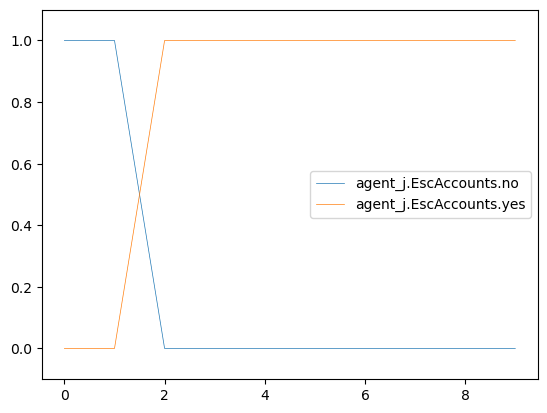

=============AccFound============


state.AccFound.no  state.AccFound.yes  agent_i.action agent_j.action
0                1.0                 0.0       FileRecon            Nop
1                1.0                 0.0    EnumAccounts   DecoyAccount
2                1.0                 0.0      PrivEscAcc            Nop
3                1.0                 0.0      PrivEscAcc            Nop
4                1.0                 0.0       FileRecon            Nop
5                1.0                 0.0    EnumAccounts            Nop
6                0.0                 1.0      PrivEscAcc            Nop
7                0.0                 1.0       FileRecon            Nop
8                0.0                 1.0       FileRecon            Nop
9                0.0                 1.0  ManipulateData            Nop

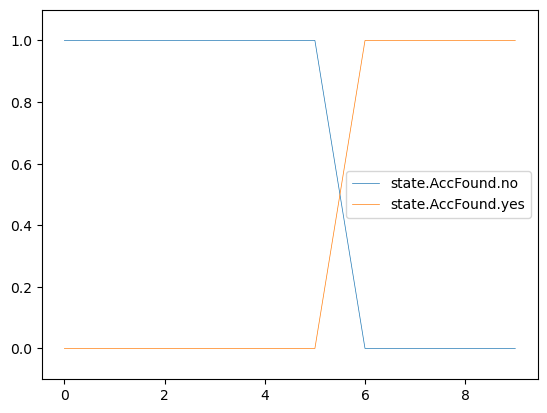

agent_i.AccFound.no  agent_i.AccFound.yes  agent_i.action agent_j.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000    EnumAccounts   DecoyAccount   
2             0.125000              0.875000      PrivEscAcc            Nop   
3             0.415696              0.584304      PrivEscAcc            Nop   
4             0.984840              0.015160       FileRecon            Nop   
5             0.990419              0.009581    EnumAccounts            Nop   
6             0.205027              0.794973      PrivEscAcc            Nop   
7             0.000258              0.999742       FileRecon            Nop   
8             0.000302              0.999699       FileRecon            Nop   
9             0.000171              0.999829  ManipulateData            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           success  
2                         none                           failure  
3                         none                           failure  
4                         none                           failure  
5                         none                           success  
6                         none                           success  
7                         none                           failure  
8                   user_files                           success  
9                         none                           success

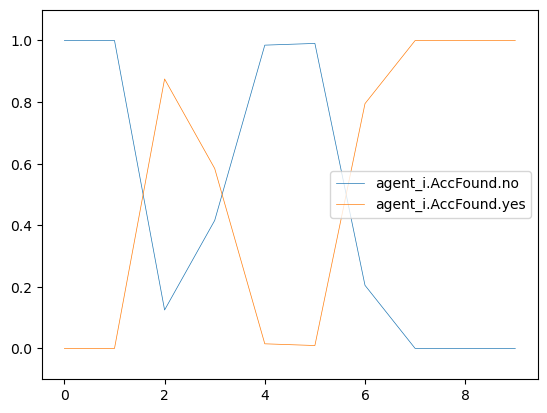

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action  agent_i.action  \
0             1.000000              0.000000            Nop       FileRecon   
1             1.000000              0.000000   DecoyAccount    EnumAccounts   
2             0.310937              0.689063            Nop      PrivEscAcc   
3             0.619900              0.380100            Nop      PrivEscAcc   
4             0.549576              0.450424            Nop       FileRecon   
5             0.265774              0.734227            Nop    EnumAccounts   
6             0.119749              0.880251            Nop      PrivEscAcc   
7             0.119749              0.880251            Nop       FileRecon   
8             0.118343              0.881657            Nop       FileRecon   
9             0.119341              0.880658            Nop  ManipulateData   

  agent_j.observation.EndPtAlerts'  
0                   login_activity  
1                        file_enum  
2                        file_enum  
3                   login_activity  
4                        file_enum  
5                        file_enum  
6                   login_activity  
7                        file_enum  
8                             none  
9                       file_write

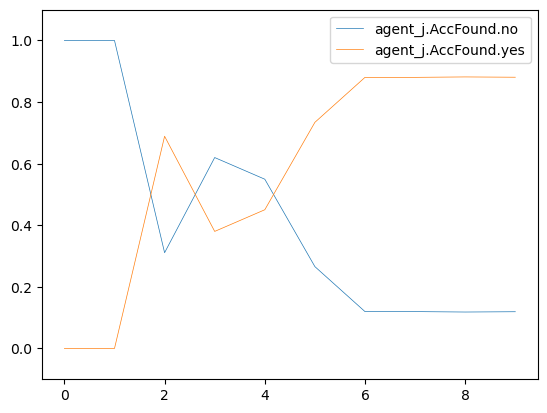

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes  agent_i.action agent_j.action
0                   0.0                    1.0       FileRecon            Nop
1                   0.0                    1.0    EnumAccounts   DecoyAccount
2                   0.0                    1.0      PrivEscAcc            Nop
3                   0.0                    1.0      PrivEscAcc            Nop
4                   0.0                    1.0       FileRecon            Nop
5                   0.0                    1.0    EnumAccounts            Nop
6                   0.0                    1.0      PrivEscAcc            Nop
7                   0.0                    1.0       FileRecon            Nop
8                   0.0                    1.0       FileRecon            Nop
9                   0.0                    1.0  ManipulateData            Nop

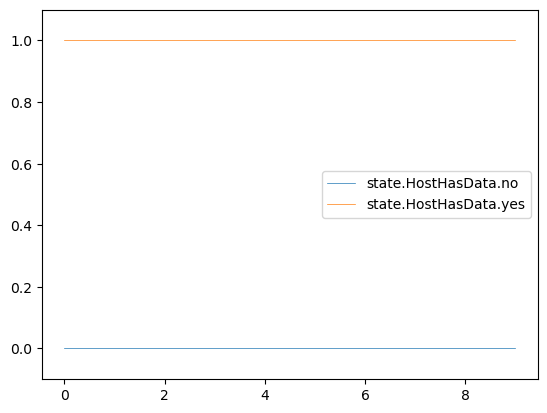

agent_i.HostHasData.no  agent_i.HostHasData.yes  agent_i.action  \
0                0.500000                 0.500000       FileRecon   
1                0.592105                 0.407895    EnumAccounts   
2                0.592105                 0.407895      PrivEscAcc   
3                0.592105                 0.407895      PrivEscAcc   
4                0.592105                 0.407895       FileRecon   
5                0.640733                 0.359267    EnumAccounts   
6                0.640785                 0.359215      PrivEscAcc   
7                0.640827                 0.359173       FileRecon   
8                0.828060                 0.171940       FileRecon   
9                0.404054                 0.595946  ManipulateData   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                   user_files   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                         none   

  agent_i.observation.ActionResult'  
0                           failure  
1                           success  
2                           failure  
3                           failure  
4                           failure  
5                           success  
6                           success  
7                           failure  
8                           success  
9                           success

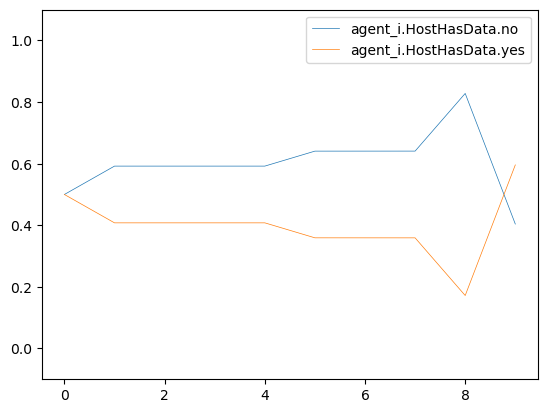

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                   login_activity  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                        file_enum  
5    EnumAccounts                        file_enum  
6      PrivEscAcc                   login_activity  
7       FileRecon                        file_enum  
8       FileRecon                             none  
9  ManipulateData                       file_write

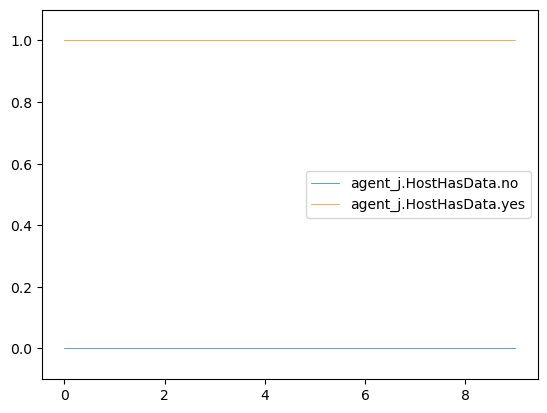

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes  agent_i.action  \
0                    1.0                     0.0       FileRecon   
1                    1.0                     0.0    EnumAccounts   
2                    1.0                     0.0      PrivEscAcc   
3                    1.0                     0.0      PrivEscAcc   
4                    1.0                     0.0       FileRecon   
5                    1.0                     0.0    EnumAccounts   
6                    1.0                     0.0      PrivEscAcc   
7                    1.0                     0.0       FileRecon   
8                    1.0                     0.0       FileRecon   
9                    1.0                     0.0  ManipulateData   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

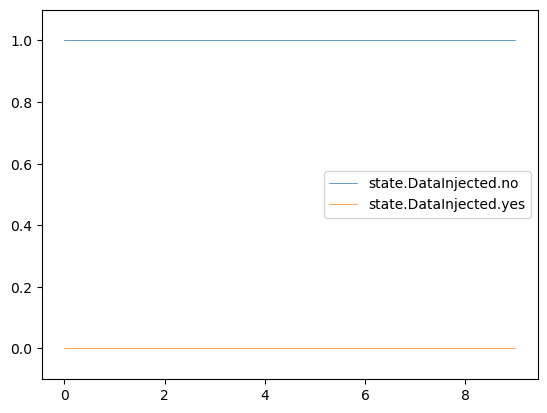

agent_i.DataInjected.no  agent_i.DataInjected.yes  agent_i.action  \
0                      1.0                       0.0       FileRecon   
1                      1.0                       0.0    EnumAccounts   
2                      1.0                       0.0      PrivEscAcc   
3                      1.0                       0.0      PrivEscAcc   
4                      1.0                       0.0       FileRecon   
5                      1.0                       0.0    EnumAccounts   
6                      1.0                       0.0      PrivEscAcc   
7                      1.0                       0.0       FileRecon   
8                      1.0                       0.0       FileRecon   
9                      1.0                       0.0  ManipulateData   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                   user_files   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                         none   

  agent_i.observation.ActionResult'  
0                           failure  
1                           success  
2                           failure  
3                           failure  
4                           failure  
5                           success  
6                           success  
7                           failure  
8                           success  
9                           success

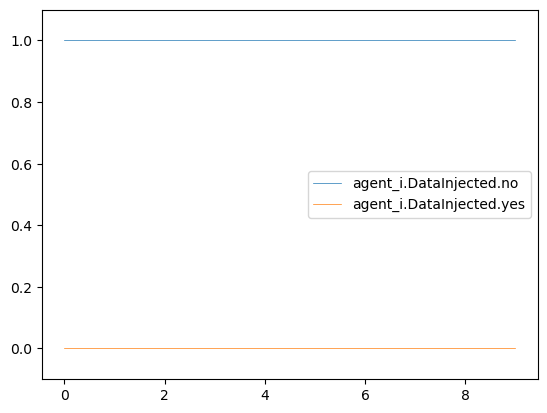

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000   DecoyAccount   
2                 1.000000                  0.000000            Nop   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 0.950085                  0.049915            Nop   
6                 0.797046                  0.202954            Nop   
7                 0.355244                  0.644756            Nop   
8                 0.264616                  0.735383            Nop   
9                 0.257124                  0.742875            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                   login_activity  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                        file_enum  
5    EnumAccounts                        file_enum  
6      PrivEscAcc                   login_activity  
7       FileRecon                        file_enum  
8       FileRecon                             none  
9  ManipulateData                       file_write

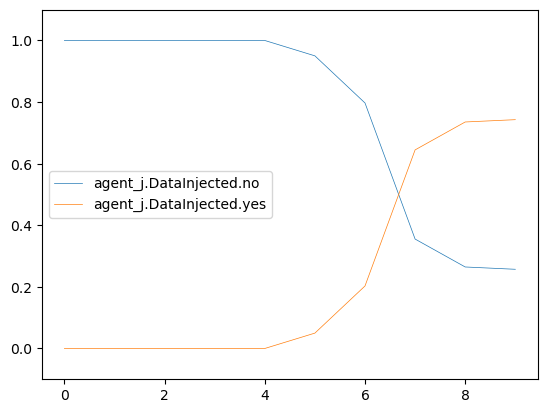

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user  agent_i.action  \
0                     0.0                     1.0       FileRecon   
1                     0.0                     1.0    EnumAccounts   
2                     0.0                     1.0      PrivEscAcc   
3                     0.0                     1.0      PrivEscAcc   
4                     0.0                     1.0       FileRecon   
5                     0.0                     1.0    EnumAccounts   
6                     0.0                     1.0      PrivEscAcc   
7                     1.0                     0.0       FileRecon   
8                     1.0                     0.0       FileRecon   
9                     1.0                     0.0  ManipulateData   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

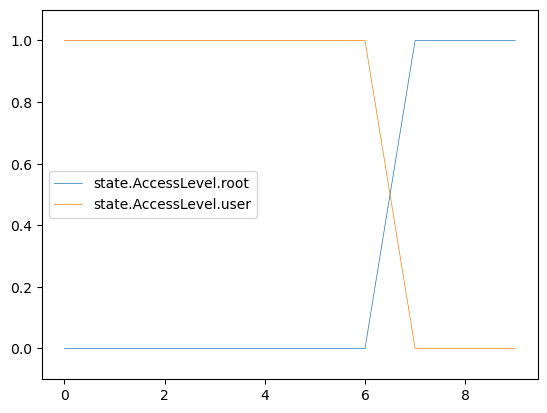

agent_i.AccessLevel.root  agent_i.AccessLevel.user  agent_i.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.002330                  0.997670      PrivEscAcc   
4                  0.001372                  0.998628       FileRecon   
5                  0.000710                  0.999290    EnumAccounts   
6                  0.001032                  0.998968      PrivEscAcc   
7                  0.999742                  0.000258       FileRecon   
8                  0.999699                  0.000302       FileRecon   
9                  0.999829                  0.000171  ManipulateData   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                   user_files   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                         none   

  agent_i.observation.ActionResult'  
0                           failure  
1                           success  
2                           failure  
3                           failure  
4                           failure  
5                           success  
6                           success  
7                           failure  
8                           success  
9                           success

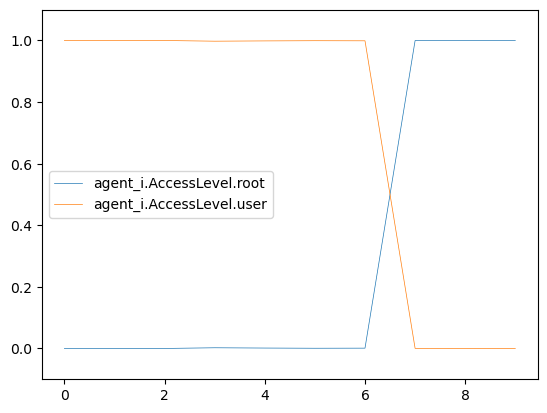

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000   DecoyAccount   
2                  0.000000                  1.000000            Nop   
3                  0.199936                  0.800064            Nop   
4                  0.311791                  0.688209            Nop   
5                  0.671626                  0.328374            Nop   
6                  0.852071                  0.147929            Nop   
7                  0.852071                  0.147929            Nop   
8                  0.853809                  0.146191            Nop   
9                  0.852575                  0.147424            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                   login_activity  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                        file_enum  
5    EnumAccounts                        file_enum  
6      PrivEscAcc                   login_activity  
7       FileRecon                        file_enum  
8       FileRecon                             none  
9  ManipulateData                       file_write

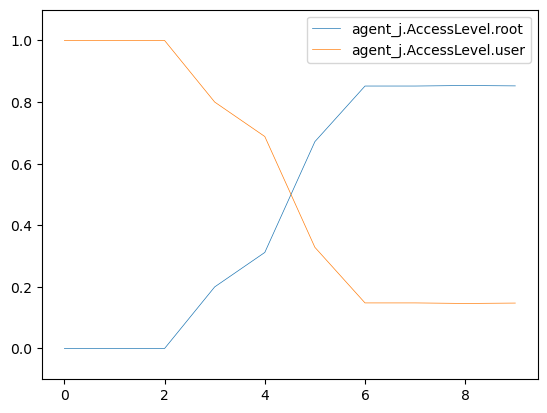

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot  agent_i.action agent_j.action  
0                      1.0       FileRecon            Nop  
1                      1.0    EnumAccounts   DecoyAccount  
2                      1.0      PrivEscAcc            Nop  
3                      1.0      PrivEscAcc            Nop  
4                      1.0       FileRecon            Nop  
5                      1.0    EnumAccounts            Nop  
6                      1.0      PrivEscAcc            Nop  
7                      1.0       FileRecon            Nop  
8                      1.0       FileRecon            Nop  
9                      1.0  ManipulateData            Nop

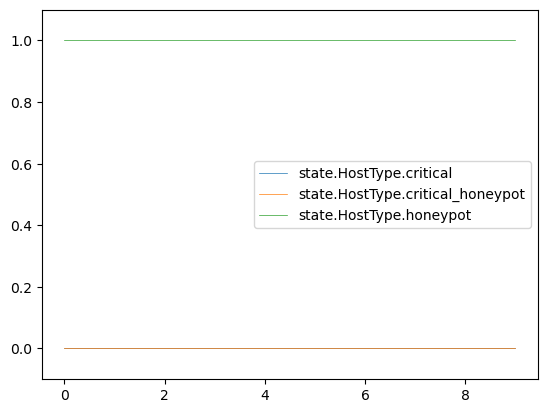

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.300000                                 0.0   
2                   0.422222                                 0.0   
3                   0.822736                                 0.0   
4                   0.584174                                 0.0   
5                   0.375703                                 0.0   
6                   0.148162                                 0.0   
7                   0.124581                                 0.0   
8                   0.057553                                 0.0   
9                   0.124343                                 0.0   

   agent_i.HostType.honeypot  agent_i.action agent_j.action  \
0                   0.500000       FileRecon            Nop   
1                   0.700000    EnumAccounts   DecoyAccount   
2                   0.577778      PrivEscAcc            Nop   
3                   0.177264      PrivEscAcc            Nop   
4                   0.415826       FileRecon            Nop   
5                   0.624297    EnumAccounts            Nop   
6                   0.851838      PrivEscAcc            Nop   
7                   0.875419       FileRecon            Nop   
8                   0.942447       FileRecon            Nop   
9                   0.875657  ManipulateData            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           success  
2                         none                           failure  
3                         none                           failure  
4                         none                           failure  
5                         none                           success  
6                         none                           success  
7                         none                           failure  
8                   user_files                           success  
9                         none                           success

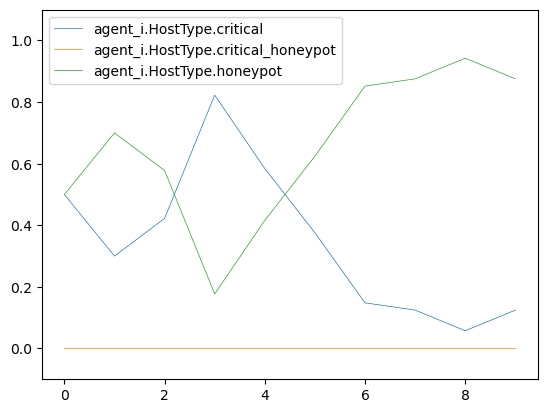

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot agent_j.action  agent_i.action  \
0                        1.0            Nop       FileRecon   
1                        1.0   DecoyAccount    EnumAccounts   
2                        1.0            Nop      PrivEscAcc   
3                        1.0            Nop      PrivEscAcc   
4                        1.0            Nop       FileRecon   
5                        1.0            Nop    EnumAccounts   
6                        1.0            Nop      PrivEscAcc   
7                        1.0            Nop       FileRecon   
8                        1.0            Nop       FileRecon   
9                        1.0            Nop  ManipulateData   

  agent_j.observation.EndPtAlerts'  
0                   login_activity  
1                        file_enum  
2                        file_enum  
3                   login_activity  
4                        file_enum  
5                        file_enum  
6                   login_activity  
7                        file_enum  
8                             none  
9                       file_write

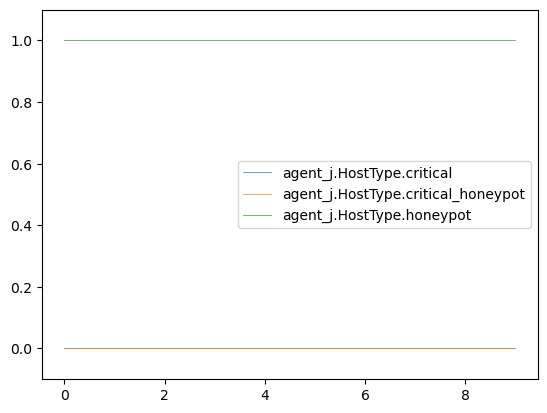

=============AttActive============


state.AttActive.no  state.AttActive.yes  agent_i.action agent_j.action
0                 0.0                  1.0       FileRecon            Nop
1                 0.0                  1.0    EnumAccounts   DecoyAccount
2                 0.0                  1.0      PrivEscAcc            Nop
3                 0.0                  1.0      PrivEscAcc            Nop
4                 0.0                  1.0       FileRecon            Nop
5                 0.0                  1.0    EnumAccounts            Nop
6                 0.0                  1.0      PrivEscAcc            Nop
7                 0.0                  1.0       FileRecon            Nop
8                 0.0                  1.0       FileRecon            Nop
9                 0.0                  1.0  ManipulateData            Nop

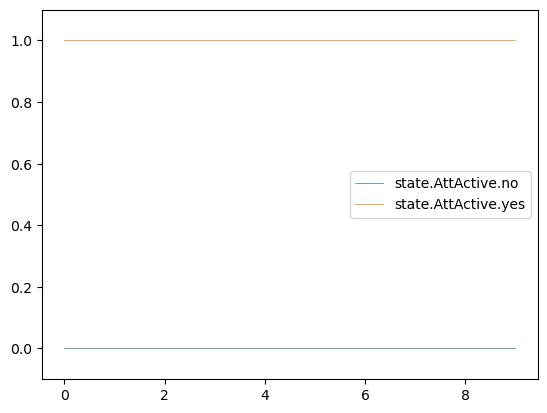

agent_i.AttActive.no  agent_i.AttActive.yes  agent_i.action agent_j.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0    EnumAccounts   DecoyAccount   
2                   0.0                    1.0      PrivEscAcc            Nop   
3                   0.0                    1.0      PrivEscAcc            Nop   
4                   0.0                    1.0       FileRecon            Nop   
5                   0.0                    1.0    EnumAccounts            Nop   
6                   0.0                    1.0      PrivEscAcc            Nop   
7                   0.0                    1.0       FileRecon            Nop   
8                   0.0                    1.0       FileRecon            Nop   
9                   0.0                    1.0  ManipulateData            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           success  
2                         none                           failure  
3                         none                           failure  
4                         none                           failure  
5                         none                           success  
6                         none                           success  
7                         none                           failure  
8                   user_files                           success  
9                         none                           success

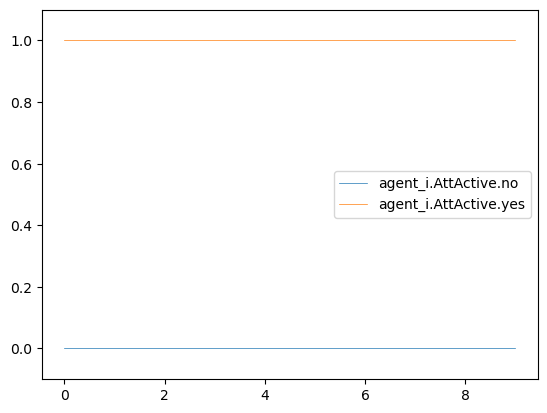

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action  agent_i.action  \
0              0.000000               1.000000            Nop       FileRecon   
1              0.000000               1.000000   DecoyAccount    EnumAccounts   
2              0.000000               1.000000            Nop      PrivEscAcc   
3              0.000005               0.999995            Nop      PrivEscAcc   
4              0.596566               0.403434            Nop       FileRecon   
5              0.307005               0.692996            Nop    EnumAccounts   
6              0.169405               0.830595            Nop      PrivEscAcc   
7              0.400445               0.599555            Nop       FileRecon   
8              0.884803               0.115196            Nop       FileRecon   
9              0.998593               0.001407            Nop  ManipulateData   

  agent_j.observation.EndPtAlerts'  
0                   login_activity  
1                        file_enum  
2                        file_enum  
3                   login_activity  
4                        file_enum  
5                        file_enum  
6                   login_activity  
7                        file_enum  
8                             none  
9                       file_write

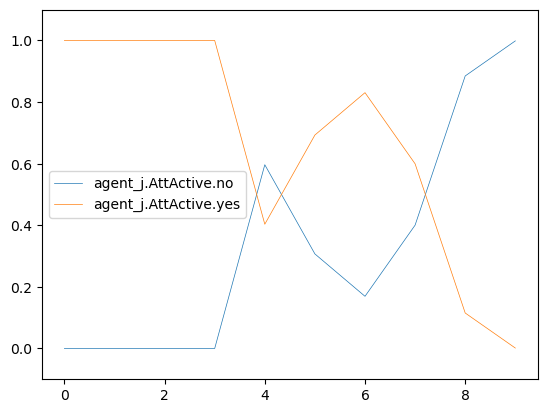

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user  agent_i.action agent_j.action
0                   1.0                   0.0       FileRecon            Nop
1                   1.0                   0.0    EnumAccounts   DecoyAccount
2                   1.0                   0.0      PrivEscAcc            Nop
3                   1.0                   0.0      PrivEscAcc            Nop
4                   1.0                   0.0       FileRecon            Nop
5                   1.0                   0.0    EnumAccounts            Nop
6                   1.0                   0.0      PrivEscAcc            Nop
7                   1.0                   0.0       FileRecon            Nop
8                   1.0                   0.0       FileRecon            Nop
9                   1.0                   0.0  ManipulateData            Nop

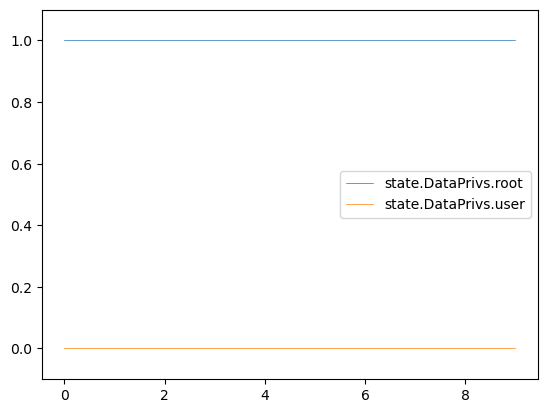

agent_i.DataPrivs.root  agent_i.DataPrivs.user  agent_i.action  \
0                0.500000                0.500000       FileRecon   
1                0.592105                0.407895    EnumAccounts   
2                0.592105                0.407895      PrivEscAcc   
3                0.592105                0.407895      PrivEscAcc   
4                0.592105                0.407895       FileRecon   
5                0.640557                0.359443    EnumAccounts   
6                0.640528                0.359472      PrivEscAcc   
7                0.640504                0.359496       FileRecon   
8                0.570422                0.429578       FileRecon   
9                0.742784                0.257216  ManipulateData   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                   user_files   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                         none   

  agent_i.observation.ActionResult'  
0                           failure  
1                           success  
2                           failure  
3                           failure  
4                           failure  
5                           success  
6                           success  
7                           failure  
8                           success  
9                           success

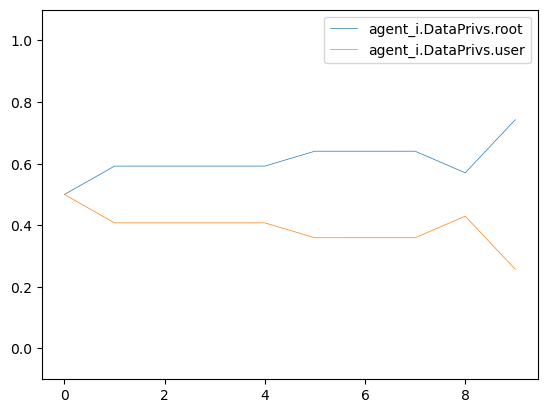

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                   login_activity  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                        file_enum  
5    EnumAccounts                        file_enum  
6      PrivEscAcc                   login_activity  
7       FileRecon                        file_enum  
8       FileRecon                             none  
9  ManipulateData                       file_write

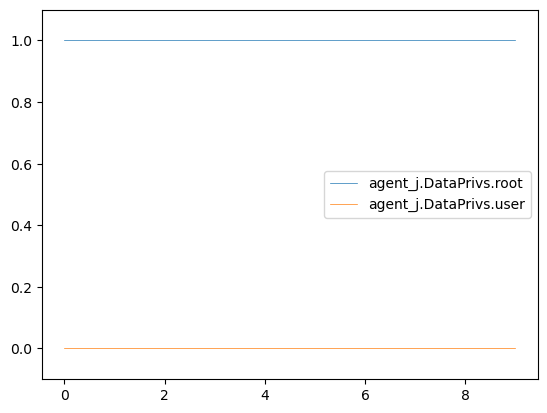

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.618685                        0.381315   
3                         0.628194                        0.371806   
4                         0.649608                        0.350392   
5                         0.649614                        0.350386   
6                         0.649614                        0.350386   
7                         0.649614                        0.350386   
8                         0.649614                        0.350386   
9                         0.649614                        0.350386   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                   user_files                           success  
3                         none                           success  
4                         none                           success  
5                   user_files                           failure  
6                   user_files                           failure  
7                   user_files                           failure  
8                         none                           failure  
9                         none                           failure

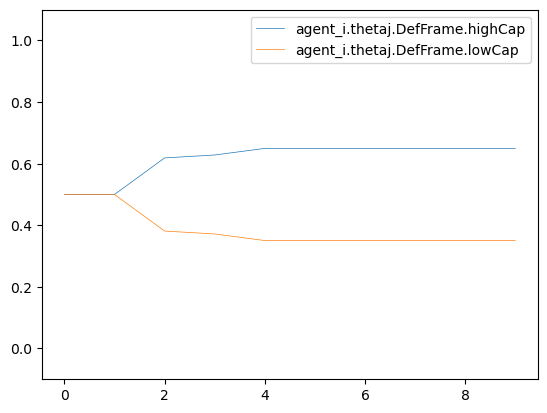

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                   login_activity
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                   login_activity
7                               1.0                             none
8                               1.0                   login_activity
9                               1.0                             none

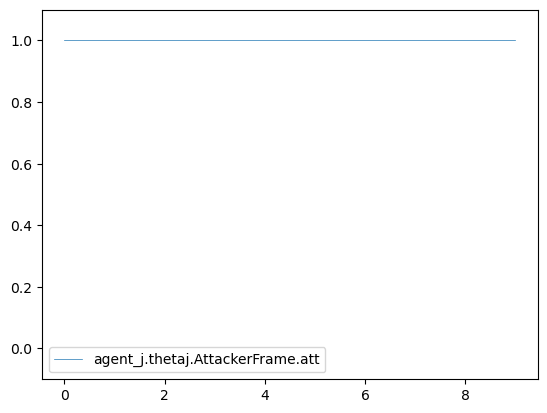

=============DataFound============


state.DataFound.no  state.DataFound.yes  agent_i.action agent_j.action
0                 1.0                  0.0       FileRecon            Nop
1                 1.0                  0.0    EnumAccounts   DecoyAccount
2                 1.0                  0.0      PrivEscAcc            Nop
3                 1.0                  0.0       FileRecon            Nop
4                 0.0                  1.0  ManipulateData            Nop
5                 0.0                  1.0            Exit            Nop
6                 0.0                  1.0             Nop            Nop
7                 0.0                  1.0             Nop            Nop
8                 0.0                  1.0             Nop            Nop
9                 0.0                  1.0             Nop            Nop

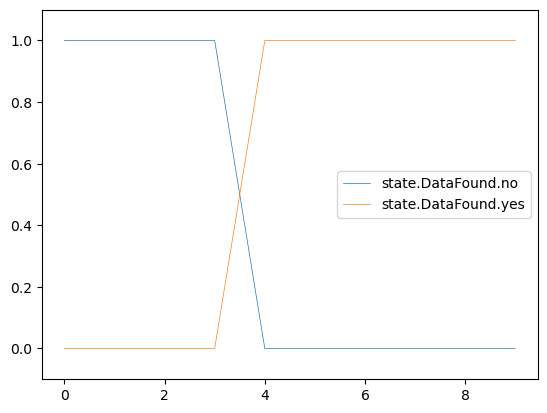

agent_i.DataFound.no  agent_i.DataFound.yes  agent_i.action agent_j.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.976974               0.023026    EnumAccounts   DecoyAccount   
2              0.976974               0.023026      PrivEscAcc            Nop   
3              0.976974               0.023026       FileRecon            Nop   
4              0.211902               0.788098  ManipulateData            Nop   
5              0.000269               0.999731            Exit            Nop   
6              0.000269               0.999731             Nop            Nop   
7              0.000269               0.999731             Nop            Nop   
8              0.000269               0.999731             Nop            Nop   
9              0.000269               0.999731             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                   user_files                           success  
3                         none                           success  
4                         none                           success  
5                   user_files                           failure  
6                   user_files                           failure  
7                   user_files                           failure  
8                         none                           failure  
9                         none                           failure

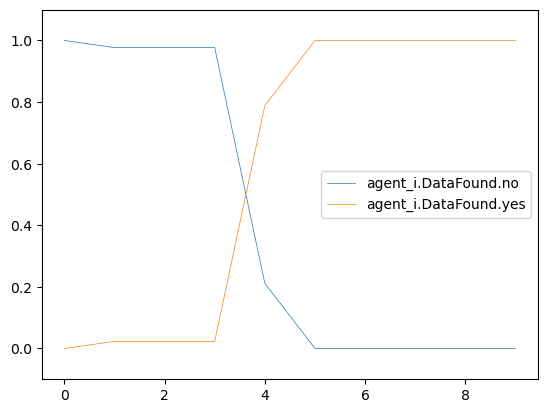

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action  agent_i.action  \
0              1.000000               0.000000            Nop       FileRecon   
1              1.000000               0.000000   DecoyAccount    EnumAccounts   
2              1.000000               0.000000            Nop      PrivEscAcc   
3              1.000000               0.000000            Nop       FileRecon   
4              0.339744               0.660256            Nop  ManipulateData   
5              0.075347               0.924654            Nop            Exit   
6              0.022530               0.977470            Nop             Nop   
7              0.021292               0.978708            Nop             Nop   
8              0.021275               0.978725            Nop             Nop   
9              0.021275               0.978725            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                   login_activity  
7                             none  
8                   login_activity  
9                             none

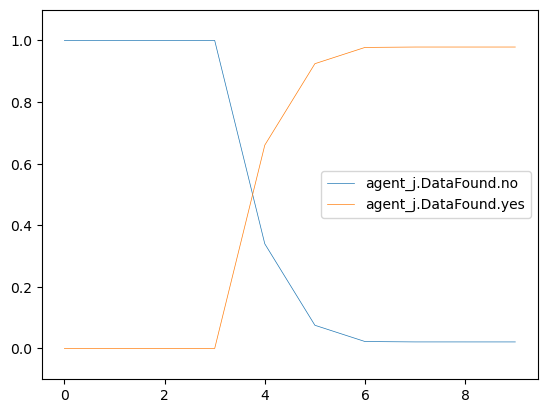

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes  agent_i.action agent_j.action
0                   1.0                    0.0       FileRecon            Nop
1                   1.0                    0.0    EnumAccounts   DecoyAccount
2                   0.0                    1.0      PrivEscAcc            Nop
3                   0.0                    1.0       FileRecon            Nop
4                   0.0                    1.0  ManipulateData            Nop
5                   0.0                    1.0            Exit            Nop
6                   0.0                    1.0             Nop            Nop
7                   0.0                    1.0             Nop            Nop
8                   0.0                    1.0             Nop            Nop
9                   0.0                    1.0             Nop            Nop

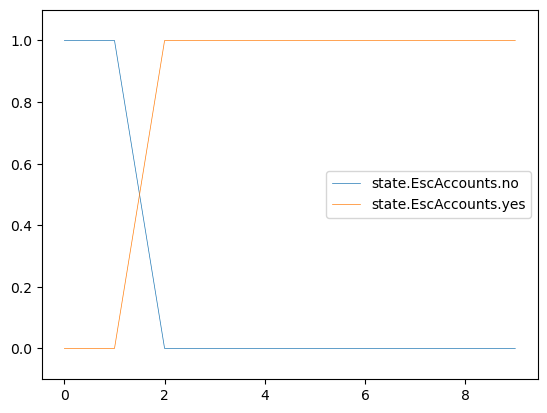

agent_i.EscAccounts.no  agent_i.EscAccounts.yes  agent_i.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.057958                 0.942042      PrivEscAcc   
3                0.000068                 0.999932       FileRecon   
4                0.000030                 0.999970  ManipulateData   
5                0.000017                 0.999983            Exit   
6                0.000017                 0.999983             Nop   
7                0.000017                 0.999983             Nop   
8                0.000017                 0.999983             Nop   
9                0.000017                 0.999983             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                         none   

  agent_i.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           failure  
7                           failure  
8                           failure  
9                           failure

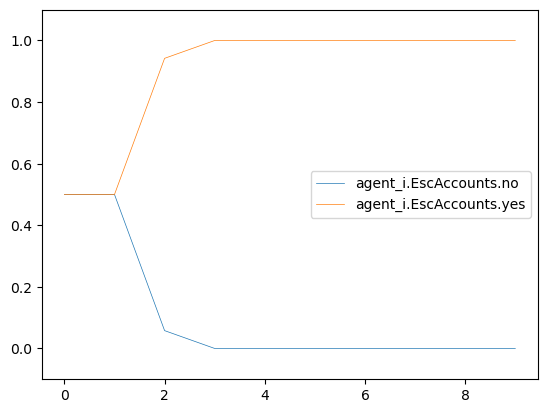

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                   login_activity  
7             Nop                             none  
8             Nop                   login_activity  
9             Nop                             none

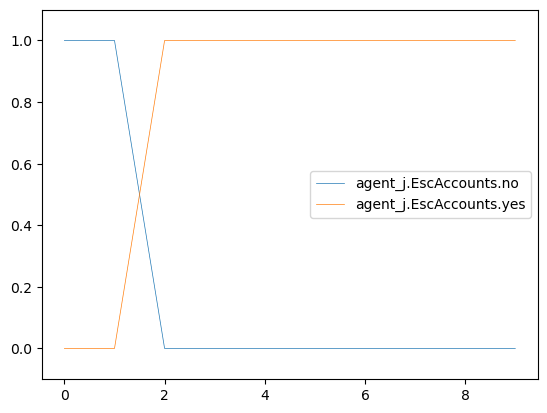

=============AccFound============


state.AccFound.no  state.AccFound.yes  agent_i.action agent_j.action
0                1.0                 0.0       FileRecon            Nop
1                1.0                 0.0    EnumAccounts   DecoyAccount
2                0.0                 1.0      PrivEscAcc            Nop
3                0.0                 1.0       FileRecon            Nop
4                0.0                 1.0  ManipulateData            Nop
5                0.0                 1.0            Exit            Nop
6                0.0                 1.0             Nop            Nop
7                0.0                 1.0             Nop            Nop
8                0.0                 1.0             Nop            Nop
9                0.0                 1.0             Nop            Nop

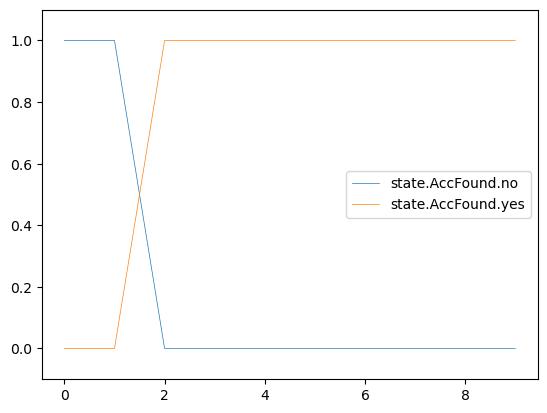

agent_i.AccFound.no  agent_i.AccFound.yes  agent_i.action agent_j.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000    EnumAccounts   DecoyAccount   
2             0.100779              0.899222      PrivEscAcc            Nop   
3             0.000119              0.999881       FileRecon            Nop   
4             0.000055              0.999945  ManipulateData            Nop   
5             0.000032              0.999968            Exit            Nop   
6             0.000032              0.999968             Nop            Nop   
7             0.000032              0.999968             Nop            Nop   
8             0.000032              0.999968             Nop            Nop   
9             0.000032              0.999968             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                   user_files                           success  
3                         none                           success  
4                         none                           success  
5                   user_files                           failure  
6                   user_files                           failure  
7                   user_files                           failure  
8                         none                           failure  
9                         none                           failure

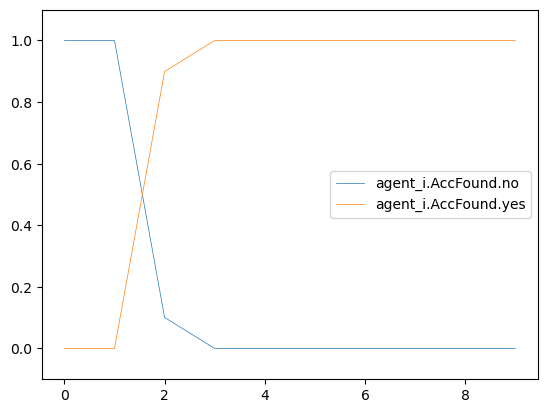

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action  agent_i.action  \
0             1.000000              0.000000            Nop       FileRecon   
1             1.000000              0.000000   DecoyAccount    EnumAccounts   
2             0.310937              0.689063            Nop      PrivEscAcc   
3             0.097425              0.902575            Nop       FileRecon   
4             0.054096              0.945904            Nop  ManipulateData   
5             0.017132              0.982868            Nop            Exit   
6             0.018896              0.981104            Nop             Nop   
7             0.018896              0.981105            Nop             Nop   
8             0.018921              0.981079            Nop             Nop   
9             0.018921              0.981079            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                   login_activity  
7                             none  
8                   login_activity  
9                             none

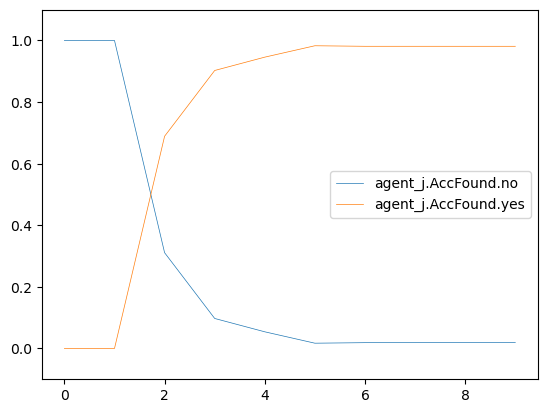

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes  agent_i.action agent_j.action
0                   0.0                    1.0       FileRecon            Nop
1                   0.0                    1.0    EnumAccounts   DecoyAccount
2                   0.0                    1.0      PrivEscAcc            Nop
3                   0.0                    1.0       FileRecon            Nop
4                   0.0                    1.0  ManipulateData            Nop
5                   0.0                    1.0            Exit            Nop
6                   0.0                    1.0             Nop            Nop
7                   0.0                    1.0             Nop            Nop
8                   0.0                    1.0             Nop            Nop
9                   0.0                    1.0             Nop            Nop

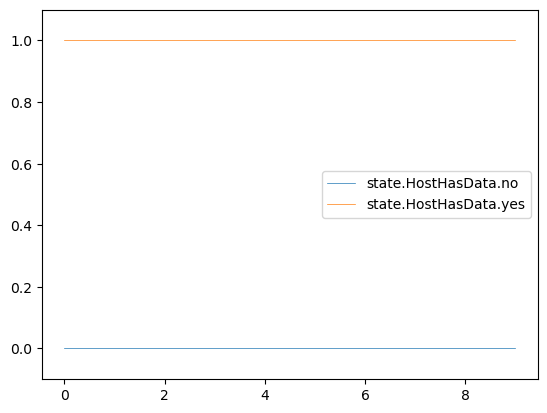

agent_i.HostHasData.no  agent_i.HostHasData.yes  agent_i.action  \
0                0.500000                 0.500000       FileRecon   
1                0.592105                 0.407895    EnumAccounts   
2                0.592105                 0.407895      PrivEscAcc   
3                0.592105                 0.407895       FileRecon   
4                0.177317                 0.822683  ManipulateData   
5                0.000225                 0.999775            Exit   
6                0.000225                 0.999775             Nop   
7                0.000225                 0.999775             Nop   
8                0.000225                 0.999775             Nop   
9                0.000225                 0.999775             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                         none   

  agent_i.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           failure  
7                           failure  
8                           failure  
9                           failure

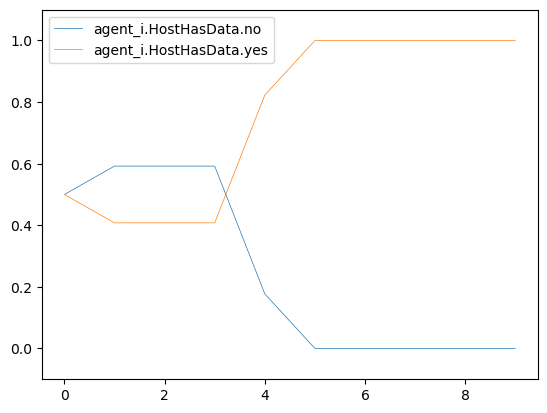

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                   login_activity  
7             Nop                             none  
8             Nop                   login_activity  
9             Nop                             none

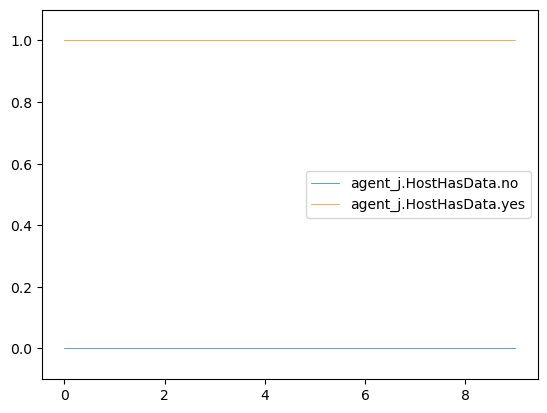

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes  agent_i.action  \
0                    1.0                     0.0       FileRecon   
1                    1.0                     0.0    EnumAccounts   
2                    1.0                     0.0      PrivEscAcc   
3                    1.0                     0.0       FileRecon   
4                    1.0                     0.0  ManipulateData   
5                    0.0                     1.0            Exit   
6                    0.0                     1.0             Nop   
7                    0.0                     1.0             Nop   
8                    0.0                     1.0             Nop   
9                    0.0                     1.0             Nop   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

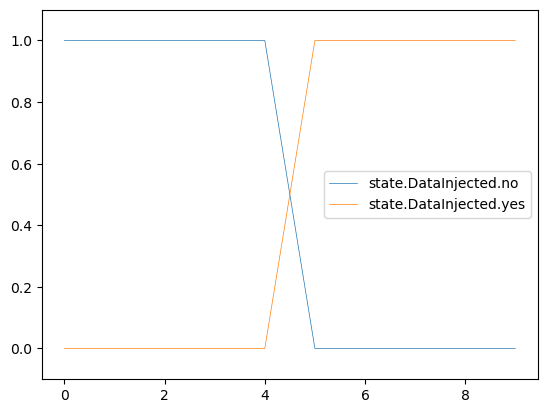

agent_i.DataInjected.no  agent_i.DataInjected.yes  agent_i.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.000269                  0.999731            Exit   
6                 0.000269                  0.999731             Nop   
7                 0.000269                  0.999731             Nop   
8                 0.000269                  0.999731             Nop   
9                 0.000269                  0.999731             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                         none   

  agent_i.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           failure  
7                           failure  
8                           failure  
9                           failure

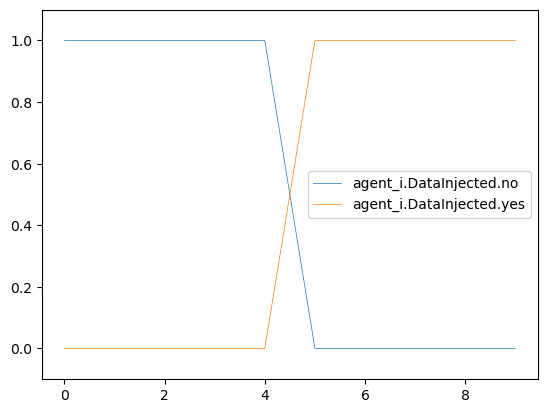

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000   DecoyAccount   
2                 1.000000                  0.000000            Nop   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 0.126646                  0.873354            Nop   
6                 0.029529                  0.970471            Nop   
7                 0.023243                  0.976757            Nop   
8                 0.021701                  0.978299            Nop   
9                 0.021701                  0.978299            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                   login_activity  
7             Nop                             none  
8             Nop                   login_activity  
9             Nop                             none

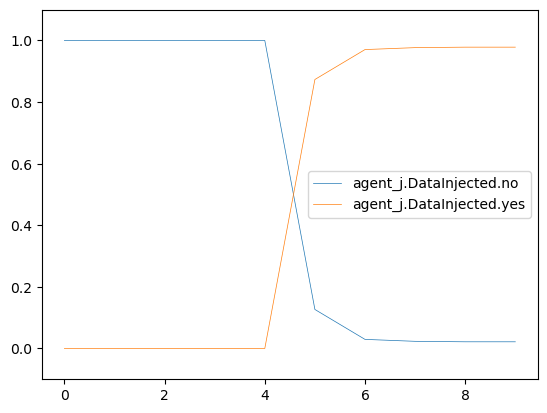

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user  agent_i.action  \
0                     0.0                     1.0       FileRecon   
1                     0.0                     1.0    EnumAccounts   
2                     0.0                     1.0      PrivEscAcc   
3                     1.0                     0.0       FileRecon   
4                     1.0                     0.0  ManipulateData   
5                     1.0                     0.0            Exit   
6                     1.0                     0.0             Nop   
7                     1.0                     0.0             Nop   
8                     1.0                     0.0             Nop   
9                     1.0                     0.0             Nop   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

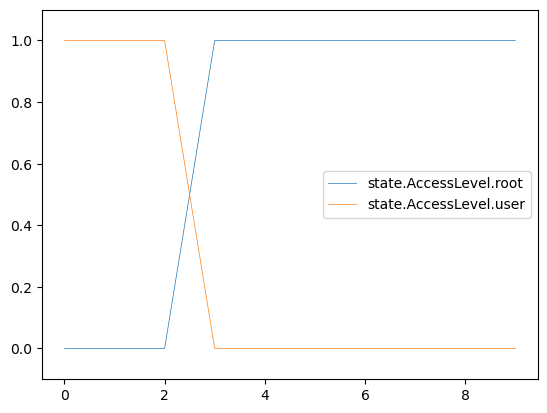

agent_i.AccessLevel.root  agent_i.AccessLevel.user  agent_i.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.999824                  0.000176       FileRecon   
4                  0.999932                  0.000068  ManipulateData   
5                  0.999961                  0.000039            Exit   
6                  0.999961                  0.000039             Nop   
7                  0.999961                  0.000039             Nop   
8                  0.999961                  0.000039             Nop   
9                  0.999961                  0.000039             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                         none   

  agent_i.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           failure  
7                           failure  
8                           failure  
9                           failure

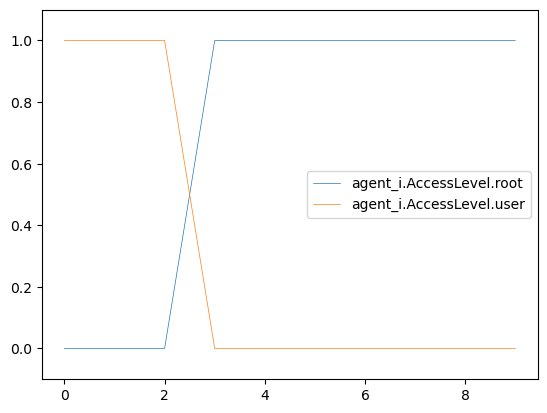

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000   DecoyAccount   
2                  0.000000                  1.000000            Nop   
3                  0.886277                  0.113723            Nop   
4                  0.943528                  0.056472            Nop   
5                  0.982340                  0.017660            Nop   
6                  0.980521                  0.019479            Nop   
7                  0.980521                  0.019479            Nop   
8                  0.980494                  0.019506            Nop   
9                  0.980494                  0.019506            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                   login_activity  
7             Nop                             none  
8             Nop                   login_activity  
9             Nop                             none

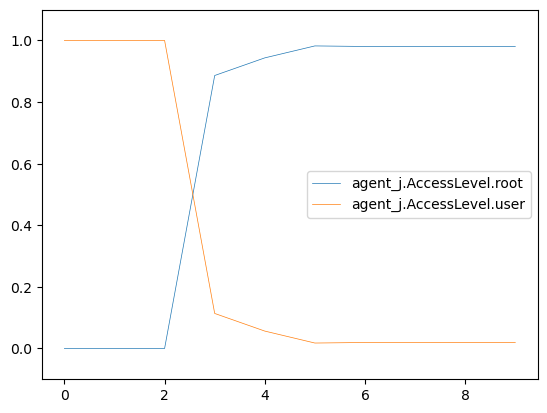

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot  agent_i.action agent_j.action  
0                      1.0       FileRecon            Nop  
1                      1.0    EnumAccounts   DecoyAccount  
2                      1.0      PrivEscAcc            Nop  
3                      1.0       FileRecon            Nop  
4                      1.0  ManipulateData            Nop  
5                      1.0            Exit            Nop  
6                      1.0             Nop            Nop  
7                      1.0             Nop            Nop  
8                      1.0             Nop            Nop  
9                      1.0             Nop            Nop

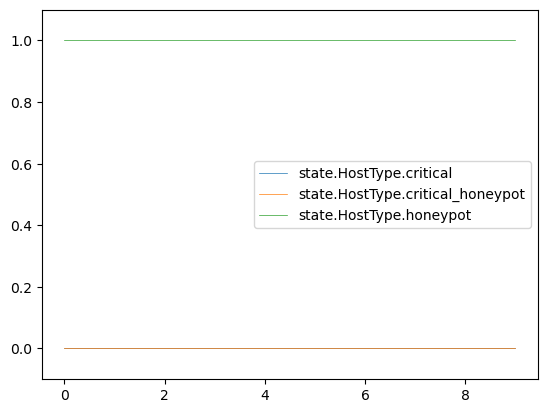

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.300000                                 0.0   
2                   0.118339                                 0.0   
3                   0.057764                                 0.0   
4                   0.025585                                 0.0   
5                   0.025578                                 0.0   
6                   0.025578                                 0.0   
7                   0.025578                                 0.0   
8                   0.025578                                 0.0   
9                   0.025578                                 0.0   

   agent_i.HostType.honeypot  agent_i.action agent_j.action  \
0                   0.500000       FileRecon            Nop   
1                   0.700000    EnumAccounts   DecoyAccount   
2                   0.881661      PrivEscAcc            Nop   
3                   0.942236       FileRecon            Nop   
4                   0.974415  ManipulateData            Nop   
5                   0.974422            Exit            Nop   
6                   0.974422             Nop            Nop   
7                   0.974422             Nop            Nop   
8                   0.974422             Nop            Nop   
9                   0.974422             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                   user_files                           success  
3                         none                           success  
4                         none                           success  
5                   user_files                           failure  
6                   user_files                           failure  
7                   user_files                           failure  
8                         none                           failure  
9                         none                           failure

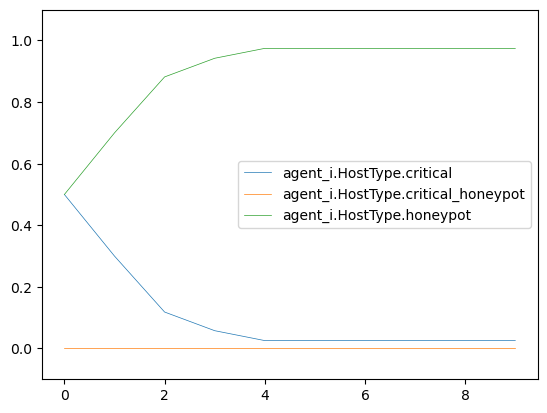

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot agent_j.action  agent_i.action  \
0                        1.0            Nop       FileRecon   
1                        1.0   DecoyAccount    EnumAccounts   
2                        1.0            Nop      PrivEscAcc   
3                        1.0            Nop       FileRecon   
4                        1.0            Nop  ManipulateData   
5                        1.0            Nop            Exit   
6                        1.0            Nop             Nop   
7                        1.0            Nop             Nop   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                   login_activity  
7                             none  
8                   login_activity  
9                             none

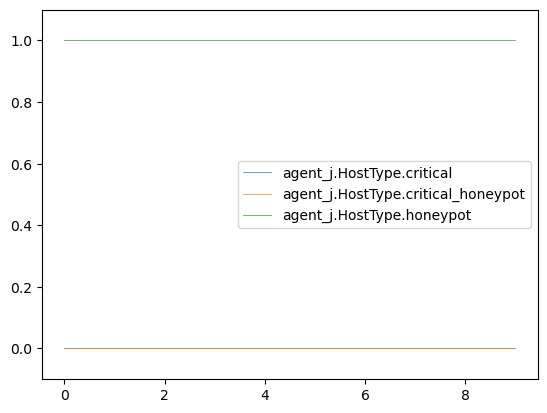

=============AttActive============


state.AttActive.no  state.AttActive.yes  agent_i.action agent_j.action
0                 0.0                  1.0       FileRecon            Nop
1                 0.0                  1.0    EnumAccounts   DecoyAccount
2                 0.0                  1.0      PrivEscAcc            Nop
3                 0.0                  1.0       FileRecon            Nop
4                 0.0                  1.0  ManipulateData            Nop
5                 0.0                  1.0            Exit            Nop
6                 1.0                  0.0             Nop            Nop
7                 1.0                  0.0             Nop            Nop
8                 1.0                  0.0             Nop            Nop
9                 1.0                  0.0             Nop            Nop

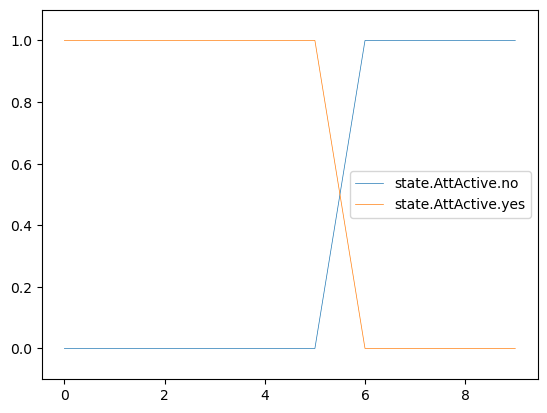

agent_i.AttActive.no  agent_i.AttActive.yes  agent_i.action agent_j.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0    EnumAccounts   DecoyAccount   
2                   0.0                    1.0      PrivEscAcc            Nop   
3                   0.0                    1.0       FileRecon            Nop   
4                   0.0                    1.0  ManipulateData            Nop   
5                   0.0                    1.0            Exit            Nop   
6                   1.0                    0.0             Nop            Nop   
7                   1.0                    0.0             Nop            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                   user_files                           success  
3                         none                           success  
4                         none                           success  
5                   user_files                           failure  
6                   user_files                           failure  
7                   user_files                           failure  
8                         none                           failure  
9                         none                           failure

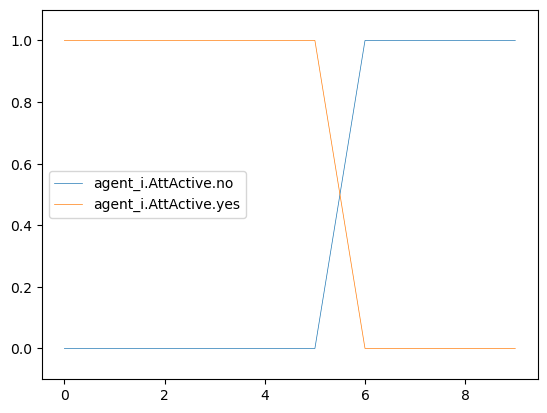

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action  agent_i.action  \
0              0.000000           1.000000e+00            Nop       FileRecon   
1              0.000000           1.000000e+00   DecoyAccount    EnumAccounts   
2              0.000000           1.000000e+00            Nop      PrivEscAcc   
3              0.000003           9.999968e-01            Nop       FileRecon   
4              0.009350           9.906499e-01            Nop  ManipulateData   
5              0.010945           9.890546e-01            Nop            Exit   
6              0.982698           1.730195e-02            Nop             Nop   
7              0.991085           8.915540e-03            Nop             Nop   
8              0.999772           2.277566e-04            Nop             Nop   
9              1.000000           1.052255e-08            Nop             Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                   login_activity  
7                             none  
8                   login_activity  
9                             none

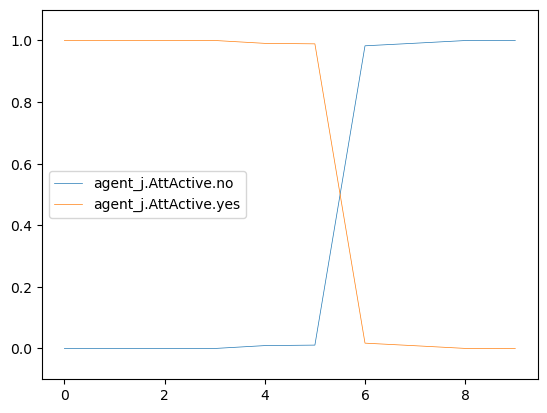

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user  agent_i.action agent_j.action
0                   1.0                   0.0       FileRecon            Nop
1                   1.0                   0.0    EnumAccounts   DecoyAccount
2                   1.0                   0.0      PrivEscAcc            Nop
3                   1.0                   0.0       FileRecon            Nop
4                   1.0                   0.0  ManipulateData            Nop
5                   1.0                   0.0            Exit            Nop
6                   1.0                   0.0             Nop            Nop
7                   1.0                   0.0             Nop            Nop
8                   1.0                   0.0             Nop            Nop
9                   1.0                   0.0             Nop            Nop

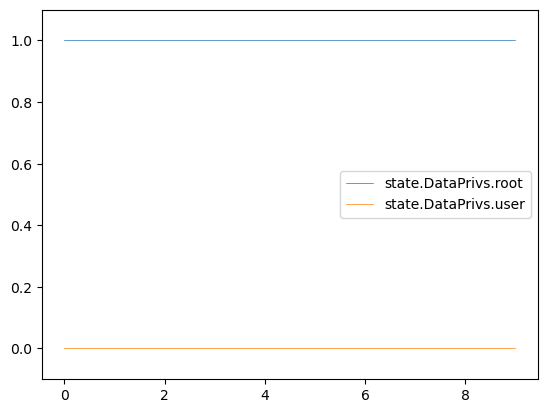

agent_i.DataPrivs.root  agent_i.DataPrivs.user  agent_i.action  \
0                0.500000                0.500000       FileRecon   
1                0.592105                0.407895    EnumAccounts   
2                0.592105                0.407895      PrivEscAcc   
3                0.592105                0.407895       FileRecon   
4                0.673737                0.326263  ManipulateData   
5                0.708589                0.291411            Exit   
6                0.708589                0.291411             Nop   
7                0.708589                0.291411             Nop   
8                0.708589                0.291411             Nop   
9                0.708589                0.291411             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                         none   

  agent_i.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           failure  
7                           failure  
8                           failure  
9                           failure

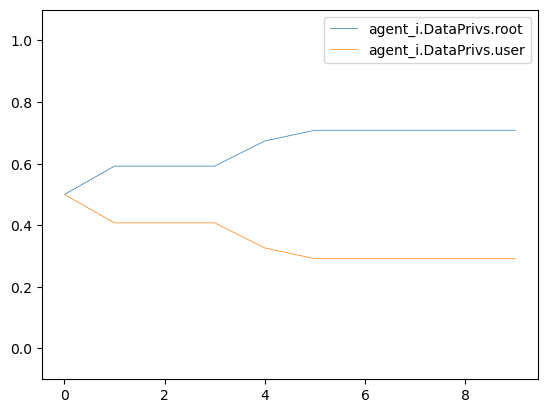

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                   login_activity  
7             Nop                             none  
8             Nop                   login_activity  
9             Nop                             none

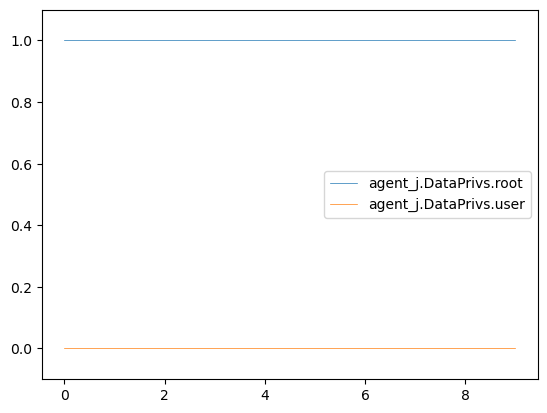

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.577778                        0.422222   
3                         0.758655                        0.241345   
4                         0.430978                        0.569022   
5                         0.389787                        0.610213   
6                         0.247117                        0.752883   
7                         0.247117                        0.752883   
8                         0.247117                        0.752883   
9                         0.247117                        0.752883   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           success  
2                   user_files                           failure  
3                   user_files                           failure  
4                         none                           failure  
5                         none                           failure  
6                         none                           success  
7                         none                           success  
8                         none                           failure  
9                   user_files                           failure

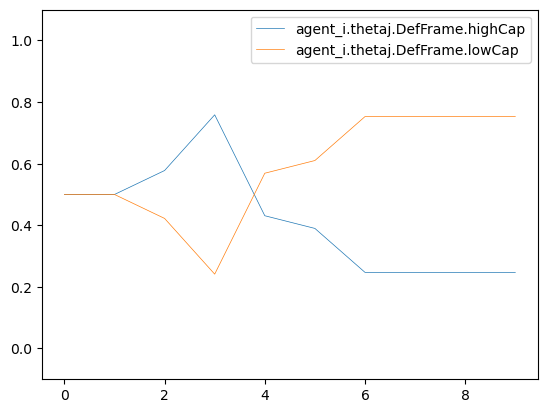

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                   login_activity
3                               1.0                   login_activity
4                               1.0                        file_enum
5                               1.0                        file_enum
6                               1.0                   login_activity
7                               1.0                       file_write
8                               1.0                             none
9                               1.0                             none

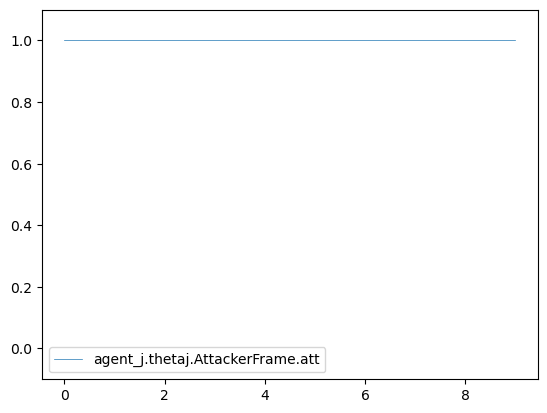

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0      FileRecon            Nop
1                 1.0                  0.0   EnumAccounts   DecoyAccount
2                 1.0                  0.0     PrivEscAcc            Nop
3                 1.0                  0.0     PrivEscAcc            Nop
4                 1.0                  0.0      FileRecon            Nop
5                 1.0                  0.0   EnumAccounts            Nop
6                 1.0                  0.0           Exit            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

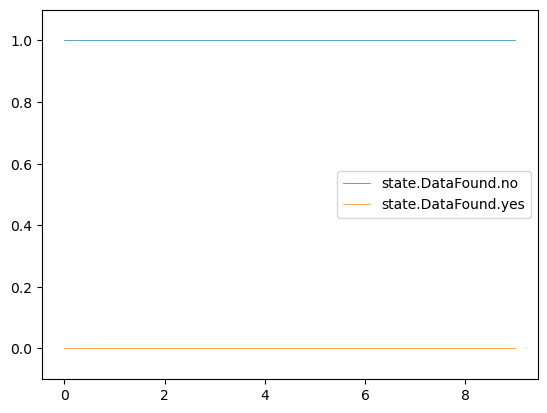

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0              1.000000               0.000000      FileRecon            Nop   
1              0.976974               0.023026   EnumAccounts   DecoyAccount   
2              0.976974               0.023026     PrivEscAcc            Nop   
3              0.976974               0.023026     PrivEscAcc            Nop   
4              0.976974               0.023026      FileRecon            Nop   
5              0.989734               0.010266   EnumAccounts            Nop   
6              0.989756               0.010244           Exit            Nop   
7              0.989756               0.010244            Nop            Nop   
8              0.989756               0.010244            Nop            Nop   
9              0.989756               0.010244            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           success  
2                   user_files                           failure  
3                   user_files                           failure  
4                         none                           failure  
5                         none                           failure  
6                         none                           success  
7                         none                           success  
8                         none                           failure  
9                   user_files                           failure

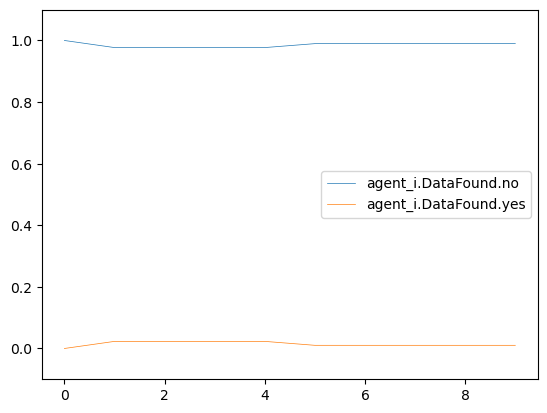

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0              1.000000               0.000000            Nop      FileRecon   
1              1.000000               0.000000   DecoyAccount   EnumAccounts   
2              1.000000               0.000000            Nop     PrivEscAcc   
3              1.000000               0.000000            Nop     PrivEscAcc   
4              0.387338               0.612662            Nop      FileRecon   
5              0.232130               0.767870            Nop   EnumAccounts   
6              0.177334               0.822666            Nop           Exit   
7              0.166929               0.833071            Nop            Nop   
8              0.156510               0.843490            Nop            Nop   
9              0.156520               0.843480            Nop            Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                   login_activity  
4                        file_enum  
5                        file_enum  
6                   login_activity  
7                       file_write  
8                             none  
9                             none

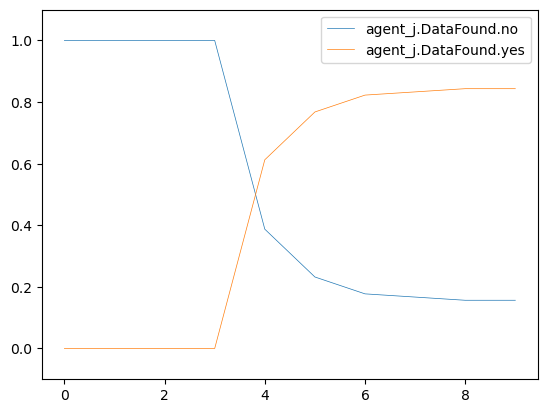

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0      FileRecon            Nop
1                   1.0                    0.0   EnumAccounts   DecoyAccount
2                   0.0                    1.0     PrivEscAcc            Nop
3                   0.0                    1.0     PrivEscAcc            Nop
4                   0.0                    1.0      FileRecon            Nop
5                   0.0                    1.0   EnumAccounts            Nop
6                   0.0                    1.0           Exit            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

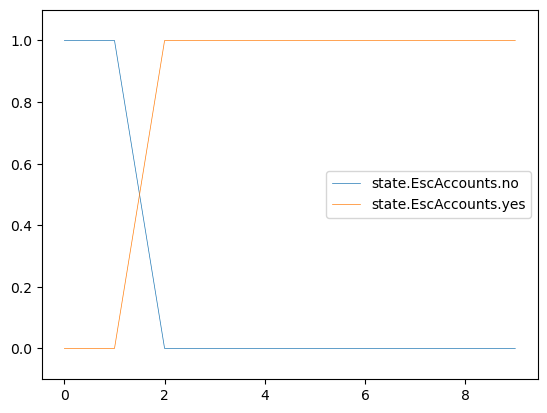

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                0.500000                 0.500000      FileRecon   
1                0.500000                 0.500000   EnumAccounts   
2                0.083333                 0.916667     PrivEscAcc   
3                0.277130                 0.722870     PrivEscAcc   
4                0.656560                 0.343440      FileRecon   
5                0.610211                 0.389789   EnumAccounts   
6                0.781176                 0.218824           Exit   
7                0.781176                 0.218824            Nop   
8                0.781176                 0.218824            Nop   
9                0.781176                 0.218824            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                   user_files   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult'  
0                           failure  
1                           success  
2                           failure  
3                           failure  
4                           failure  
5                           failure  
6                           success  
7                           success  
8                           failure  
9                           failure

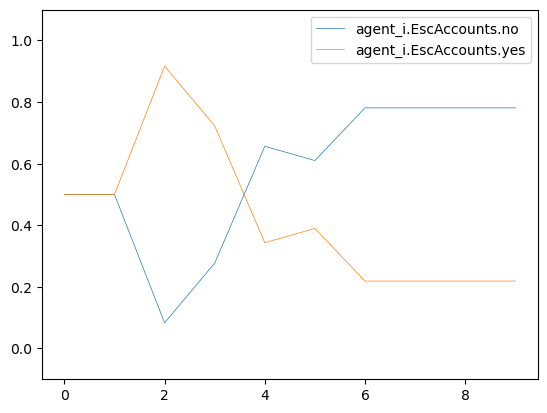

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                   login_activity  
3     PrivEscAcc                   login_activity  
4      FileRecon                        file_enum  
5   EnumAccounts                        file_enum  
6           Exit                   login_activity  
7            Nop                       file_write  
8            Nop                             none  
9            Nop                             none

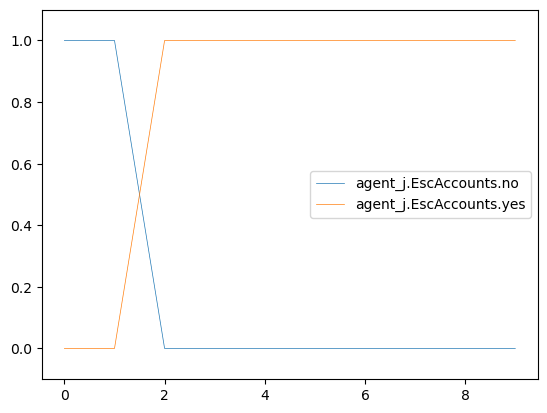

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0      FileRecon            Nop
1                1.0                 0.0   EnumAccounts   DecoyAccount
2                1.0                 0.0     PrivEscAcc            Nop
3                1.0                 0.0     PrivEscAcc            Nop
4                1.0                 0.0      FileRecon            Nop
5                1.0                 0.0   EnumAccounts            Nop
6                1.0                 0.0           Exit            Nop
7                1.0                 0.0            Nop            Nop
8                1.0                 0.0            Nop            Nop
9                1.0                 0.0            Nop            Nop

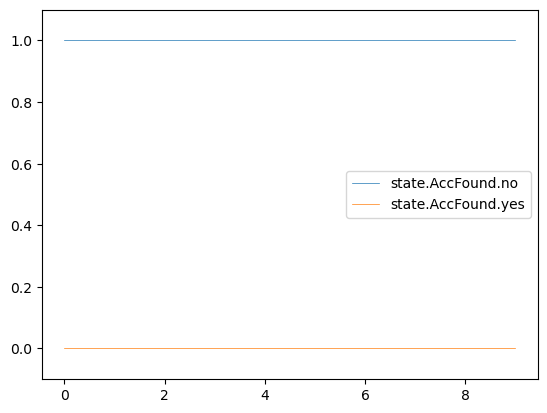

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0             1.000000              0.000000      FileRecon            Nop   
1             1.000000              0.000000   EnumAccounts   DecoyAccount   
2             0.125000              0.875000     PrivEscAcc            Nop   
3             0.415696              0.584304     PrivEscAcc            Nop   
4             0.984840              0.015160      FileRecon            Nop   
5             0.990419              0.009581   EnumAccounts            Nop   
6             0.954318              0.045682           Exit            Nop   
7             0.954318              0.045682            Nop            Nop   
8             0.954318              0.045682            Nop            Nop   
9             0.954318              0.045682            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           success  
2                   user_files                           failure  
3                   user_files                           failure  
4                         none                           failure  
5                         none                           failure  
6                         none                           success  
7                         none                           success  
8                         none                           failure  
9                   user_files                           failure

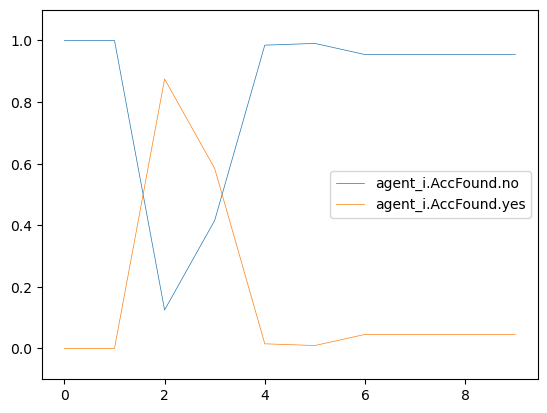

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0             1.000000              0.000000            Nop      FileRecon   
1             1.000000              0.000000   DecoyAccount   EnumAccounts   
2             0.310937              0.689063            Nop     PrivEscAcc   
3             0.097425              0.902575            Nop     PrivEscAcc   
4             0.096777              0.903223            Nop      FileRecon   
5             0.035166              0.964834            Nop   EnumAccounts   
6             0.014934              0.985066            Nop           Exit   
7             0.014934              0.985066            Nop            Nop   
8             0.013791              0.986209            Nop            Nop   
9             0.013792              0.986208            Nop            Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                   login_activity  
4                        file_enum  
5                        file_enum  
6                   login_activity  
7                       file_write  
8                             none  
9                             none

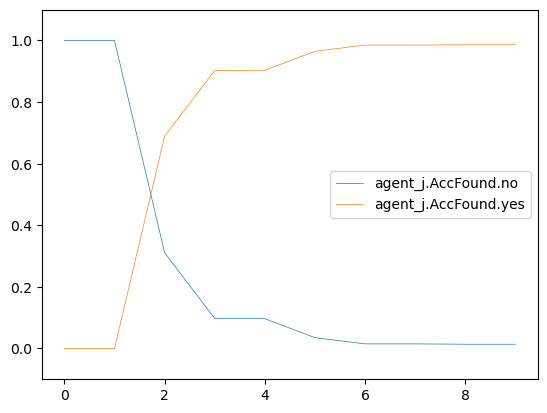

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   0.0                    1.0      FileRecon            Nop
1                   0.0                    1.0   EnumAccounts   DecoyAccount
2                   0.0                    1.0     PrivEscAcc            Nop
3                   0.0                    1.0     PrivEscAcc            Nop
4                   0.0                    1.0      FileRecon            Nop
5                   0.0                    1.0   EnumAccounts            Nop
6                   0.0                    1.0           Exit            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

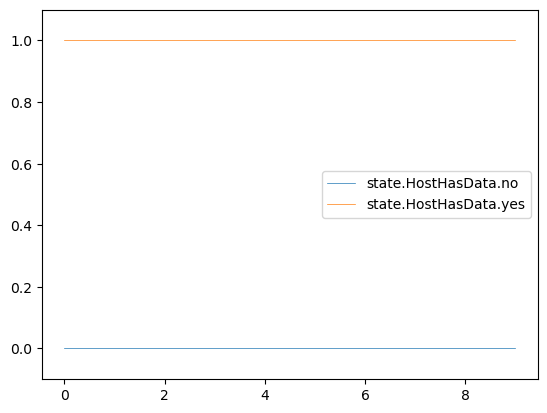

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                0.500000                 0.500000      FileRecon   
1                0.592105                 0.407895   EnumAccounts   
2                0.592105                 0.407895     PrivEscAcc   
3                0.592105                 0.407895     PrivEscAcc   
4                0.592105                 0.407895      FileRecon   
5                0.640733                 0.359267   EnumAccounts   
6                0.640629                 0.359370           Exit   
7                0.640630                 0.359371            Nop   
8                0.640629                 0.359370            Nop   
9                0.640630                 0.359371            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                   user_files   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult'  
0                           failure  
1                           success  
2                           failure  
3                           failure  
4                           failure  
5                           failure  
6                           success  
7                           success  
8                           failure  
9                           failure

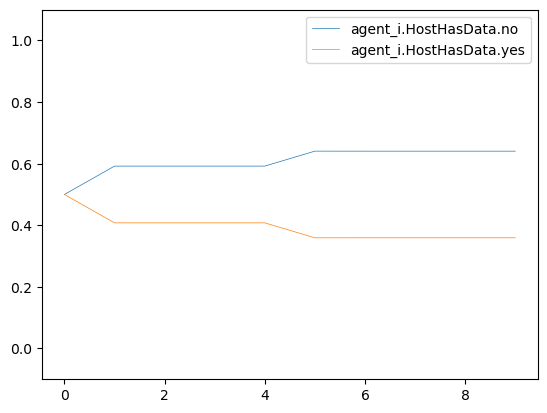

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                   login_activity  
3     PrivEscAcc                   login_activity  
4      FileRecon                        file_enum  
5   EnumAccounts                        file_enum  
6           Exit                   login_activity  
7            Nop                       file_write  
8            Nop                             none  
9            Nop                             none

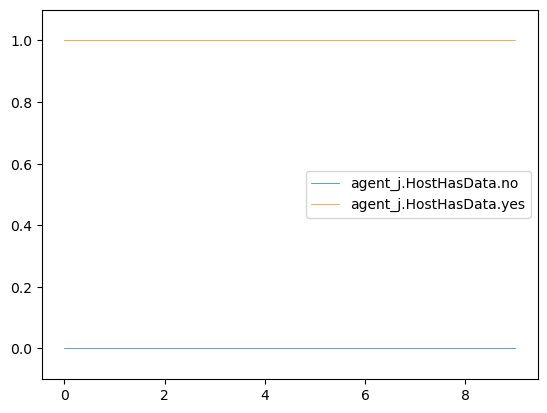

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0      FileRecon            Nop
1                    1.0                     0.0   EnumAccounts   DecoyAccount
2                    1.0                     0.0     PrivEscAcc            Nop
3                    1.0                     0.0     PrivEscAcc            Nop
4                    1.0                     0.0      FileRecon            Nop
5                    1.0                     0.0   EnumAccounts            Nop
6                    1.0                     0.0           Exit            Nop
7                    1.0                     0.0            Nop            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

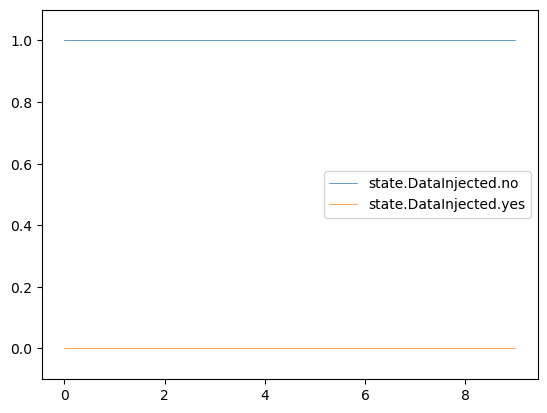

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0   EnumAccounts   
2                      1.0                       0.0     PrivEscAcc   
3                      1.0                       0.0     PrivEscAcc   
4                      1.0                       0.0      FileRecon   
5                      1.0                       0.0   EnumAccounts   
6                      1.0                       0.0           Exit   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                   user_files   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult'  
0                           failure  
1                           success  
2                           failure  
3                           failure  
4                           failure  
5                           failure  
6                           success  
7                           success  
8                           failure  
9                           failure

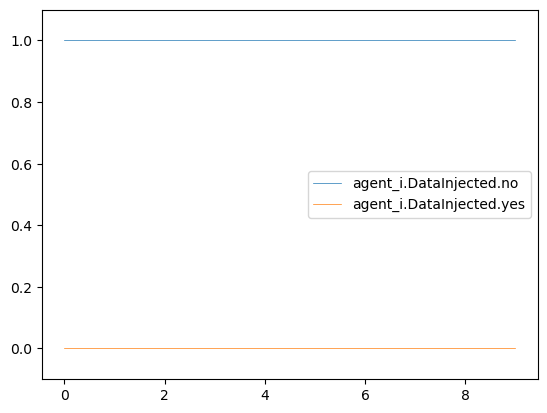

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000   DecoyAccount   
2                 1.000000                  0.000000            Nop   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 0.807953                  0.192047            Nop   
6                 0.702218                  0.297782            Nop   
7                 0.229831                  0.770169            Nop   
8                 0.202324                  0.797676            Nop   
9                 0.202247                  0.797753            Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                   login_activity  
3     PrivEscAcc                   login_activity  
4      FileRecon                        file_enum  
5   EnumAccounts                        file_enum  
6           Exit                   login_activity  
7            Nop                       file_write  
8            Nop                             none  
9            Nop                             none

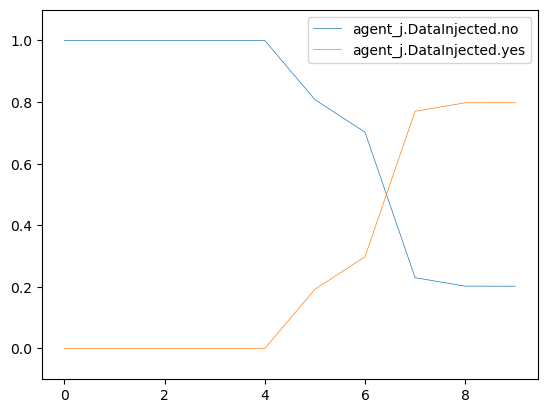

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0      FileRecon   
1                     0.0                     1.0   EnumAccounts   
2                     0.0                     1.0     PrivEscAcc   
3                     0.0                     1.0     PrivEscAcc   
4                     0.0                     1.0      FileRecon   
5                     0.0                     1.0   EnumAccounts   
6                     0.0                     1.0           Exit   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

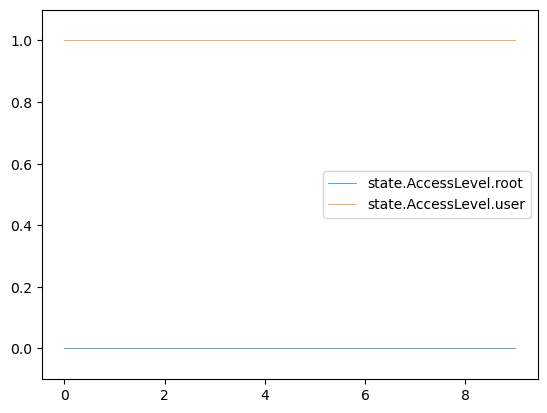

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                  0.000000                  1.000000      FileRecon   
1                  0.000000                  1.000000   EnumAccounts   
2                  0.000000                  1.000000     PrivEscAcc   
3                  0.002330                  0.997670     PrivEscAcc   
4                  0.001372                  0.998628      FileRecon   
5                  0.000710                  0.999290   EnumAccounts   
6                  0.000059                  0.999941           Exit   
7                  0.000059                  0.999941            Nop   
8                  0.000059                  0.999941            Nop   
9                  0.000059                  0.999941            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                   user_files   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult'  
0                           failure  
1                           success  
2                           failure  
3                           failure  
4                           failure  
5                           failure  
6                           success  
7                           success  
8                           failure  
9                           failure

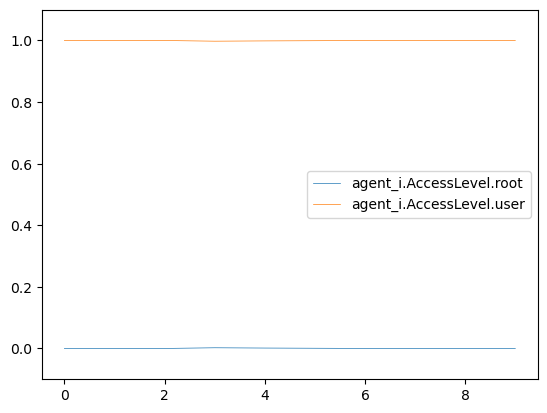

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000   DecoyAccount   
2                  0.000000                  1.000000            Nop   
3                  0.886277                  0.113723            Nop   
4                  0.889110                  0.110890            Nop   
5                  0.959918                  0.040082            Nop   
6                  0.983009                  0.016991            Nop   
7                  0.983009                  0.016991            Nop   
8                  0.984309                  0.015691            Nop   
9                  0.984308                  0.015692            Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                   login_activity  
3     PrivEscAcc                   login_activity  
4      FileRecon                        file_enum  
5   EnumAccounts                        file_enum  
6           Exit                   login_activity  
7            Nop                       file_write  
8            Nop                             none  
9            Nop                             none

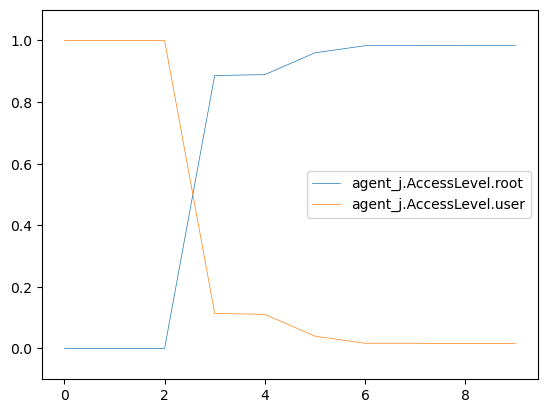

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0      FileRecon            Nop  
1                      1.0   EnumAccounts   DecoyAccount  
2                      1.0     PrivEscAcc            Nop  
3                      1.0     PrivEscAcc            Nop  
4                      1.0      FileRecon            Nop  
5                      1.0   EnumAccounts            Nop  
6                      1.0           Exit            Nop  
7                      1.0            Nop            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

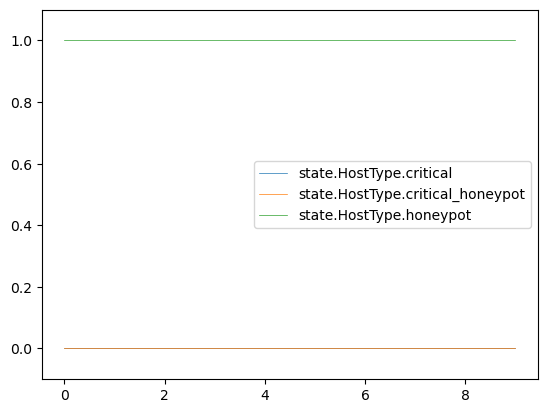

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.300000                                 0.0   
2                   0.422222                                 0.0   
3                   0.822736                                 0.0   
4                   0.584174                                 0.0   
5                   0.375703                                 0.0   
6                   0.234446                                 0.0   
7                   0.234446                                 0.0   
8                   0.234446                                 0.0   
9                   0.234446                                 0.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                   0.500000      FileRecon            Nop   
1                   0.700000   EnumAccounts   DecoyAccount   
2                   0.577778     PrivEscAcc            Nop   
3                   0.177264     PrivEscAcc            Nop   
4                   0.415826      FileRecon            Nop   
5                   0.624297   EnumAccounts            Nop   
6                   0.765554           Exit            Nop   
7                   0.765554            Nop            Nop   
8                   0.765554            Nop            Nop   
9                   0.765554            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           success  
2                   user_files                           failure  
3                   user_files                           failure  
4                         none                           failure  
5                         none                           failure  
6                         none                           success  
7                         none                           success  
8                         none                           failure  
9                   user_files                           failure

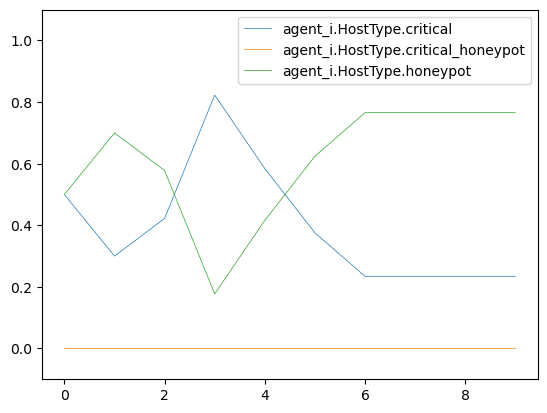

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                        1.0            Nop      FileRecon   
1                        1.0   DecoyAccount   EnumAccounts   
2                        1.0            Nop     PrivEscAcc   
3                        1.0            Nop     PrivEscAcc   
4                        1.0            Nop      FileRecon   
5                        1.0            Nop   EnumAccounts   
6                        1.0            Nop           Exit   
7                        1.0            Nop            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                   login_activity  
4                        file_enum  
5                        file_enum  
6                   login_activity  
7                       file_write  
8                             none  
9                             none

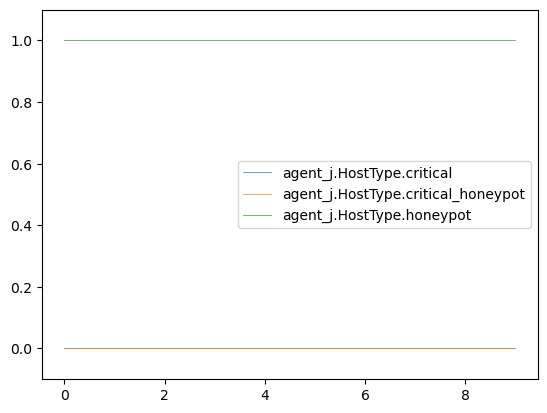

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0      FileRecon            Nop
1                 0.0                  1.0   EnumAccounts   DecoyAccount
2                 0.0                  1.0     PrivEscAcc            Nop
3                 0.0                  1.0     PrivEscAcc            Nop
4                 0.0                  1.0      FileRecon            Nop
5                 0.0                  1.0   EnumAccounts            Nop
6                 0.0                  1.0           Exit            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

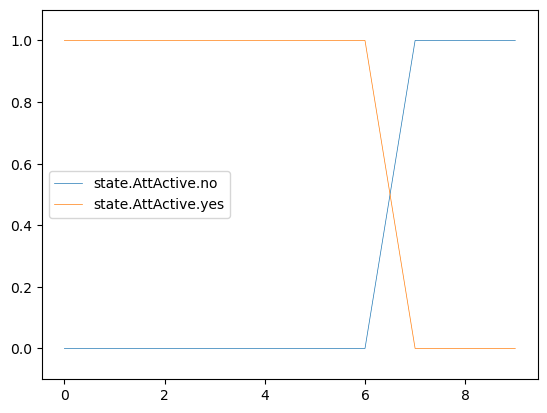

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0                   0.0                    1.0      FileRecon            Nop   
1                   0.0                    1.0   EnumAccounts   DecoyAccount   
2                   0.0                    1.0     PrivEscAcc            Nop   
3                   0.0                    1.0     PrivEscAcc            Nop   
4                   0.0                    1.0      FileRecon            Nop   
5                   0.0                    1.0   EnumAccounts            Nop   
6                   0.0                    1.0           Exit            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           success  
2                   user_files                           failure  
3                   user_files                           failure  
4                         none                           failure  
5                         none                           failure  
6                         none                           success  
7                         none                           success  
8                         none                           failure  
9                   user_files                           failure

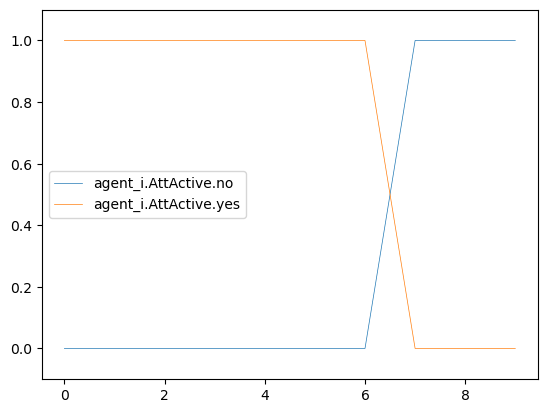

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0              0.000000               1.000000            Nop      FileRecon   
1              0.000000               1.000000   DecoyAccount   EnumAccounts   
2              0.000000               1.000000            Nop     PrivEscAcc   
3              0.000003               0.999997            Nop     PrivEscAcc   
4              0.060734               0.939267            Nop      FileRecon   
5              0.036994               0.963006            Nop   EnumAccounts   
6              0.097032               0.902968            Nop           Exit   
7              0.492443               0.507557            Nop            Nop   
8              0.910274               0.089726            Nop            Nop   
9              0.999986               0.000014            Nop            Nop   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                   login_activity  
4                        file_enum  
5                        file_enum  
6                   login_activity  
7                       file_write  
8                             none  
9                             none

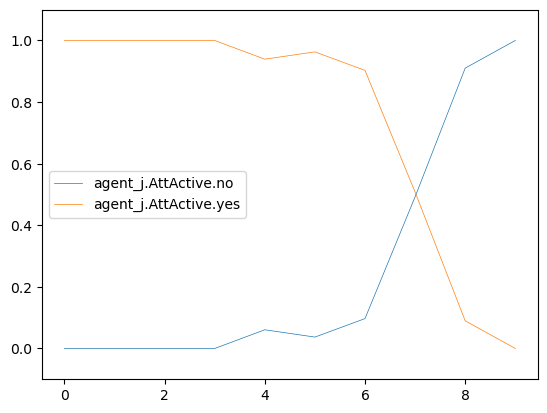

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   1.0                   0.0      FileRecon            Nop
1                   1.0                   0.0   EnumAccounts   DecoyAccount
2                   1.0                   0.0     PrivEscAcc            Nop
3                   1.0                   0.0     PrivEscAcc            Nop
4                   1.0                   0.0      FileRecon            Nop
5                   1.0                   0.0   EnumAccounts            Nop
6                   1.0                   0.0           Exit            Nop
7                   1.0                   0.0            Nop            Nop
8                   1.0                   0.0            Nop            Nop
9                   1.0                   0.0            Nop            Nop

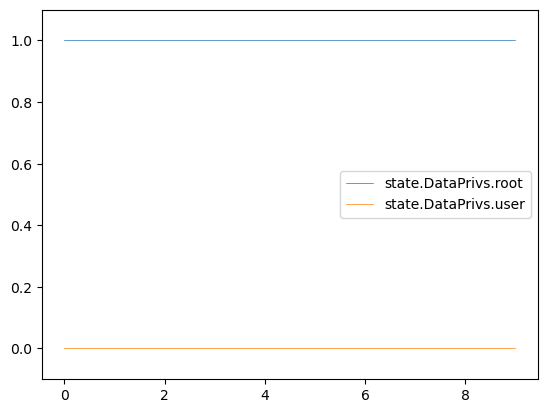

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                0.500000                0.500000      FileRecon   
1                0.592105                0.407895   EnumAccounts   
2                0.592105                0.407895     PrivEscAcc   
3                0.592105                0.407895     PrivEscAcc   
4                0.592105                0.407895      FileRecon   
5                0.640557                0.359443   EnumAccounts   
6                0.640615                0.359385           Exit   
7                0.640615                0.359385            Nop   
8                0.640615                0.359385            Nop   
9                0.640615                0.359385            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                   user_files   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult'  
0                           failure  
1                           success  
2                           failure  
3                           failure  
4                           failure  
5                           failure  
6                           success  
7                           success  
8                           failure  
9                           failure

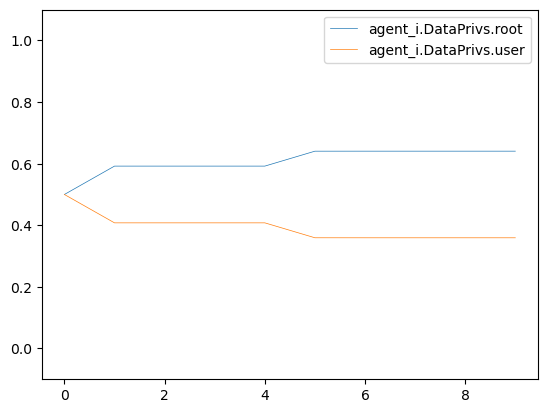

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                   login_activity  
3     PrivEscAcc                   login_activity  
4      FileRecon                        file_enum  
5   EnumAccounts                        file_enum  
6           Exit                   login_activity  
7            Nop                       file_write  
8            Nop                             none  
9            Nop                             none

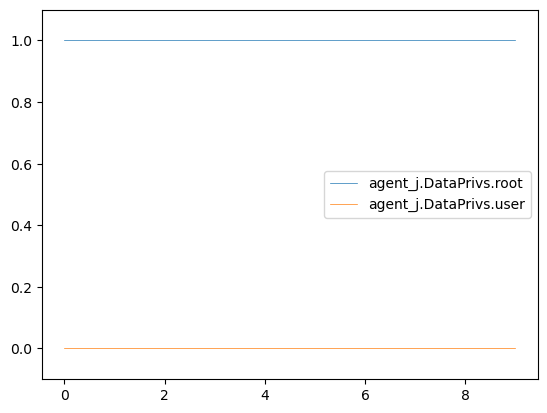

+++++++++++++++++++ End Interaction +++++++++++++++++++


In [7]:
# Get belief over opponent frames
def get_opponent_frame(dataframe):
    
    thetaj_columns = list(filter(lambda x: "thetaj" in x.split("."), dataframe))
    
    if len(thetaj_columns) > 0:
        return dataframe[thetaj_columns]
    
    else:
        return None

# Print and plot P(Theta_j)
def print_thetaj_belief(belief_thetaj_df, obs):
    df = pandas.concat([belief_thetaj_df, obs], axis=1)
    display(df)
    df.plot(linewidth=0.5)
    plotter.ylim(-0.1, 1.1)
    plotter.show()

# Summarize beliefs
def summarize_beliefs(state_vars, dataframe):
    print(f"+++++++++++++++++++ Begin Interaction +++++++++++++++++++")
    agent_i_data = filter_columns_by_agent(dataframe, "agent_i")
    agent_j_data = filter_columns_by_agent(dataframe, "agent_j")
    states = filter_columns_by_agent(dataframe, "state")
    
    actions_i = filter_columns_by_state(agent_i_data, "action")
    actions_j = filter_columns_by_state(agent_j_data, "action")
    
    obs_i = filter_columns_by_state(agent_i_data, "observation")
    obs_j = filter_columns_by_state(agent_j_data, "observation")
    
    i_belief_thetaj = get_opponent_frame(agent_i_data)
    if i_belief_thetaj is not None:
        print_thetaj_belief(i_belief_thetaj, obs_i)
    
    j_belief_thetaj = get_opponent_frame(agent_j_data)
    if j_belief_thetaj is not None:
        print_thetaj_belief(j_belief_thetaj, obs_j)
    
    for var in state_vars:
        print(f"============={var}============")
        # show state
        state_values = filter_columns_by_state(states, var)
        state_values = pandas.concat([state_values, actions_i, actions_j], axis = 1)
        display(state_values)
        state_values.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent i
        agent_i_beliefs = filter_columns_by_state(agent_i_data, var)
        agent_i_beliefs = pandas.concat([agent_i_beliefs, actions_i, actions_j, obs_i], axis = 1)
        display(agent_i_beliefs)
        agent_i_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent j
        agent_j_beliefs = filter_columns_by_state(agent_j_data, var)
        agent_j_beliefs = pandas.concat([agent_j_beliefs, actions_j, actions_i, obs_j], axis = 1)
        display(agent_j_beliefs)
        agent_j_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        print("==============================")
    
    print(f"+++++++++++++++++++ End Interaction +++++++++++++++++++")

# Use state data to figure out the state variables
def get_state_vars(columns):
    
    states = filter(lambda x: "state" in x.split(".") and len(x.split(".")) >= 2, columns)
    state_vars = map(lambda x: x.split(".")[1], states)
    
    return list(set(state_vars))

# Fetch dataframe with columns belonging to a particular agent
def filter_columns_by_agent(dataframe, name):
    columns = dataframe.columns
    filtered_columns = list(filter(lambda x: name in x.split("."), columns))
    
    df = dataframe[filtered_columns]
    return df

# Get columns containing the state name in the header
def filter_columns_by_state(dataframe, state):
    filtered_columns = list(filter(lambda x: state in x.split("."), dataframe.columns))
    return dataframe[filtered_columns]

# Main loop to summarize all traces
for trace in TRACE_FILES:
    data = load_json(trace)
    
    dataframe = pandas.json_normalize(data)    
    state_vars = get_state_vars(dataframe.columns)
    
    summarize_beliefs(state_vars, dataframe)

    